Classwork 12: Working with the Monterrey Pollution Data
==

Team 6 Members
--
* Alejandro Bañuelos A01244596
* Aline Martínez Briones A00826215
* Marco Ortiz A00823250
* Maximiliano Contreras Serrano A00825377

Determine if vehicle traffic, as represented by time (month, day of month, week day and hour of day) is correlated with pollutants that significantly affect citizen’s health. Determine if vehicle verification and/or traffic restriction by zone or plate number are solutions to MMA’s pollution.
Determine if pollution is related to weather using principal component analysis
Create regression models that can predict pollution levels
And create machine learning models that can predict pollution emergencies (pollution above 100 IMECAs, that is create a new class where 1 means PM2.5>40.4, and 0 otherwise. Or use the variable CONT which means the same )


Section 1: Ingestion and Exploratory Analysis
--

1. Download the data file Monterrey Pollution Data 2.csv
2. Ingest the data into a Python notebook or R script
3. Plot several weather and time variables against pollutants
4. Create a correlation table. What causes pollution?

Section 2: Principal Component Analysis and Regression
--

1. Carry out principal component analysis
2. Obtain squared cosines and correlation plot
3. Try to obtain conclusions
4. Create regression models to predict levels of pollution of PM_2.5 and PM2.5 using weather variables and time (as representative for traffic) as predictors (features)

Section 3: Machine Learning
--

1. Follow your teacher as he shows you techniques to improve your predictions
2. Download the data file Monterrey Pollution Data 3.csv
3. Build classification models that will allow to predict if pollution levels will exceed legal norms using weather variables as predictors
4. Follow your teacher as he shows you how to transform data to improve predictions
5. Create new classification models to predict if PM2.5 pollution will exceed legal norms. 

You will need:
Monterrey Pollution Data w Days.csv
Max-Min-Avg-Monterrey-Pollution.ipynb

In [806]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import tensorflow as tf
import numpy as np

In [807]:
df = pd.read_csv("Monterrey Pollution Data 2.csv")
df.head()

df = df.drop(["PM2.5Diff"],axis=1)

In [808]:
df.describe()

O3         PM10        PM2.5      DayWeek         Hour  \
count  3859.000000  3859.000000  3859.000000  3859.000000  3859.000000   
mean     22.658720    86.049495    27.675823     4.075926    12.037834   
std      16.510561    49.008874    16.849434     1.973040     6.869488   
min       2.000000     8.000000     5.000000     1.000000     0.000000   
25%      10.000000    55.000000    15.000000     2.000000     6.000000   
50%      18.000000    76.000000    25.000000     4.000000    13.000000   
75%      32.000000   104.000000    36.000000     6.000000    18.000000   
max      92.000000   494.000000   123.000000     7.000000    23.000000   

               PRS        RAINF           RH           SR         TOUT  \
count  3859.000000  3859.000000  3859.000000  3859.000000  3859.000000   
mean    719.629956     0.002651    71.048458     0.182582    22.018969   
std       3.695949     0.042447    18.334615     0.261602     7.545535   
min     708.400000     0.000000    12.000000     0.000000     3.030000   
25%     717.200000     0.000000    58.000000     0.000000    17.370000   
50%     719.000000     0.000000    74.000000     0.025000    23.080000   
75%     721.200000     0.000000    87.000000     0.307000    27.280000   
max     734.300000     2.400000    96.000000     0.934000    38.520000   

               WSR          WDV         CONT  
count  3859.000000  3859.000000  3859.000000  
mean      7.331459   127.522156     0.182172  
std       3.828216    96.515310     0.386036  
min       0.900000     0.000000     0.000000  
25%       4.200000    74.000000     0.000000  
50%       6.700000   103.000000     0.000000  
75%      10.200000   121.500000     0.000000  
max      21.200000   360.000000     1.000000

In [809]:

O3 = df ["O3"]
PM_25 = df["PM2.5"]
PM_10 = df["PM10"]

column_names = df.columns
column_names = column_names.drop(["O3","PM2.5","PM10"])

x  = df[column_names]
x.head()

DayWeek  Hour    PRS  RAINF  RH     SR  TOUT  WSR  WDV  CONT
0        5     1  725.4   0.01  96  0.000  3.91  7.2  344     1
1        5     2  725.0   0.02  96  0.000  3.81  6.3  341     0
2        5     3  724.4   0.00  96  0.000  3.85  5.2  346     0
3        5     5  724.0   0.01  96  0.000  3.79  5.6  336     0
4        5     8  724.3   0.00  96  0.023  3.93  4.8  354     0

To create a better formating for the following graphs in the document we developed this code

In [810]:
fontT = {'family' : 'Arial',
        'weight' : 'bold',
        'size'   : 20}

fontL = {'family' : 'Arial',
        'weight' : 'bold',
        'size'   : 18}

fontAx = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 10}

fontTix = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 6}

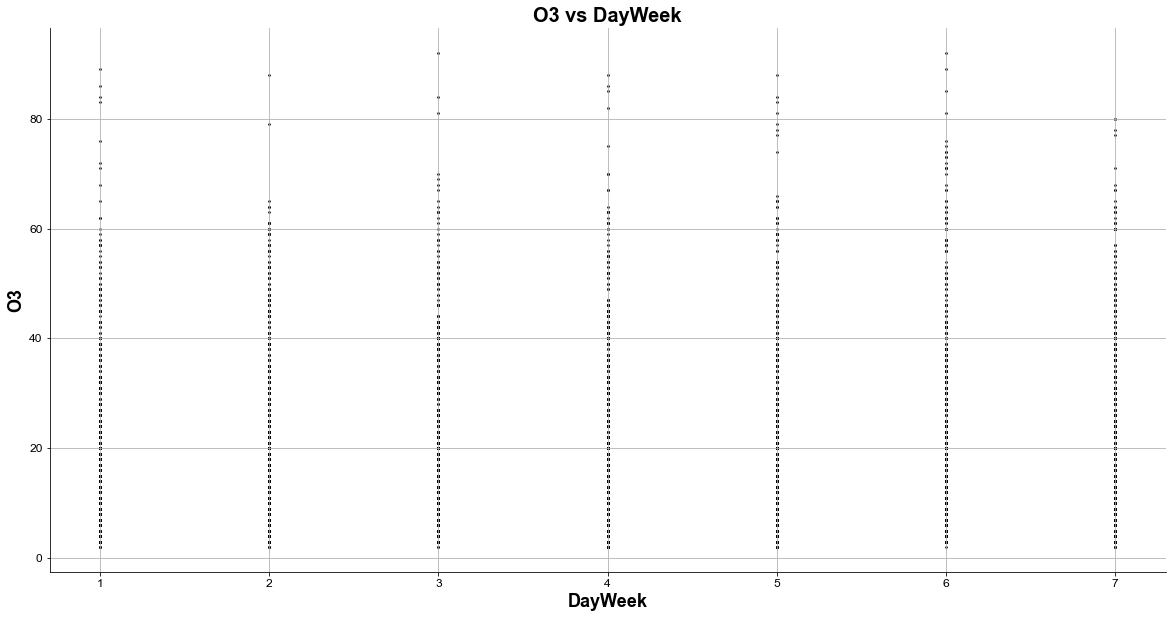

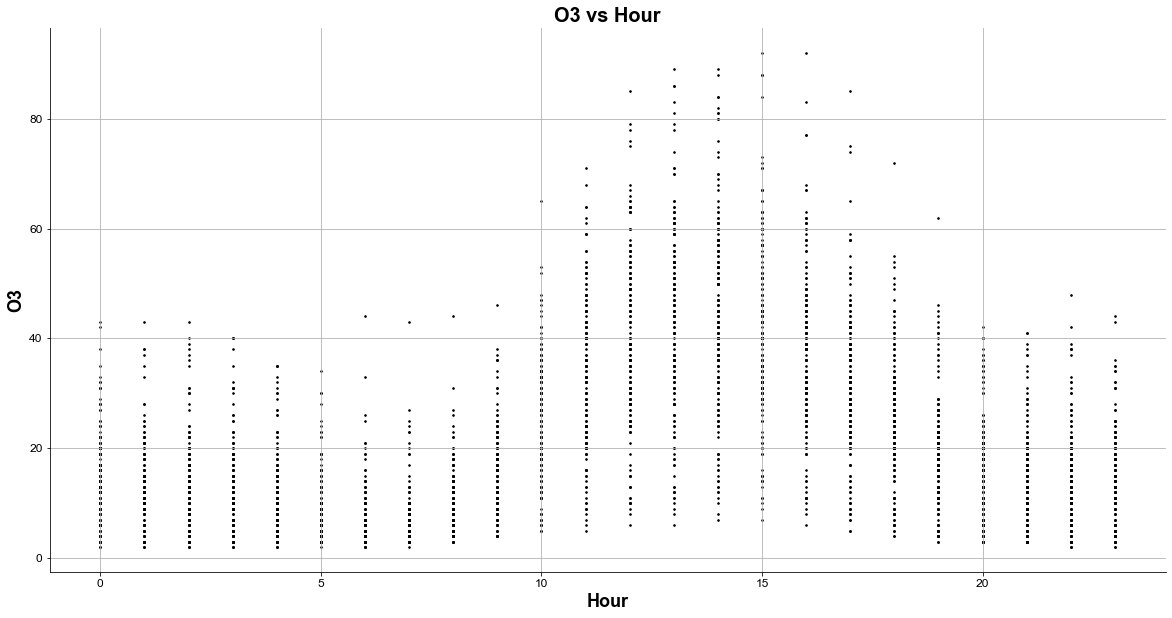

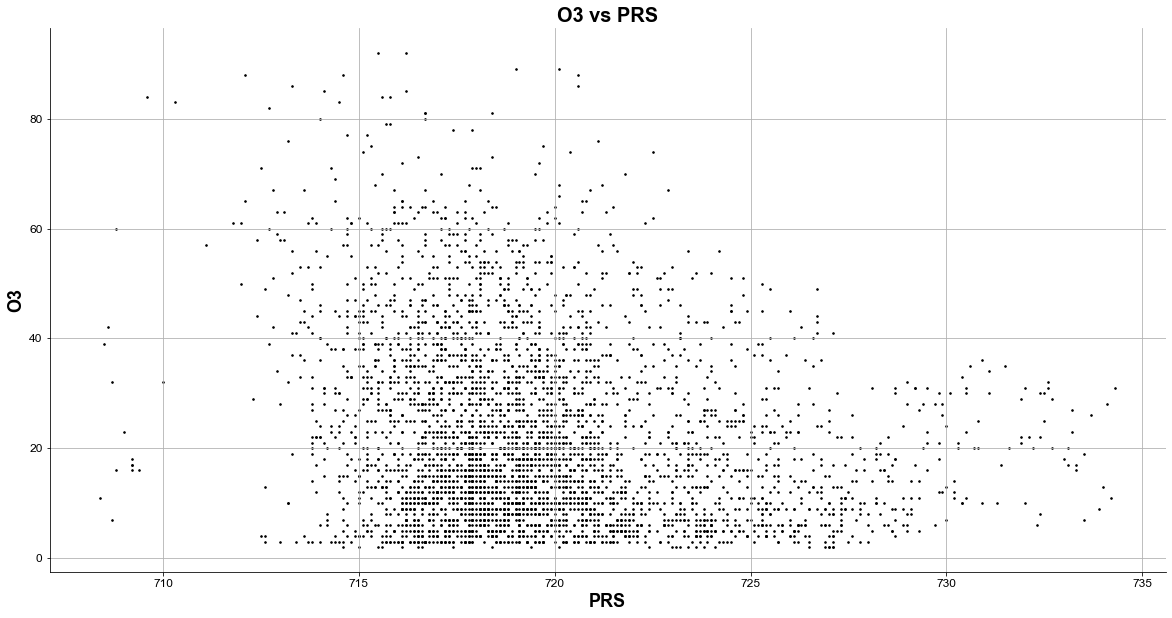

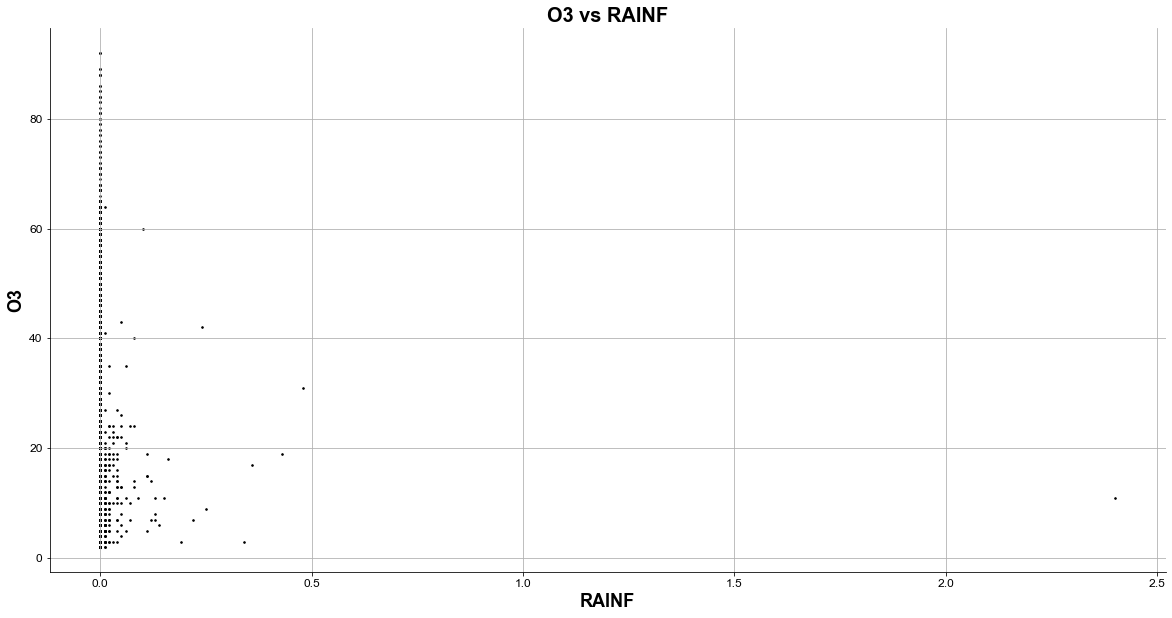

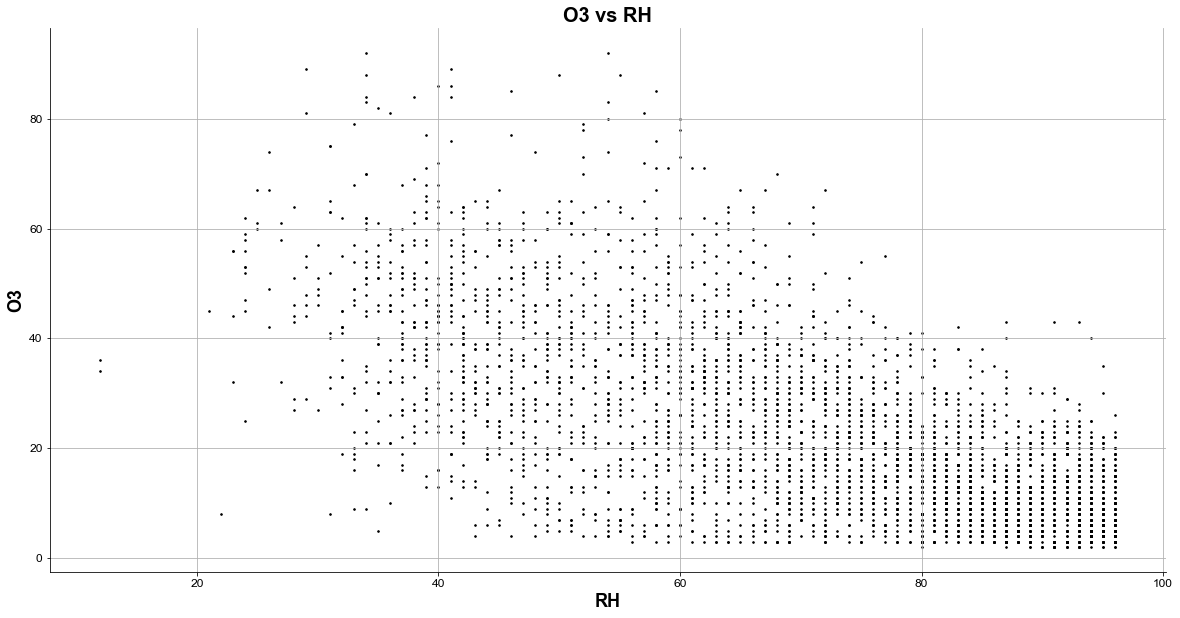

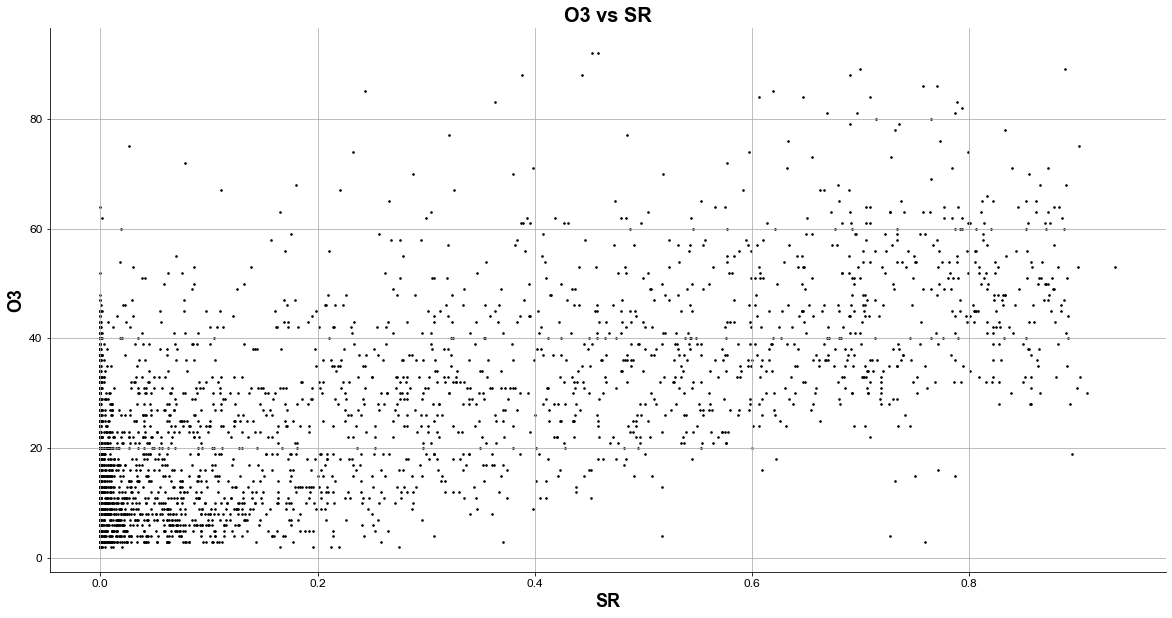

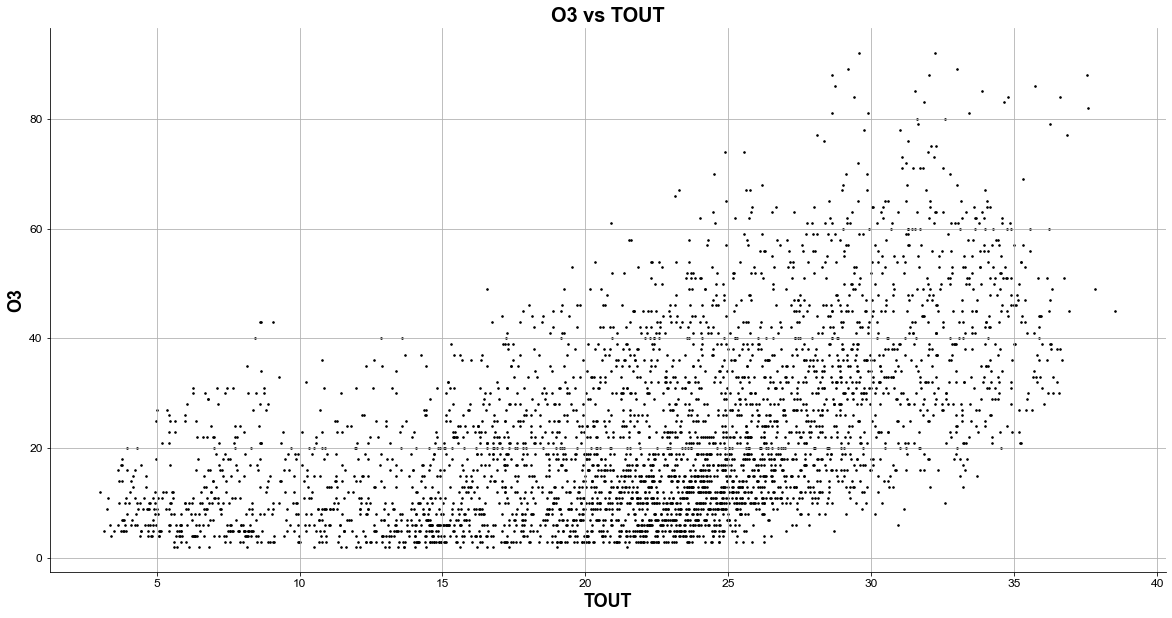

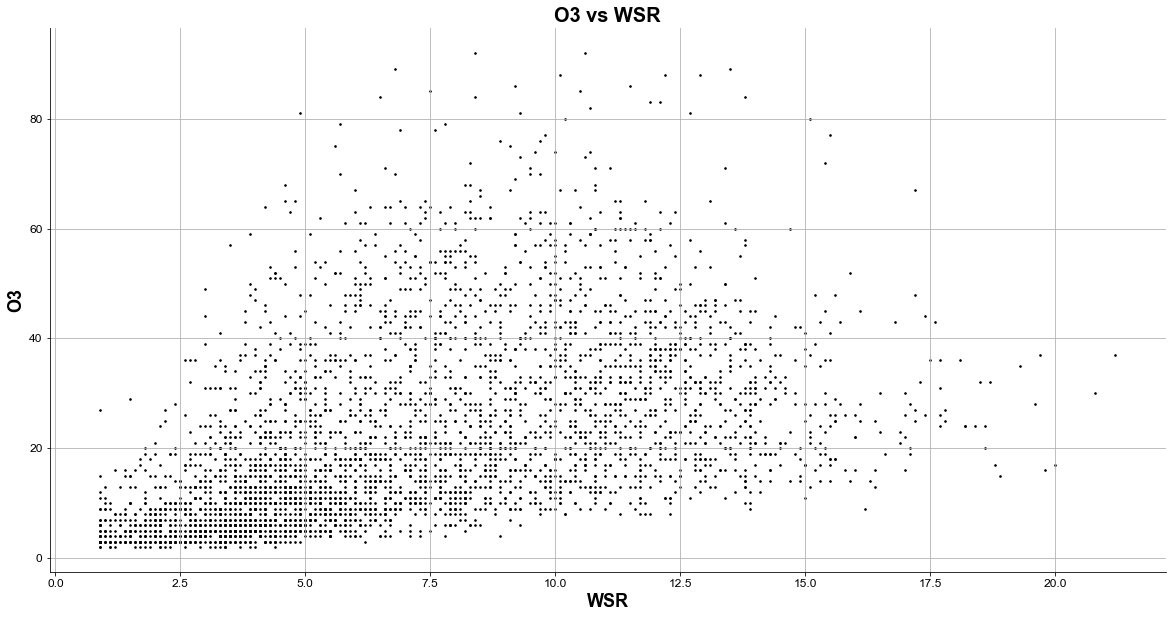

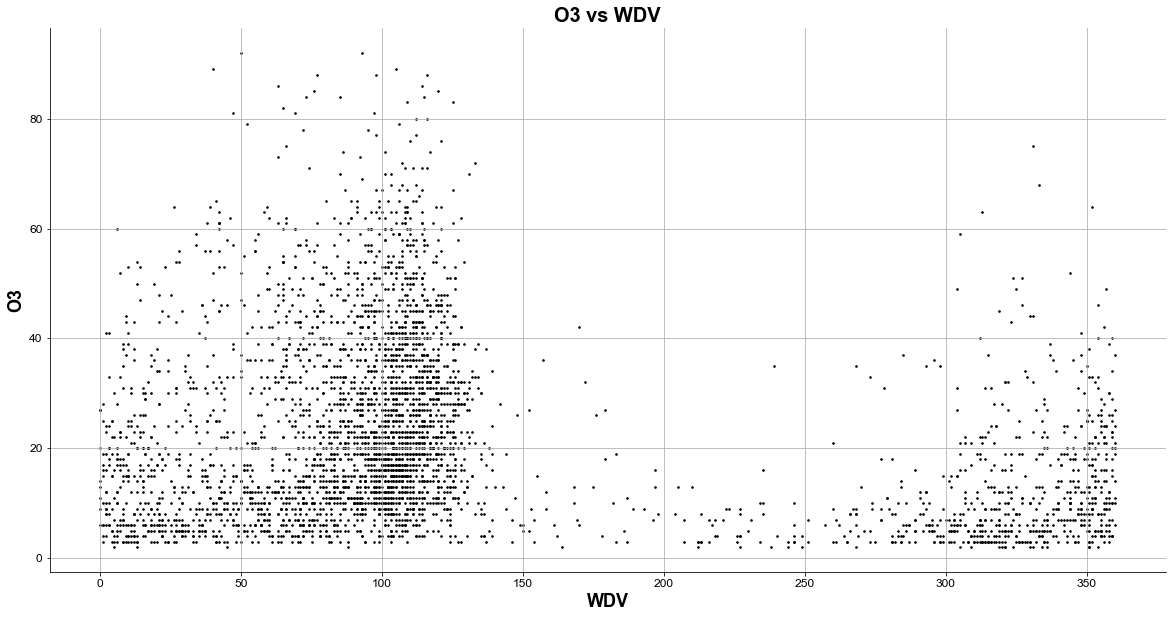

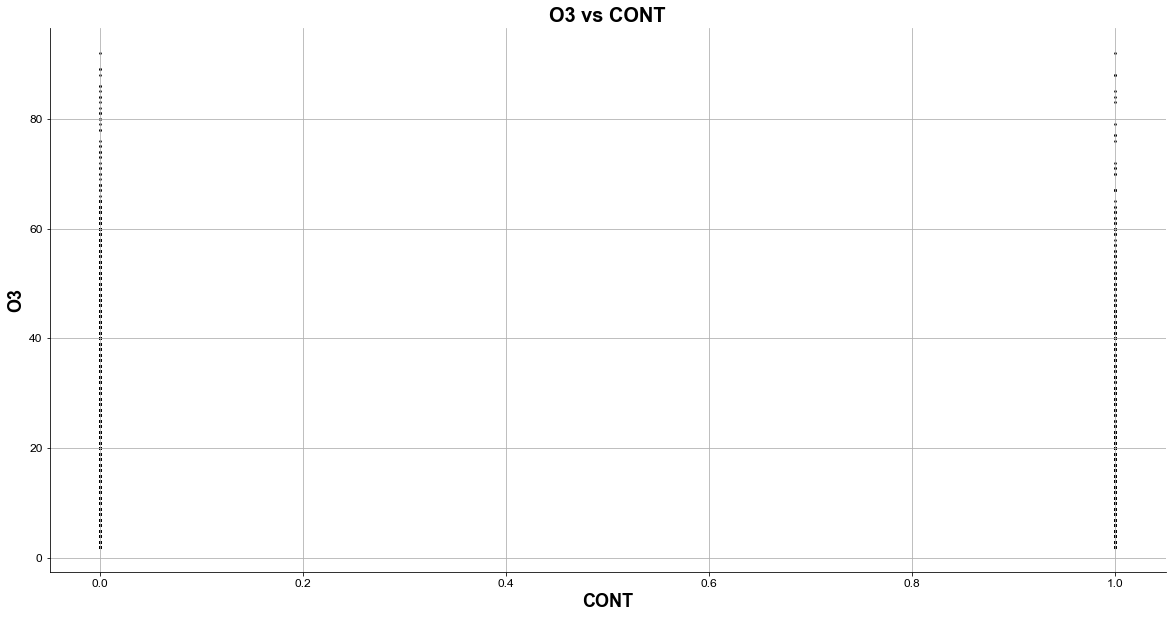

In [811]:
## Plots for O3#
for i in range(0,len(column_names)):
    nombre = column_names[i]
    y = O3
    x = df[nombre]    
    plt.figure(figsize=(20,10))
    plt.scatter(x,y, marker=".", c = "k" , s = 10)
    plt.title("O3 vs " + nombre ,**fontT)
    plt.xlabel(nombre,**fontL)
    plt.ylabel("O3",**fontL)
    plt.xticks(fontsize = 12 , family = "Arial")
    plt.yticks(fontsize = 12 , family = "Arial")
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.grid("On")
    plt.show()

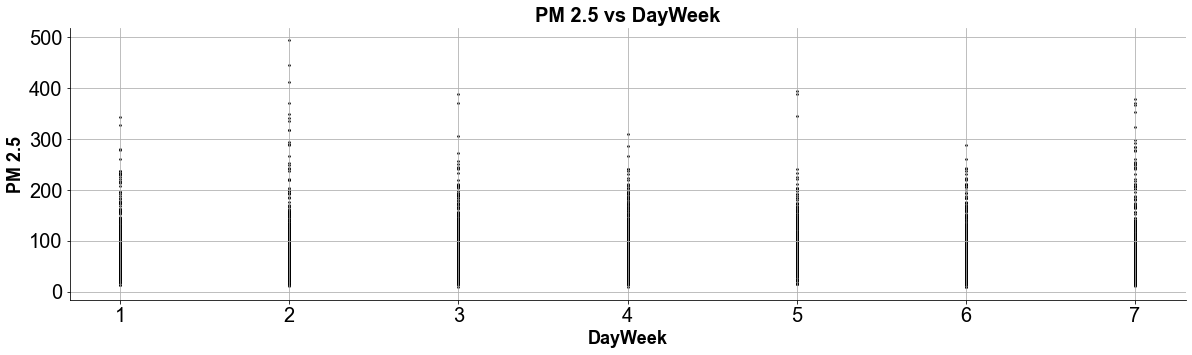

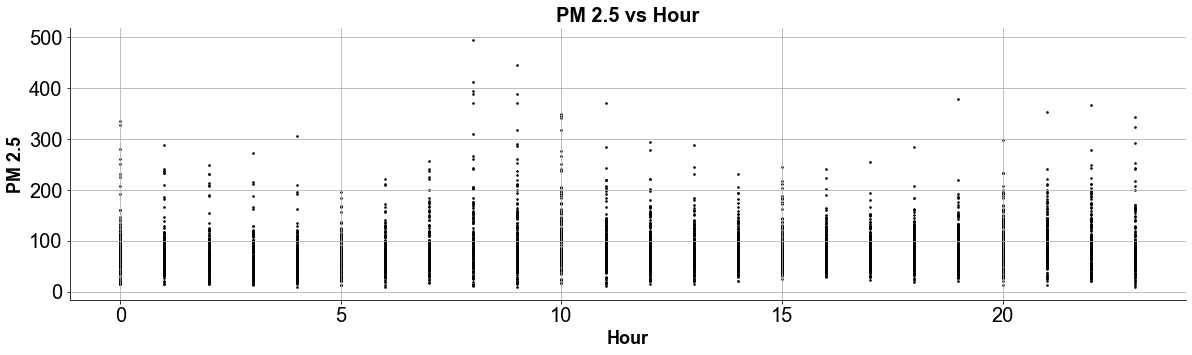

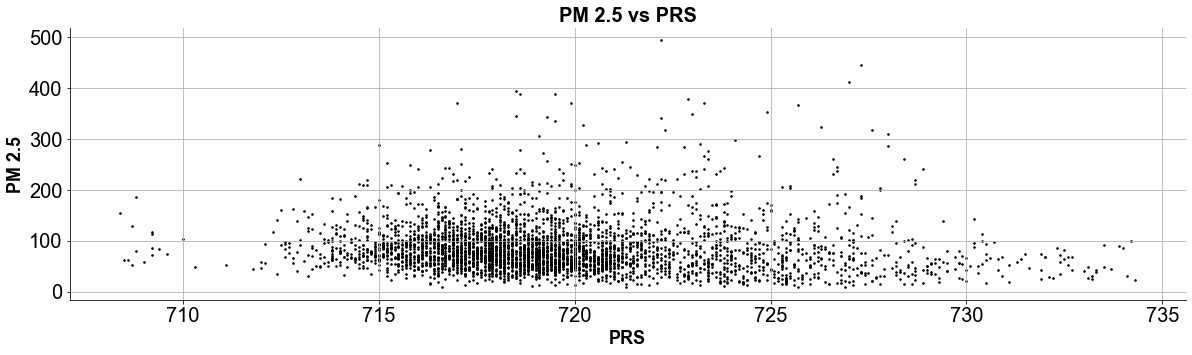

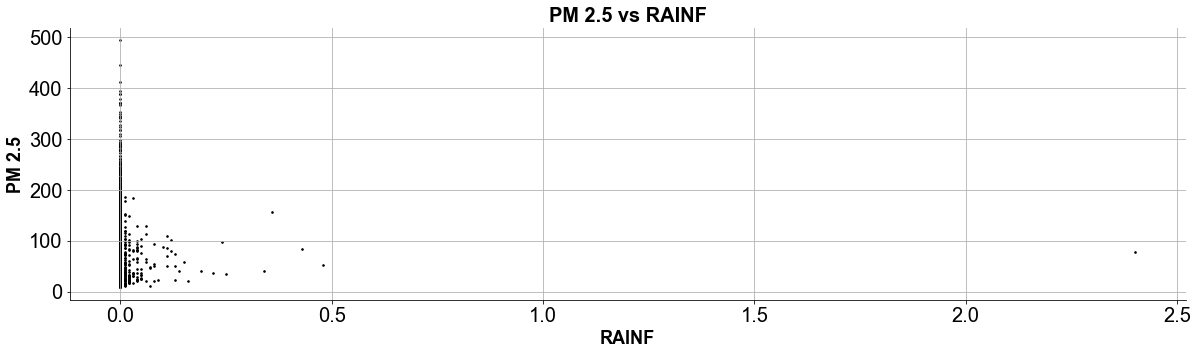

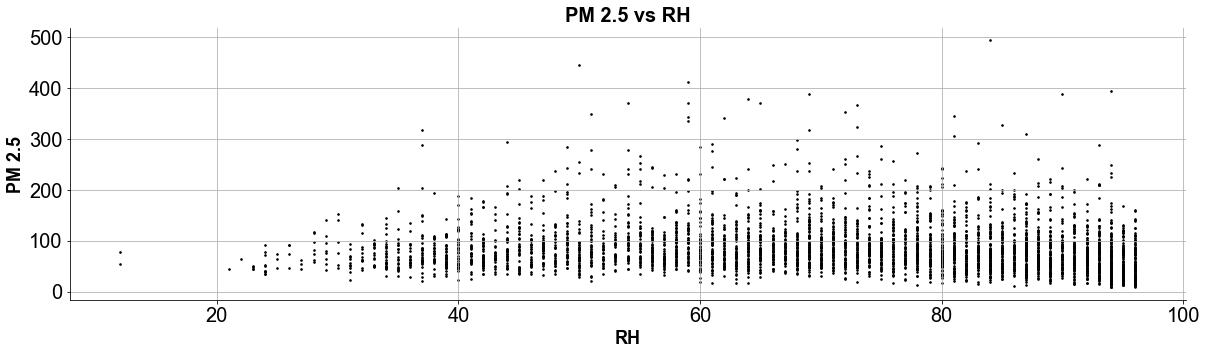

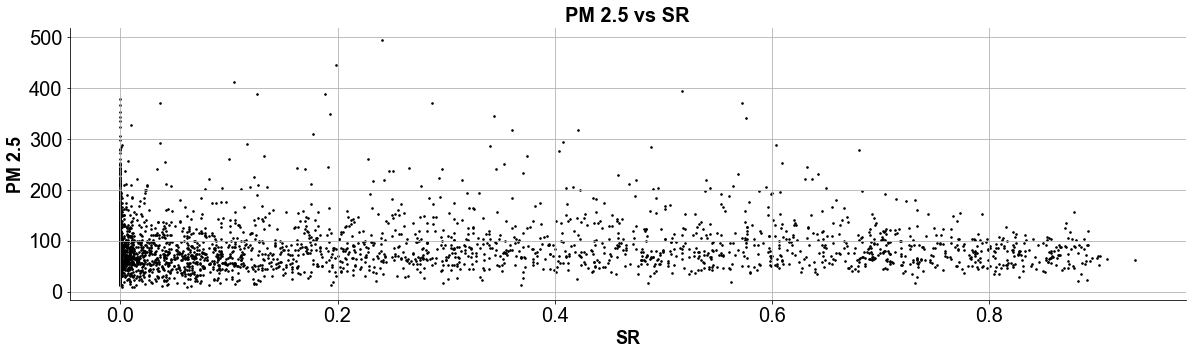

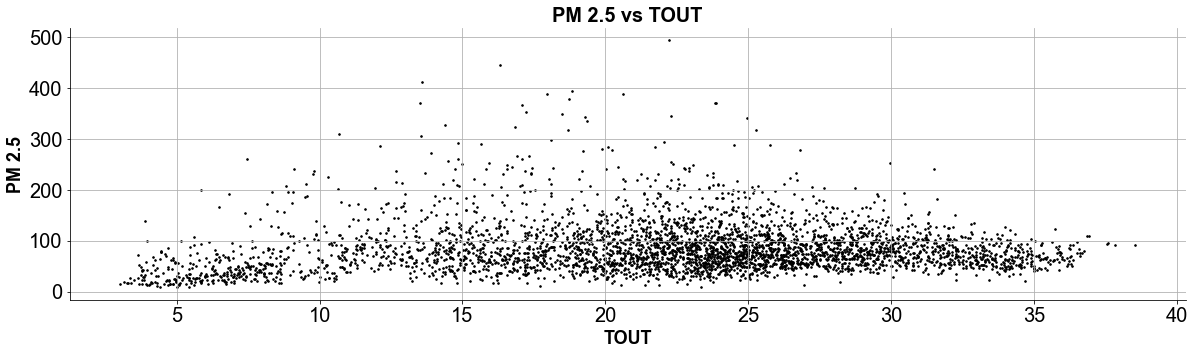

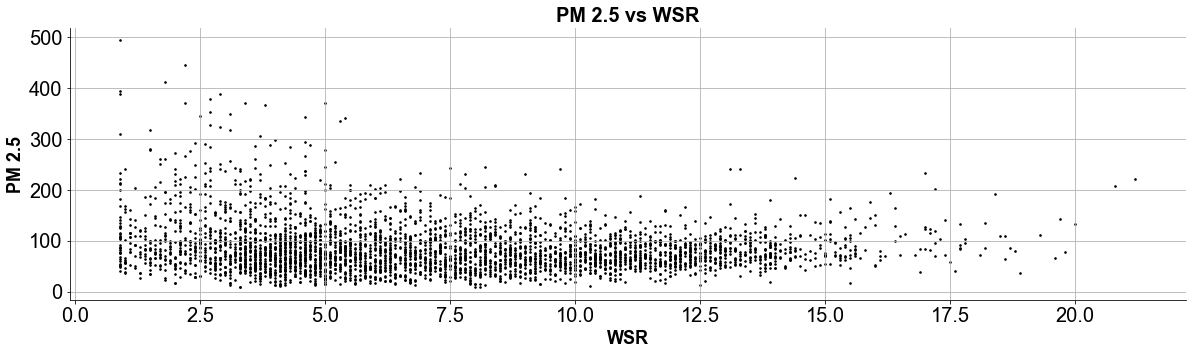

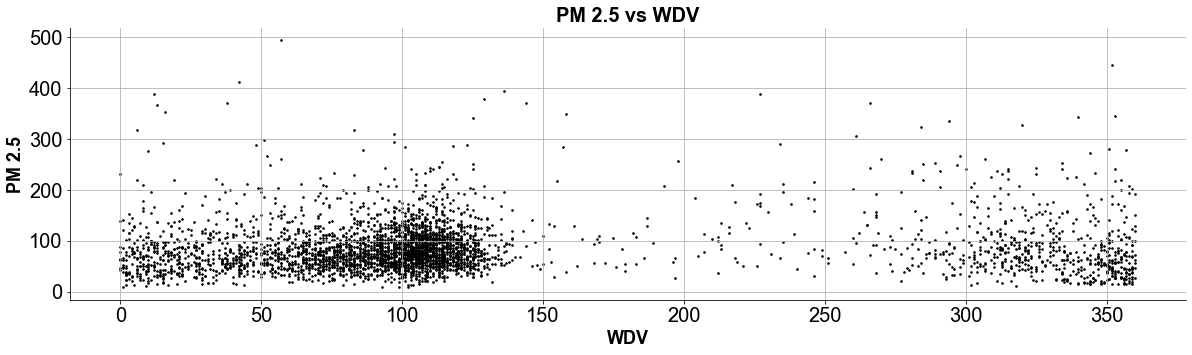

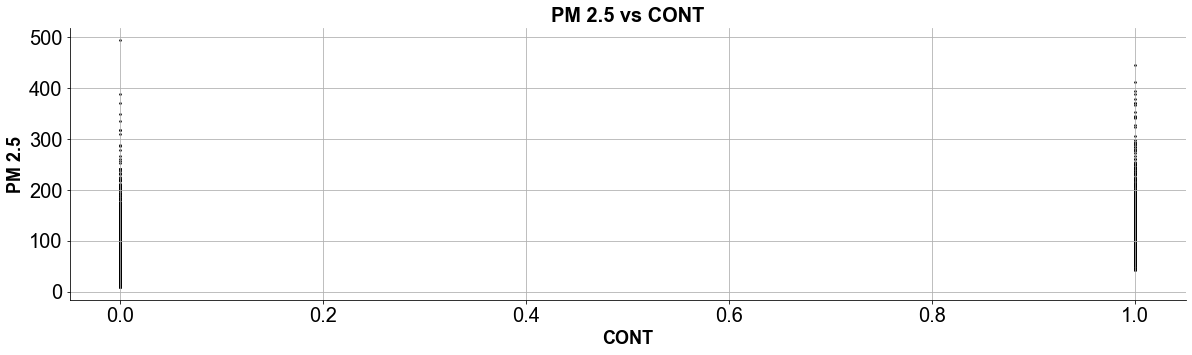

In [812]:
## Plots for PM 2.5#
for i in range(0,len(column_names)):
    nombre = column_names[i]
    y = PM_10
    x = df[nombre]    
    plt.rcParams["figure.figsize"] = (20,5)
    plt.scatter(x,y, marker=".", c = "k" , s = 10)
    plt.title("PM 2.5 vs " + nombre ,**fontT)
    plt.xlabel(nombre,**fontL)
    plt.ylabel("PM 2.5",**fontL)
    plt.xticks(fontsize = 20 , family = "Arial")
    plt.yticks(fontsize = 20 , family = "Arial")
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.grid("On")
    plt.show()

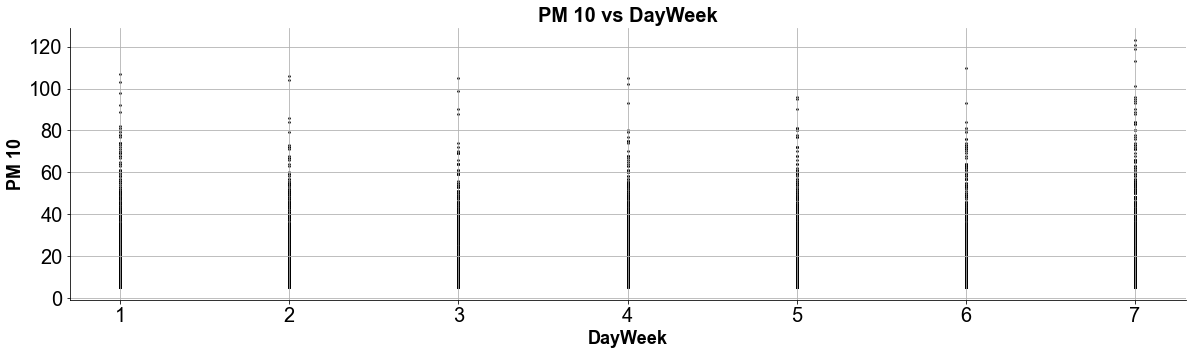

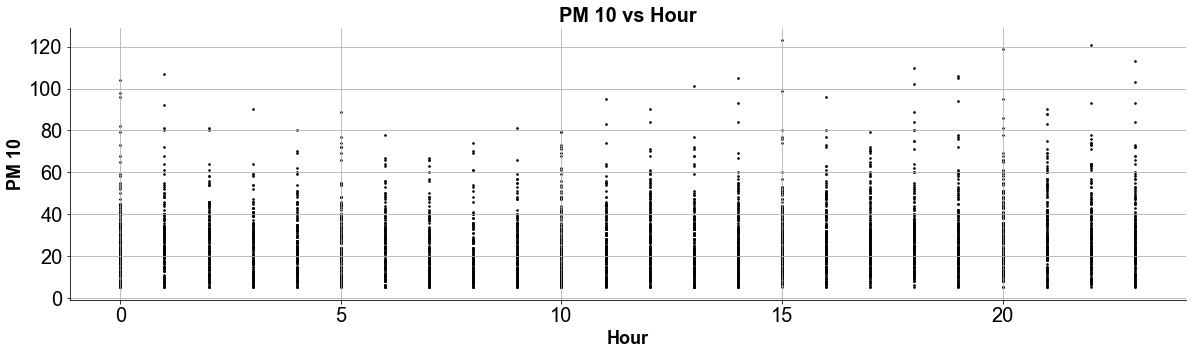

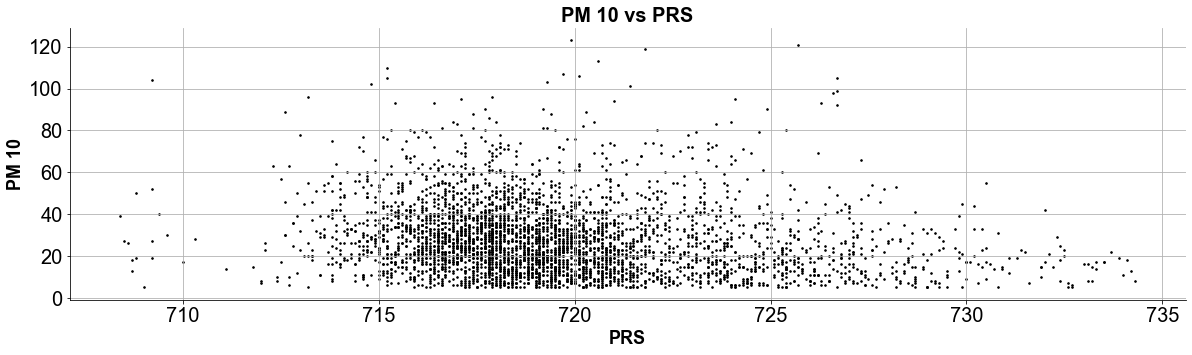

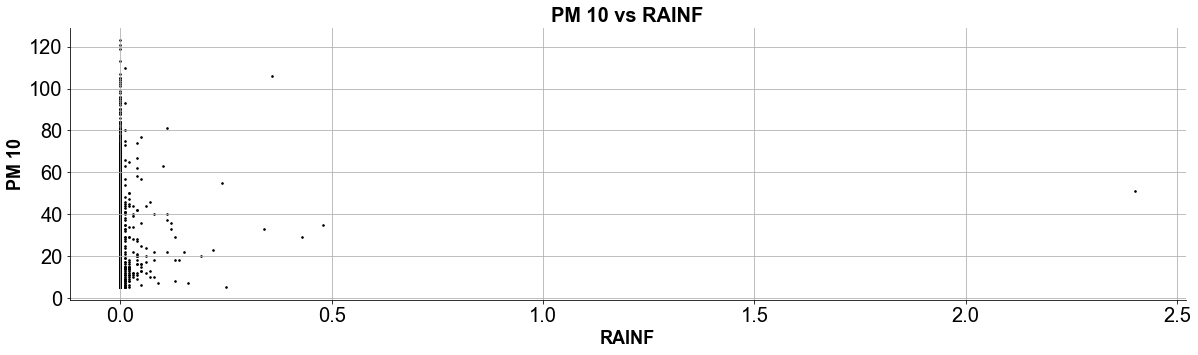

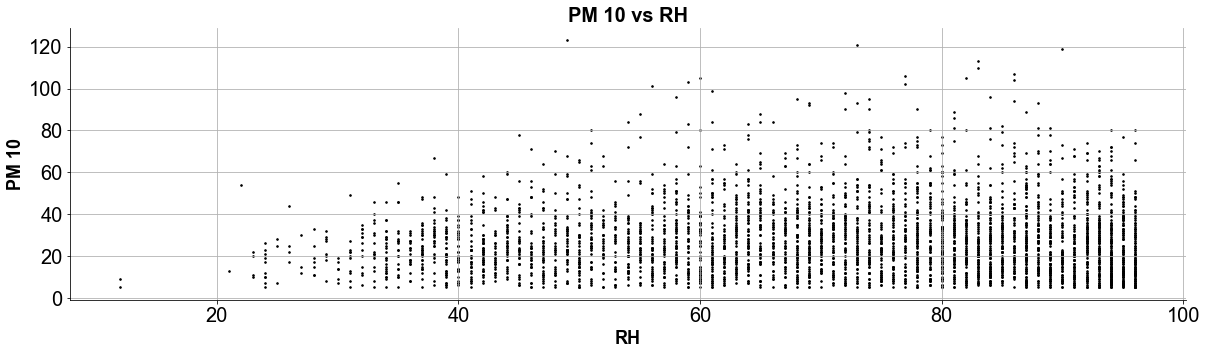

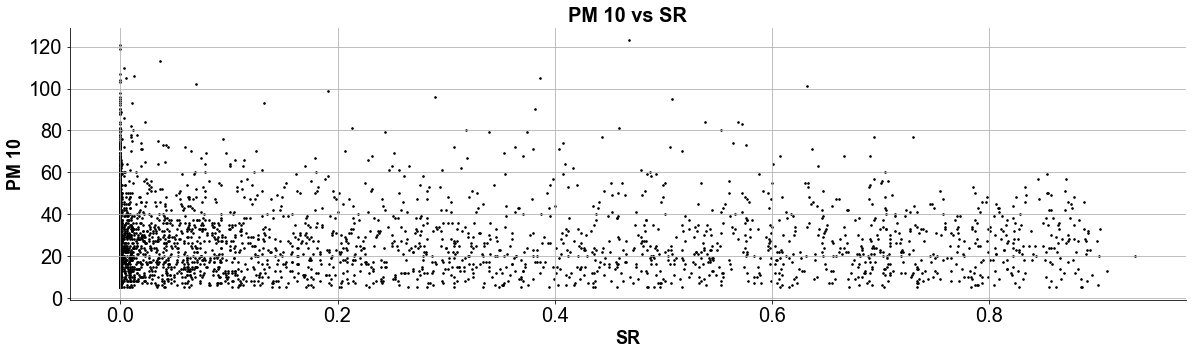

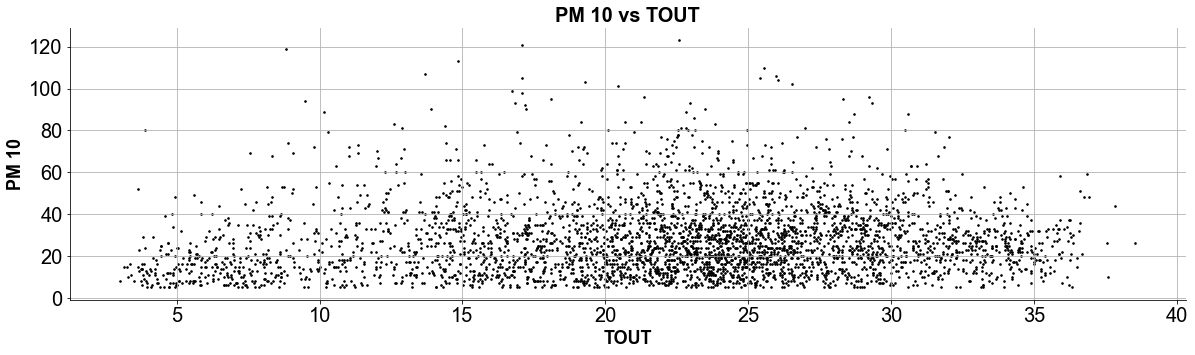

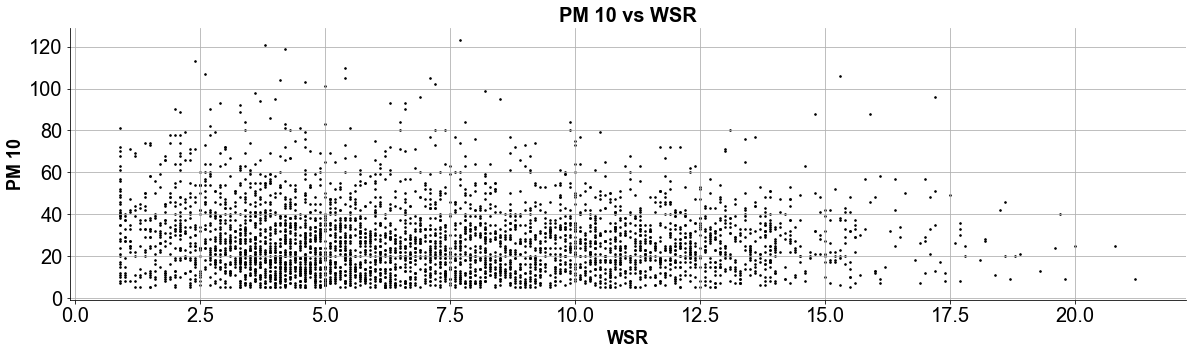

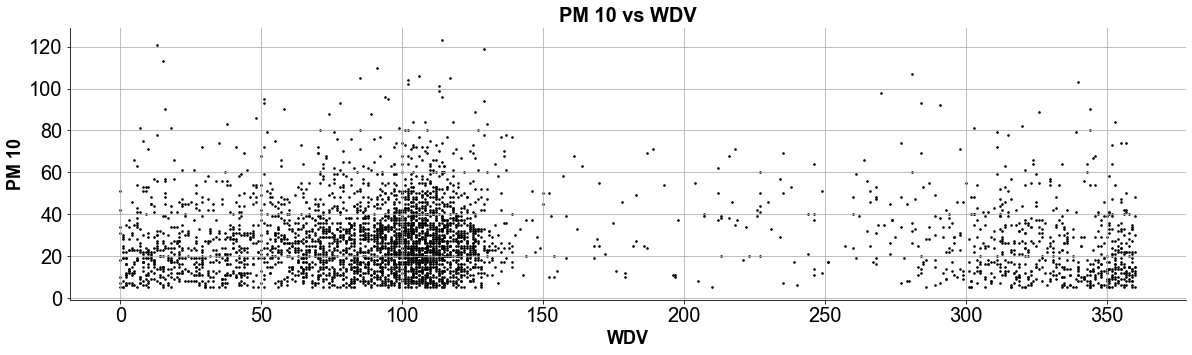

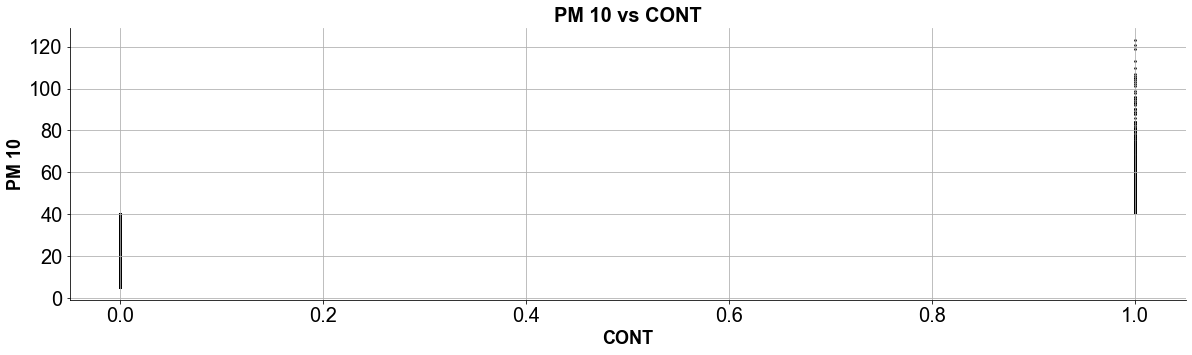

In [813]:
## Plots for PM 10#
for i in range(0,len(column_names)):
    nombre = column_names[i]
    y = PM_25
    x = df[nombre]    
    plt.rcParams["figure.figsize"] = (20,5)
    plt.scatter(x,y, marker=".", c = "k" , s = 10)
    plt.title("PM 10 vs " + nombre ,**fontT)
    plt.xlabel(nombre,**fontL)
    plt.ylabel("PM 10",**fontL)
    plt.xticks(fontsize = 20 , family = "Arial")
    plt.yticks(fontsize = 20 , family = "Arial")
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.grid("On")
    plt.show()

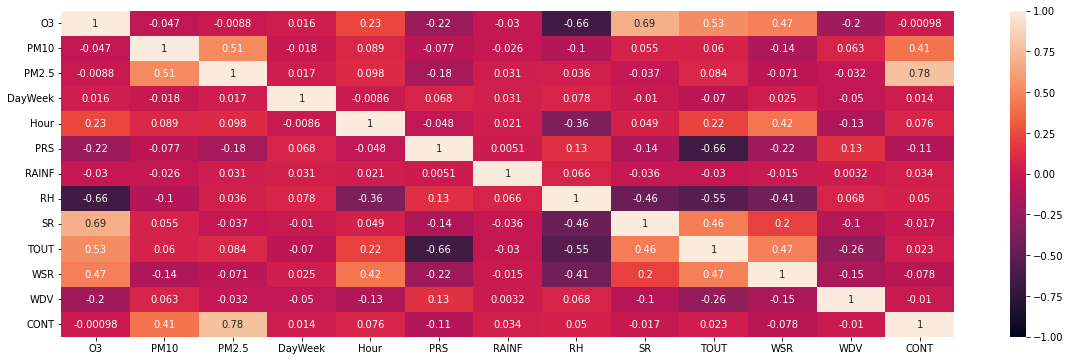

In [814]:
##Here is the correlation plot of the system##

corr_df = df

corr = corr_df.corr()
corr.style.background_gradient(cmap="coolwarm")

plt.figure(figsize=(20, 6))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True)

PCA O3
--

In [815]:
from sklearn.decomposition import PCA
from numpy import set_printoptions
from numpy import mean
from numpy import std
from numpy import zeros
from numpy import sqrt

set_printoptions(precision=6,suppress=True)

In [816]:
#Only O3 Dataframe
O3_df = df.drop(["PM10","PM2.5"],axis=1)
header_row=O3_df.columns.values

y=O3_df["O3"]


In [817]:
M = mean(O3_df.T, axis=1)
print(M)

#Std Deviation
st = std(O3_df.T, axis=1,ddof=1)

#Normalize data
Xdat = (O3_df - M)/st

print(st)
print(Xdat)

O3          22.658720
DayWeek      4.075926
Hour        12.037834
PRS        719.629956
RAINF        0.002651
RH          71.048458
SR           0.182582
TOUT        22.018969
WSR          7.331459
WDV        127.522156
CONT         0.182172
dtype: float64
O3         16.510561
DayWeek     1.973040
Hour        6.869488
PRS         3.695949
RAINF       0.042447
RH         18.334615
SR          0.261602
TOUT        7.545535
WSR         3.828216
WDV        96.515310
CONT        0.386036
dtype: float64
            O3   DayWeek      Hour       PRS     RAINF        RH        SR  \
0    -0.766704  0.468350 -1.606791  1.561181  0.173134  1.360898 -0.697939   
1    -0.948406  0.468350 -1.461220  1.452954  0.408722  1.360898 -0.697939   
2    -0.948406  0.468350 -1.315649  1.290614 -0.062453  1.360898 -0.697939   
3    -0.948406  0.468350 -1.024506  1.182388  0.173134  1.360898 -0.697939   
4    -1.069541  0.468350 -0.587793  1.263558 -0.062453  1.360898 -0.610019   
...        ...       ...     

In [818]:
# create the PCA instance
pca = PCA()

# fit on data
pca = pca.fit(Xdat)

#Q eigenvectors
Q=pca.components_.T

#Explained deviations
s=sqrt(pca.explained_variance_)


In [819]:
# transform data obtain sample scores
F = pca.transform(Xdat)
print("Sample scores")

## Sample Scores ##
sample_scores = pd.DataFrame(F)
print(sample_scores)

Sample scores
            0         1         2         3         4         5         6   \
0    -3.447083 -0.590549 -0.123222  0.430742  2.143638 -1.290280 -0.931279   
1    -3.560162 -1.505163 -0.511376  0.199182  0.712194  0.411215 -1.218664   
2    -3.578845 -1.451739 -0.684835  0.035682  0.534186  0.035283 -1.280729   
3    -3.437927 -1.389494 -0.380973  0.026385  0.597085  0.195431 -1.235541   
4    -3.470018 -1.547614 -0.292443 -0.186225  0.638949 -0.055318 -1.304395   
...        ...       ...       ...       ...       ...       ...       ...   
3854 -1.096254 -0.317503  1.100140 -1.246479 -0.441867  0.253446  0.968228   
3855 -1.227664 -0.312129  1.036848 -1.322029 -0.294999  0.217817  0.859950   
3856 -1.136594 -0.375324  1.055094 -1.317059 -0.231779  0.178805  0.909479   
3857 -2.188889  0.218335 -1.272297  0.096377 -0.398644  0.432740  0.561803   
3858 -2.328972  0.415191 -1.263652  0.175648 -0.488844  0.393106  0.844059   

            7         8         9         10  
0 

In [820]:
# Obtain Factor Loadings
L = zeros(shape=(Q.shape))
for col in range(0,len(s)-1):
    L[:,col] = Q[:,col] * s[col]
print("Factor Loadings")

columms_factorLoading = []

for i in range(0,11):
    nombre =  "F" + str(i)
    columms_factorLoading.append(nombre)


## Factor Loadings Dataframe ##
factor_loadings = pd.DataFrame(L, columns= columms_factorLoading)
print(factor_loadings)

Factor Loadings
          F0        F1        F2        F3        F4        F5        F6  \
0   0.833634 -0.230123 -0.163366  0.191511  0.132423 -0.043402  0.082081   
1  -0.049659 -0.129622  0.291698  0.775800 -0.196031 -0.199224 -0.450027   
2   0.432768 -0.178685  0.697528 -0.299901  0.071013 -0.118294  0.029355   
3  -0.478246 -0.740930  0.123608  0.077532  0.118667 -0.103267  0.311122   
4  -0.054981  0.124236  0.306043  0.297777  0.505460  0.732981  0.072038   
5  -0.772080  0.314218  0.033979  0.120842 -0.147133  0.039108  0.005047   
6   0.661140 -0.218016 -0.443858  0.289645  0.209734 -0.037838  0.129591   
7   0.831701  0.363298 -0.101878 -0.032921 -0.088372  0.084712 -0.126625   
8   0.659360 -0.123634  0.388265 -0.156353 -0.157256  0.081899 -0.203281   
9  -0.304658 -0.266161 -0.239797 -0.309654  0.465099  0.001816 -0.678739   
10  0.000510  0.453457  0.203244  0.103392  0.598275 -0.584906  0.119646   

          F7        F8        F9  F10  
0   0.110577 -0.021171  0.35535

In [821]:
#Obtain squared cosines
COS2=L**2
print("Square Cosines")

## COS2  Dataframe ##
COS2_DF = pd.DataFrame(COS2)
print(COS2_DF)


Square Cosines
              0         1         2         3         4         5         6   \
0   6.949455e-01  0.052956  0.026688  0.036677  0.017536  0.001884  0.006737   
1   2.466019e-03  0.016802  0.085088  0.601866  0.038428  0.039690  0.202524   
2   1.872880e-01  0.031928  0.486545  0.089940  0.005043  0.013993  0.000862   
3   2.287190e-01  0.548977  0.015279  0.006011  0.014082  0.010664  0.096797   
4   3.022898e-03  0.015435  0.093662  0.088671  0.255490  0.537262  0.005189   
5   5.961082e-01  0.098733  0.001155  0.014603  0.021648  0.001529  0.000025   
6   4.371062e-01  0.047531  0.197010  0.083894  0.043988  0.001432  0.016794   
7   6.917265e-01  0.131985  0.010379  0.001084  0.007810  0.007176  0.016034   
8   4.347556e-01  0.015285  0.150750  0.024446  0.024729  0.006707  0.041323   
9   9.281663e-02  0.070841  0.057502  0.095885  0.216317  0.000003  0.460687   
10  2.595911e-07  0.205623  0.041308  0.010690  0.357933  0.342115  0.014315   

          7         8   

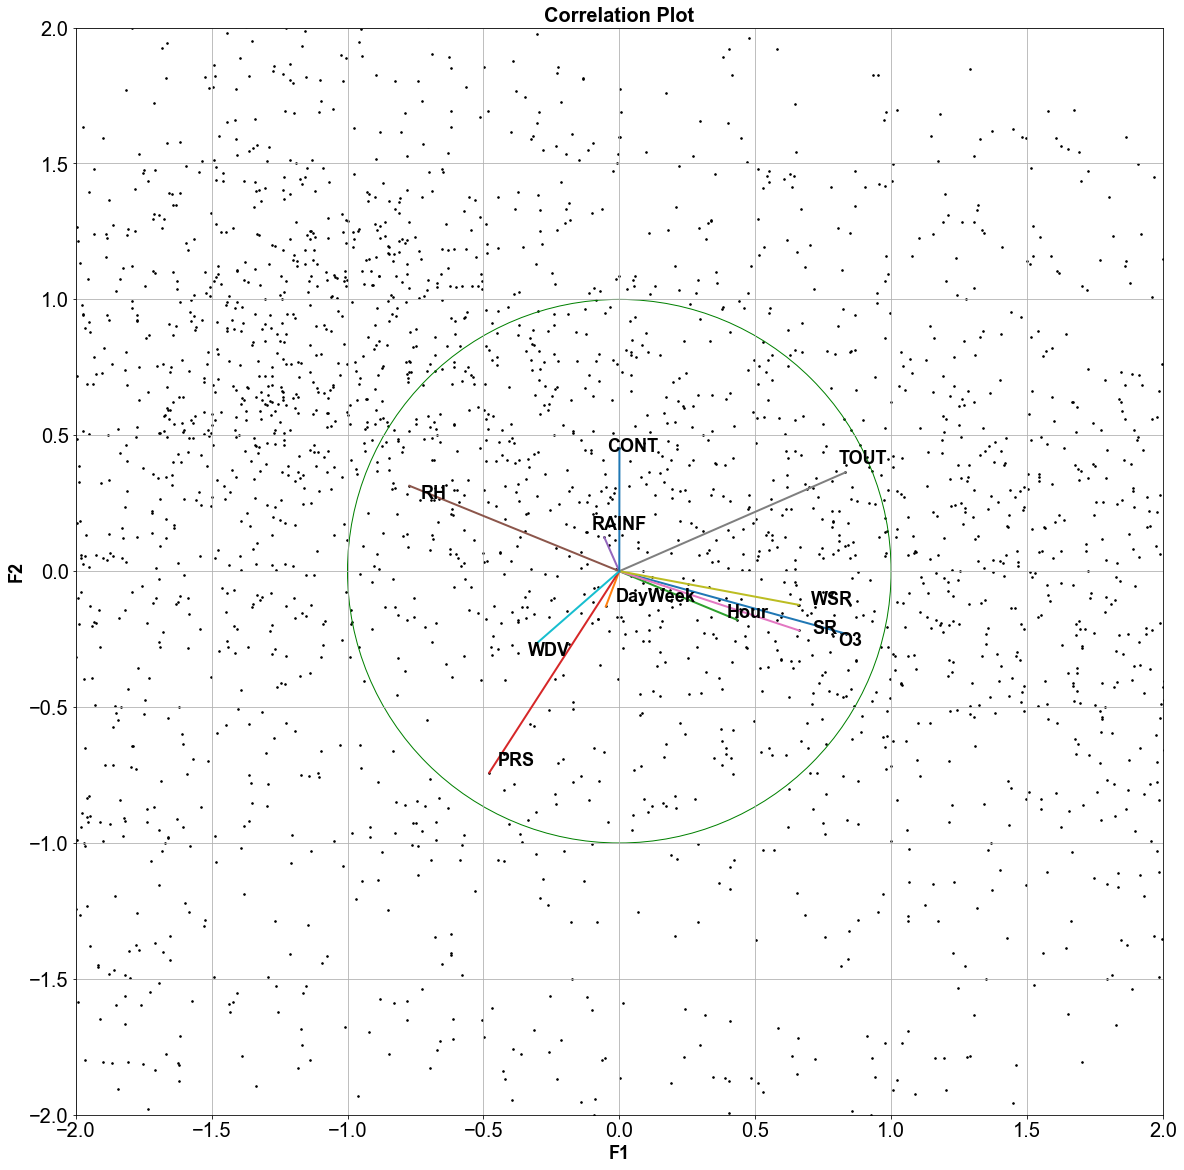

In [822]:
import random

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.grid()

circ=plt.Circle((0,0), radius=1, color='g', fill=False)
ax.add_patch(circ)
ax.set_aspect('equal')

plt.scatter(L[:,0],L[:,1],marker=".", c = "k" , s = 10)
plt.scatter(F[:,0],F[:,1],marker=".", c = "k" , s = 10)


for row in range(0,len(s)):
    plt.plot([0, L[row,0]], [0,L[row,1]], linewidth=2,label='X1')

for row in range(0,len(s)):
    #ax.annotate('X'+str(row+1), (L[row,0]+0.01,L[row,1]+0.01))
    ax.annotate(header_row[row], (L[row,0]+random.uniform(-0.05,0.05),L[row,1]+random.uniform(-0.05,0.05)),**fontL)

plt.ylabel('F2',**fontL)
plt.xlabel('F1',**fontL)

plt.xlim(-2,2)
plt.ylim(-2,2)

plt.xticks(fontsize = 20 , family = "Arial")
plt.yticks(fontsize = 20 , family = "Arial")

plt.title('Correlation Plot',**fontT)
fig.set_size_inches(30, 20)
fig.savefig('PCA_Correlation_Plot.jpg', dpi=300)
plt.show()

In [823]:
#Recuperate F just in case
F = pca.transform(Xdat)
F_df=pd.DataFrame(F[:,[0,1,2]],columns=["F1","F2","F3"])

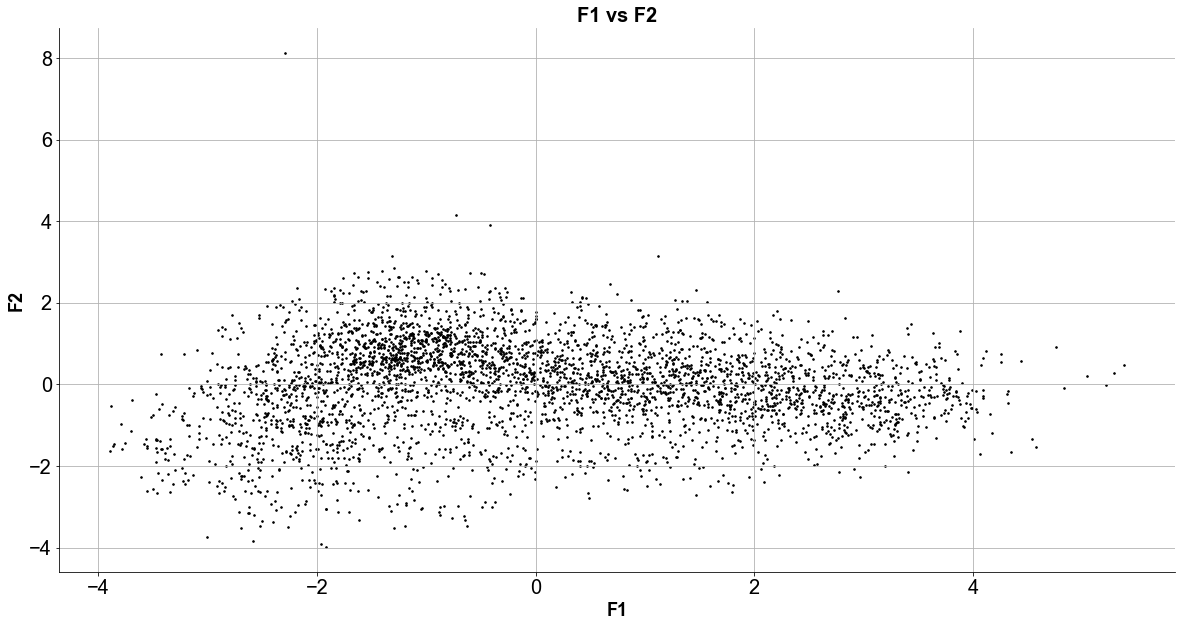

In [824]:
## Plots for Factor Loadings  F1 VS F2 #
plt.figure(figsize=(20,10))

plt.scatter(x= F_df['F1'],y=F_df['F2'], marker=".", c = "k" , s = 10)
plt.title("F1 vs F2",**fontT)
plt.xlabel("F1",**fontL)
plt.ylabel("F2",**fontL)
plt.xticks(fontsize = 20 , family = "Arial")
plt.yticks(fontsize = 20 , family = "Arial")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid("On")
plt.show()



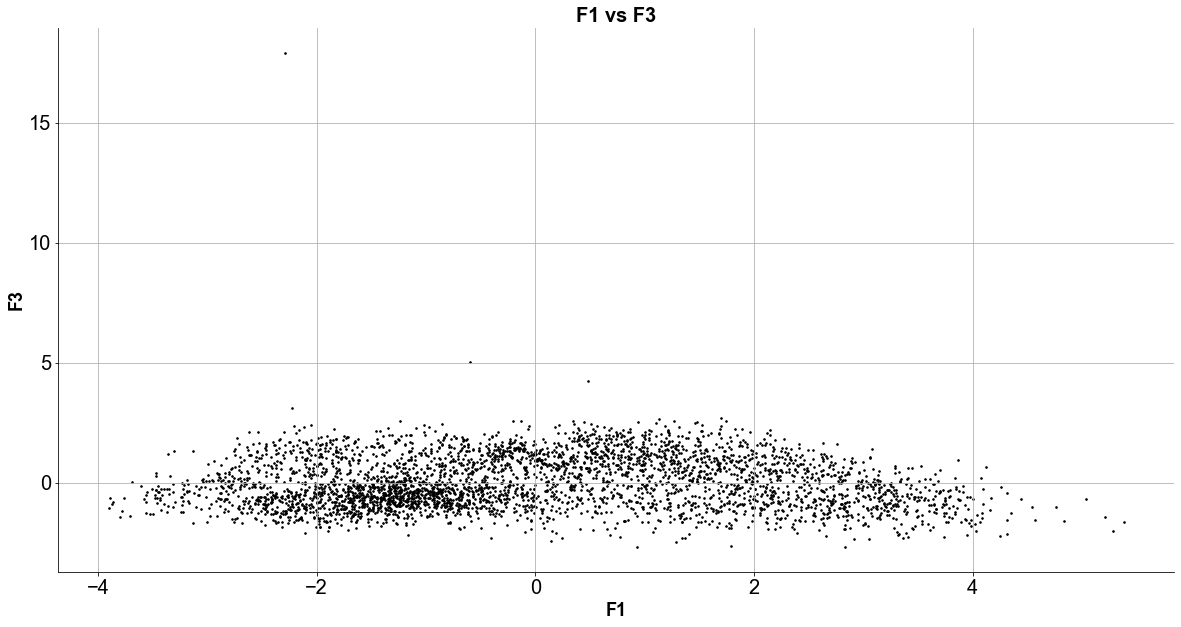

In [825]:
## Plots for Factor Loadings  F1 VS F2 #
plt.figure(figsize=(20,10))

plt.scatter(x= F_df['F1'],y=F_df['F3'], marker=".", c = "k" , s = 10)
plt.title("F1 vs F3",**fontT)
plt.xlabel("F1",**fontL)
plt.ylabel("F3",**fontL)
plt.xticks(fontsize = 20 , family = "Arial")
plt.yticks(fontsize = 20 , family = "Arial")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid("On")
plt.show()

PCA 2.5
--

In [826]:
set_printoptions(precision=6,suppress=True)

In [827]:
#Only O3 Dataframe
PM25_df = df.drop(["PM10","O3"],axis=1)
header_row=PM25_df.columns.values

y= PM25_df.values

In [828]:
M = mean(PM25_df.T, axis=1)
print(M)

#Std Deviation
st = std(PM25_df.T, axis=1,ddof=1)

#Normalize data
Xdat = (PM25_df - M)/st

print(st)
print(Xdat)

PM2.5       27.675823
DayWeek      4.075926
Hour        12.037834
PRS        719.629956
RAINF        0.002651
RH          71.048458
SR           0.182582
TOUT        22.018969
WSR          7.331459
WDV        127.522156
CONT         0.182172
dtype: float64
PM2.5      16.849434
DayWeek     1.973040
Hour        6.869488
PRS         3.695949
RAINF       0.042447
RH         18.334615
SR          0.261602
TOUT        7.545535
WSR         3.828216
WDV        96.515310
CONT        0.386036
dtype: float64
         PM2.5   DayWeek      Hour       PRS     RAINF        RH        SR  \
0     3.105397  0.468350 -1.606791  1.561181  0.173134  1.360898 -0.697939   
1     0.078589  0.468350 -1.461220  1.452954  0.408722  1.360898 -0.697939   
2    -1.108395  0.468350 -1.315649  1.290614 -0.062453  1.360898 -0.697939   
3    -0.811649  0.468350 -1.024506  1.182388  0.173134  1.360898 -0.697939   
4    -1.167744  0.468350 -0.587793  1.263558 -0.062453  1.360898 -0.610019   
...        ...       ...     

In [829]:
# create the PCA instance
pca = PCA()

# fit on data
pca = pca.fit(Xdat)

#Q eigenvectors
Q=pca.components_.T

#Explained deviations
s=sqrt(pca.explained_variance_)

In [830]:
# transform data obtain sample scores
F = pca.transform(Xdat)
print("Sample scores")

## Sample Scores ##
sample_scores = pd.DataFrame(F)
print(sample_scores)

Sample scores
            0         1         2         3         4         5         6   \
0    -3.332104  3.364667  0.788140 -1.419338 -0.512252  1.279109 -0.863443   
1    -3.619532 -0.365693  0.406407 -0.699038  0.080974  1.092205 -1.073600   
2    -3.700960 -1.136480  0.182067 -0.788381 -0.143029  0.800074 -1.204013   
3    -3.511648 -0.900275  0.409144 -0.667464  0.060791  0.795374 -1.170142   
4    -3.507265 -1.146002  0.575577 -0.918854 -0.048656  0.713199 -1.240448   
...        ...       ...       ...       ...       ...       ...       ...   
3854 -0.870761 -0.978201  0.923340 -0.182787  0.875026 -1.397590  0.634430   
3855 -0.952444 -0.566065  0.917680 -0.371798  0.881607 -1.301008  0.551943   
3856 -0.948200 -0.632679  0.970539 -0.400835  0.895292 -1.307883  0.582909   
3857 -2.200881 -0.422381 -1.291091  0.114737  0.101790 -0.186136  0.509124   
3858 -2.262441 -0.413799 -1.398174  0.274009  0.063491 -0.279091  0.791066   

            7         8         9         10  
0 

In [831]:
# Obtain Factor Loadings
L = zeros(shape=(Q.shape))
for col in range(0,len(s)-1):
    L[:,col] = Q[:,col] * s[col]
print("Factor Loadings")

columms_factorLoading = []

for i in range(0,11):
    nombre =  "F" + str(i)
    columms_factorLoading.append(nombre)


## Factor Loadings Dataframe ##
factor_loadings = pd.DataFrame(L, columns= columms_factorLoading)
print(factor_loadings)

Factor Loadings
          F0        F1        F2        F3        F4        F5        F6  \
0   0.098614  0.926575  0.060368 -0.094054 -0.061560  0.028244  0.024809   
1  -0.074971  0.030014  0.314278  0.575360 -0.557906  0.338068 -0.357507   
2   0.482353  0.044370  0.694308 -0.110425  0.142707 -0.233560 -0.025009   
3  -0.563383 -0.242595  0.519107 -0.259623 -0.191178  0.170124  0.376025   
4  -0.054471  0.092364  0.179540  0.392990  0.707622  0.533241  0.124385   
5  -0.733892  0.183714 -0.161754  0.321727  0.075702 -0.218342 -0.087796   
6   0.569974 -0.139360 -0.216871 -0.170308 -0.269924  0.526111  0.294819   
7   0.880499  0.032747 -0.293039  0.108814  0.042523  0.011266 -0.099710   
8   0.673572 -0.176396  0.355735  0.054880  0.077865 -0.143523 -0.229303   
9  -0.327247 -0.040384 -0.010095 -0.576022  0.151915  0.358257 -0.634157   
10  0.053451  0.914040  0.092564 -0.136195 -0.084604  0.074699  0.068934   

          F7        F8        F9  F10  
0   0.033075  0.043552  0.33206

In [832]:
#Obtain squared cosines
COS2=L**2
print("Square Cosines")

## COS2  Dataframe ##
COS2_DF = pd.DataFrame(COS2)
print(COS2_DF)

Square Cosines
          0         1         2         3         4         5         6   \
0   0.009725  0.858540  0.003644  0.008846  0.003790  0.000798  0.000615   
1   0.005621  0.000901  0.098771  0.331039  0.311259  0.114290  0.127812   
2   0.232664  0.001969  0.482064  0.012194  0.020365  0.054550  0.000625   
3   0.317401  0.058852  0.269473  0.067404  0.036549  0.028942  0.141394   
4   0.002967  0.008531  0.032234  0.154442  0.500729  0.284346  0.015472   
5   0.538598  0.033751  0.026164  0.103508  0.005731  0.047673  0.007708   
6   0.324870  0.019421  0.047033  0.029005  0.072859  0.276793  0.086918   
7   0.775278  0.001072  0.085872  0.011841  0.001808  0.000127  0.009942   
8   0.453699  0.031115  0.126547  0.003012  0.006063  0.020599  0.052580   
9   0.107090  0.001631  0.000102  0.331801  0.023078  0.128348  0.402155   
10  0.002857  0.835469  0.008568  0.018549  0.007158  0.005580  0.004752   

          7         8             9    10  
0   0.001094  0.001897  1.10

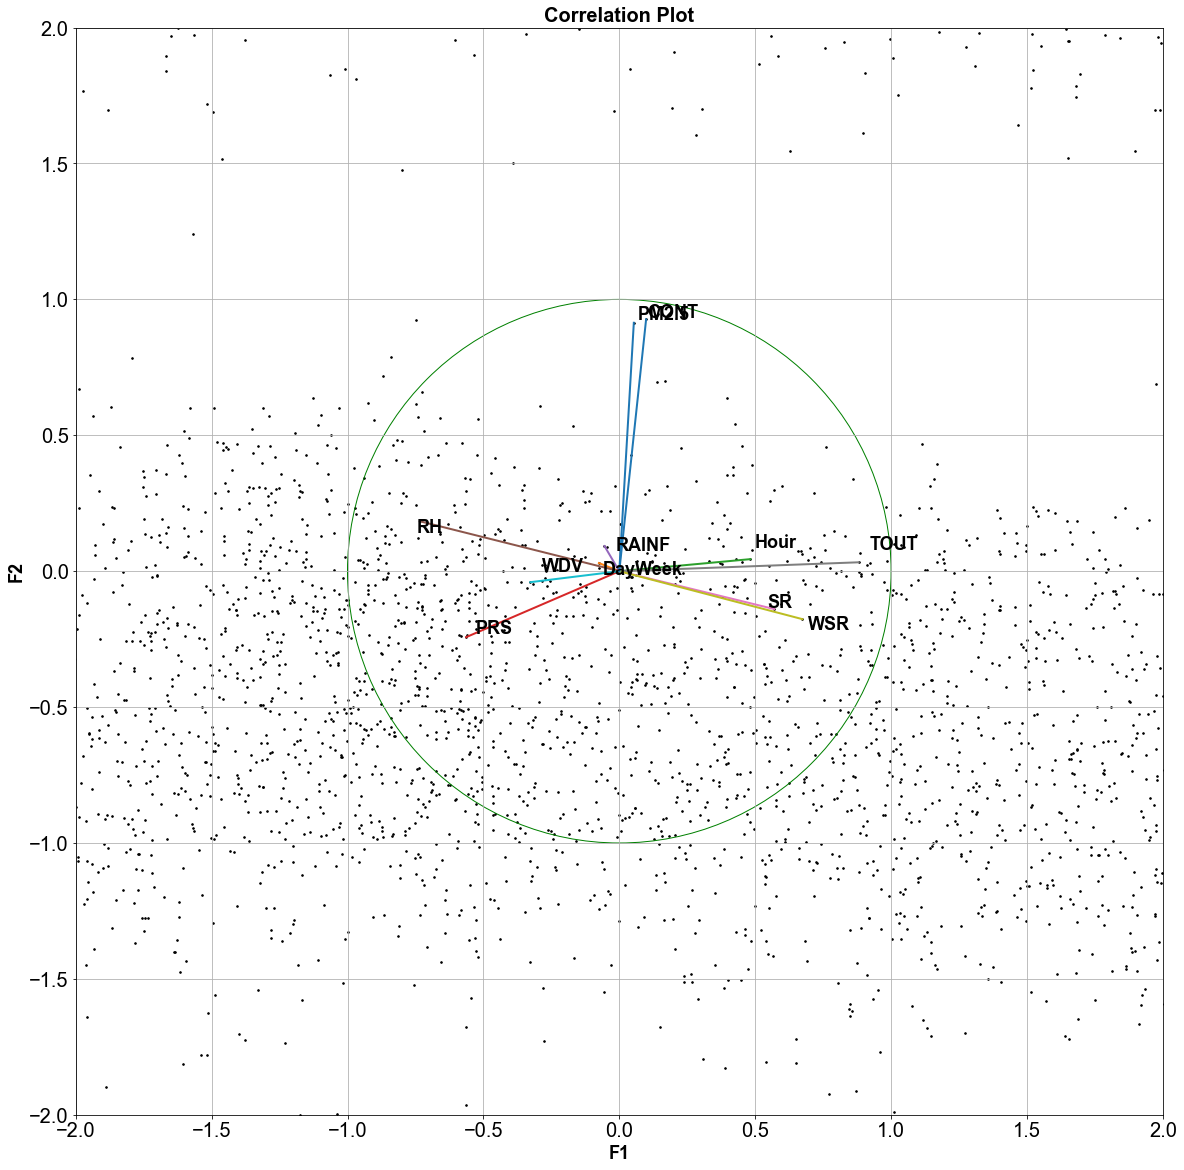

In [833]:
import random

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.grid()

circ=plt.Circle((0,0), radius=1, color='g', fill=False)
ax.add_patch(circ)
ax.set_aspect('equal')

plt.scatter(L[:,0],L[:,1],marker=".", c = "k" , s = 10)
plt.scatter(F[:,0],F[:,1],marker=".", c = "k" , s = 10)


for row in range(0,len(s)):
    plt.plot([0, L[row,0]], [0,L[row,1]], linewidth=2,label='X1')

for row in range(0,len(s)):
    #ax.annotate('X'+str(row+1), (L[row,0]+0.01,L[row,1]+0.01))
    ax.annotate(header_row[row], (L[row,0]+random.uniform(-0.05,0.05),L[row,1]+random.uniform(-0.05,0.05)),**fontL)

plt.ylabel('F2',**fontL)
plt.xlabel('F1',**fontL)

plt.xlim(-2,2)
plt.ylim(-2,2)

plt.xticks(fontsize = 20 , family = "Arial")
plt.yticks(fontsize = 20 , family = "Arial")

plt.title('Correlation Plot',**fontT)
fig.set_size_inches(30, 20)
fig.savefig('PCA_Correlation_Plot.jpg', dpi=300)
plt.show()

Regresion
--

Variable Regression
--

In [834]:
## We get back the data that we are analyzing ##
regression_columnNames = column_names.drop(['CONT'])

## Predicting Variable ##
x  = df[regression_columnNames]

## Y model of O3 ##
y = O3.values


In [835]:
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn.metrics import r2_score

def regression_results(y_true, y_pred):
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

explained_variance:  0.0003
r2:  0.0003
MAE:  13.2458
MSE:  272.4583
RMSE:  16.5063


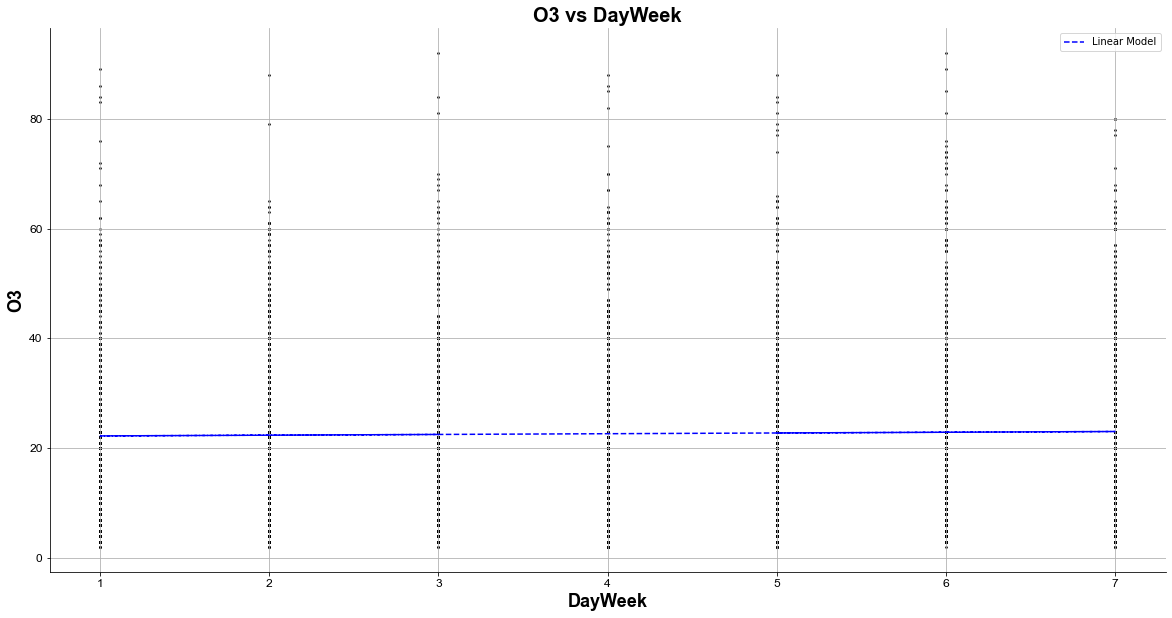

explained_variance:  0.0003
r2:  0.0003
MAE:  13.2458
MSE:  272.4583
RMSE:  16.5063
explained_variance:  0.0522
r2:  0.0522
MAE:  12.7226
MSE:  258.3135
RMSE:  16.0721


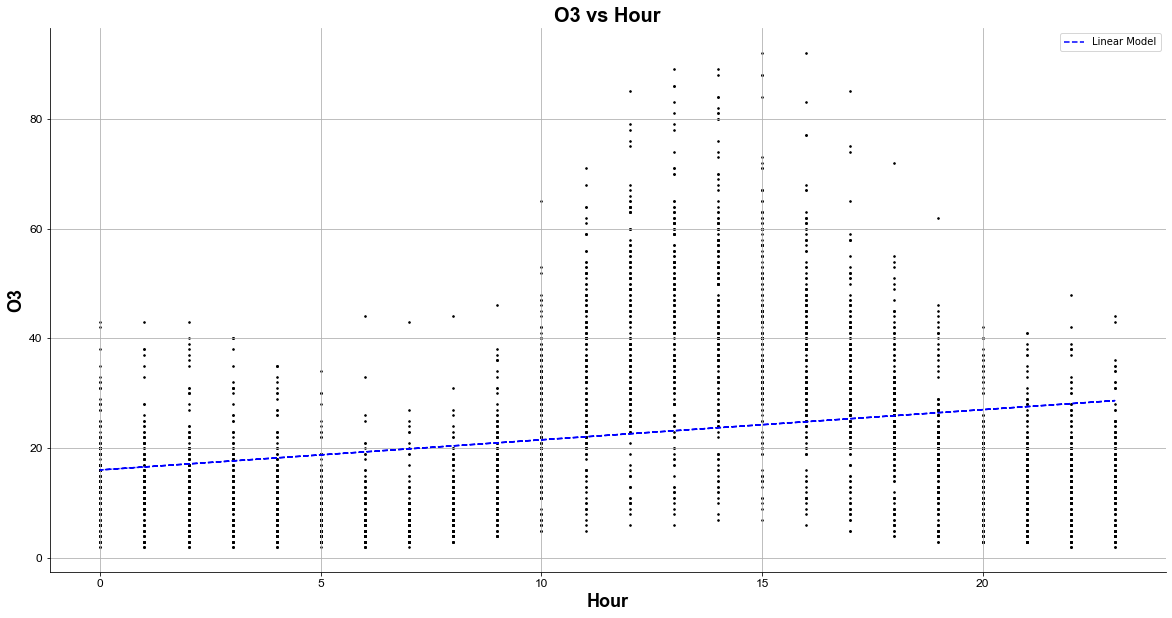

explained_variance:  0.0522
r2:  0.0522
MAE:  12.7226
MSE:  258.3135
RMSE:  16.0721
explained_variance:  0.0483
r2:  0.0483
MAE:  12.9606
MSE:  259.3697
RMSE:  16.105


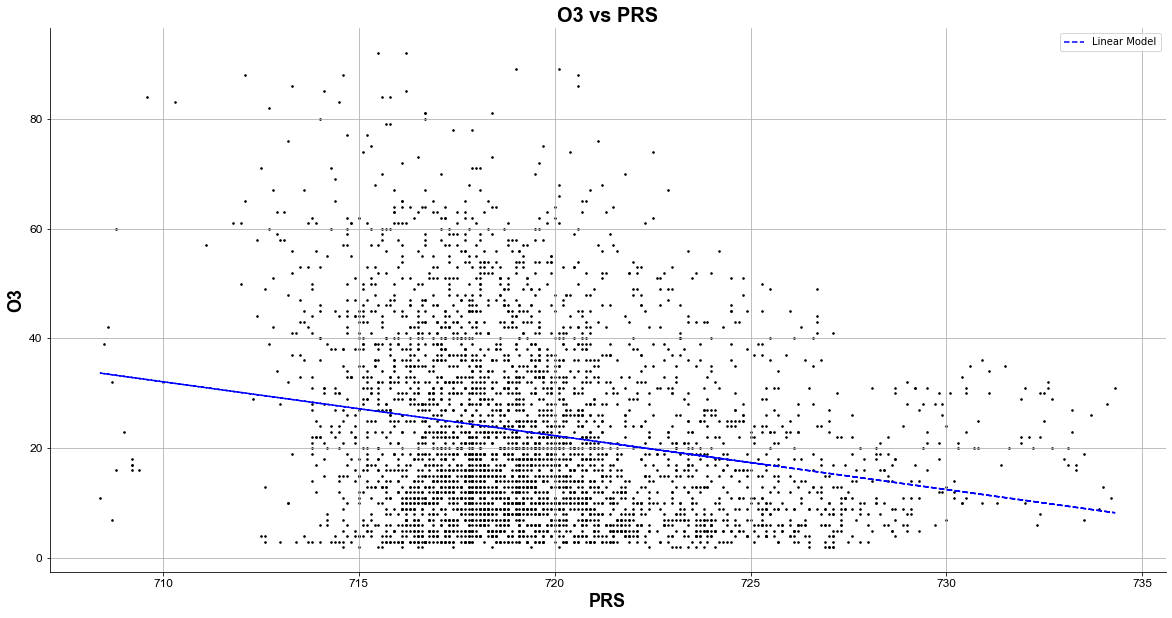

explained_variance:  0.0483
r2:  0.0483
MAE:  12.9606
MSE:  259.3697
RMSE:  16.105
explained_variance:  0.0009
r2:  0.0009
MAE:  13.2423
MSE:  272.2804
RMSE:  16.5009


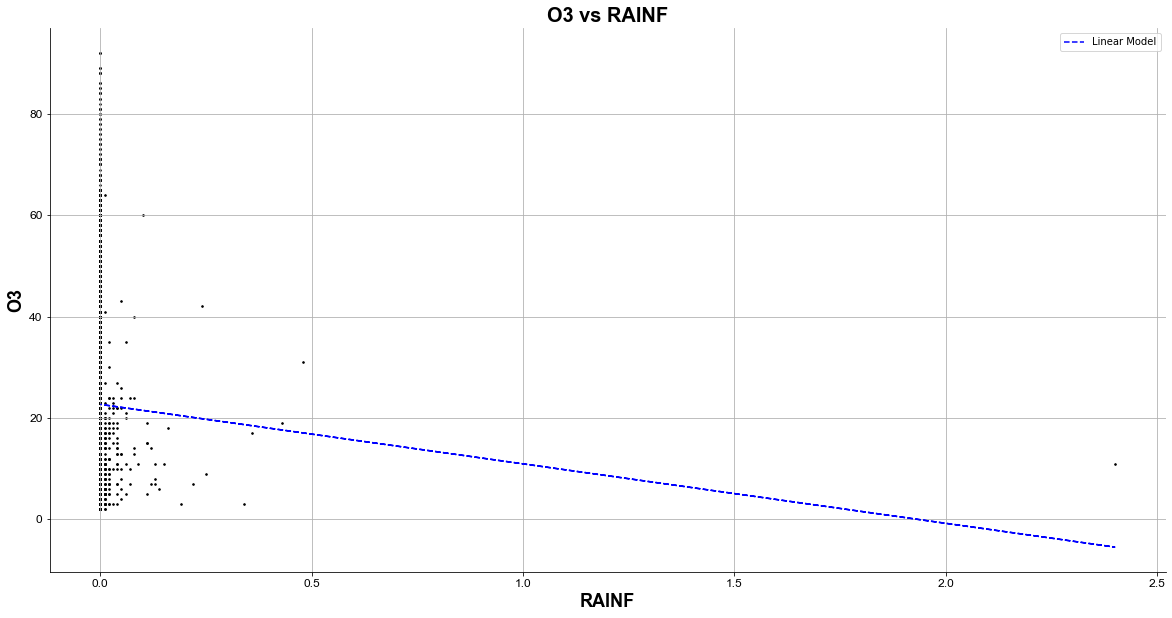

explained_variance:  0.0009
r2:  0.0009
MAE:  13.2423
MSE:  272.2804
RMSE:  16.5009
explained_variance:  0.4298
r2:  0.4298
MAE:  9.3624
MSE:  155.3966
RMSE:  12.4658


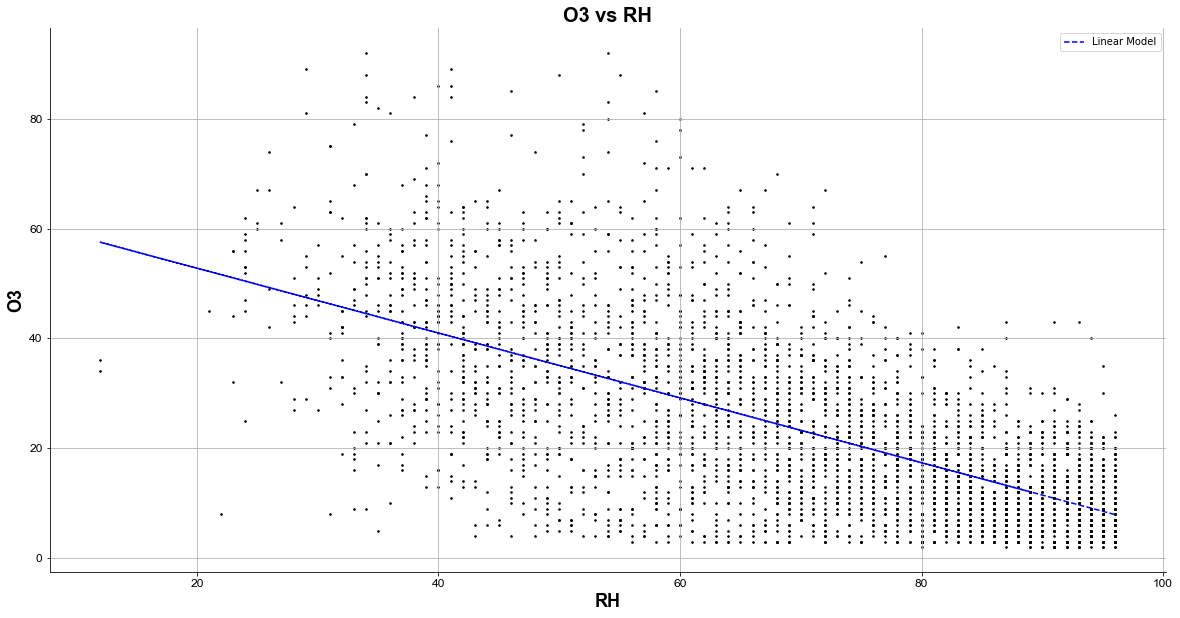

explained_variance:  0.4298
r2:  0.4298
MAE:  9.3624
MSE:  155.3966
RMSE:  12.4658
explained_variance:  0.4788
r2:  0.4788
MAE:  9.2337
MSE:  142.0518
RMSE:  11.9185


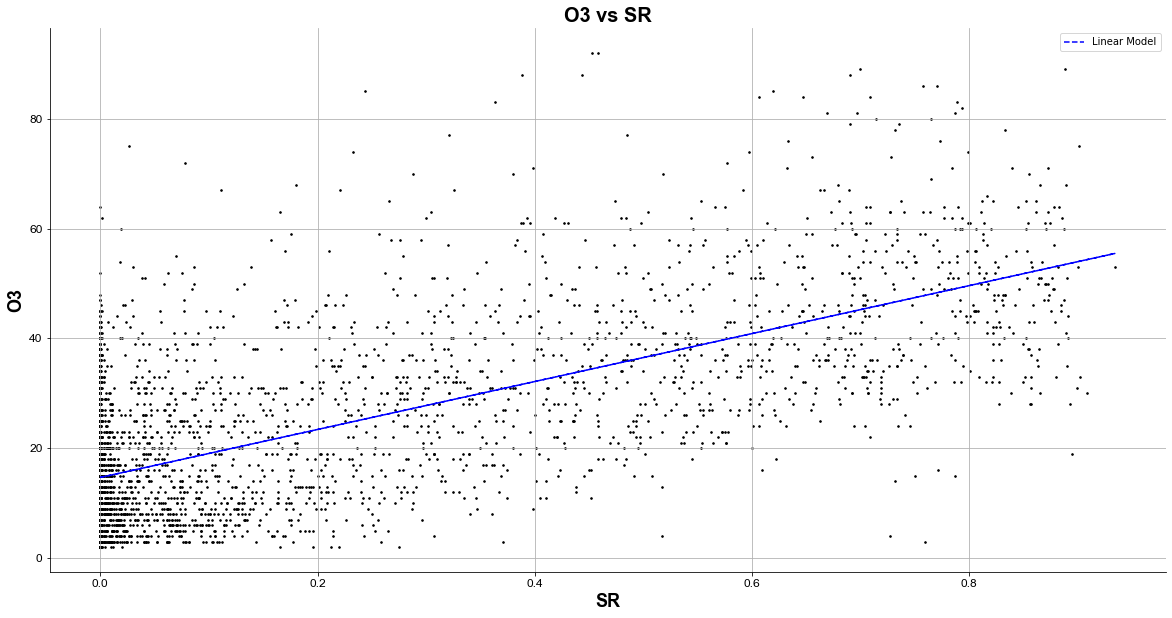

explained_variance:  0.4788
r2:  0.4788
MAE:  9.2337
MSE:  142.0518
RMSE:  11.9185
explained_variance:  0.2779
r2:  0.2779
MAE:  11.2832
MSE:  196.7947
RMSE:  14.0284


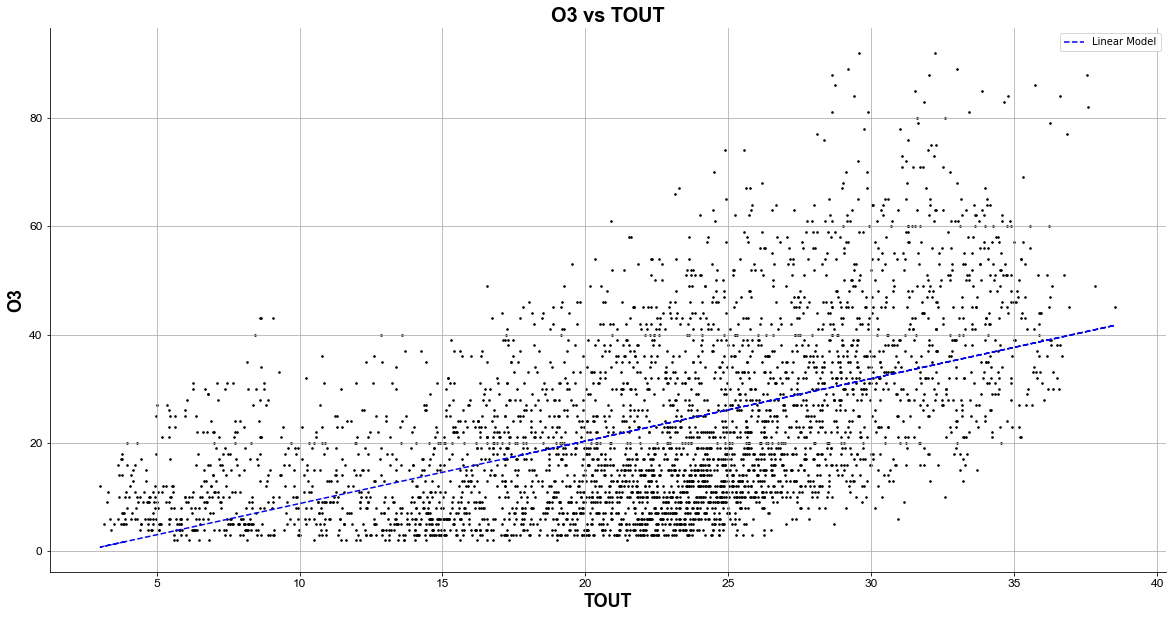

explained_variance:  0.2779
r2:  0.2779
MAE:  11.2832
MSE:  196.7947
RMSE:  14.0284
explained_variance:  0.2174
r2:  0.2174
MAE:  11.1855
MSE:  213.2824
RMSE:  14.6042


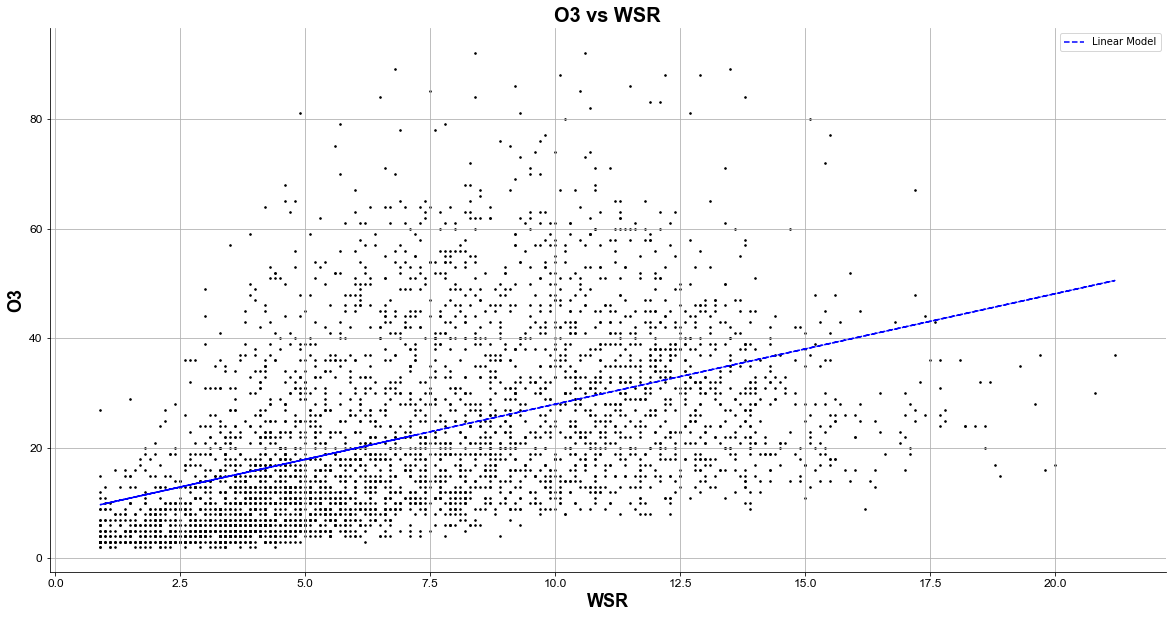

explained_variance:  0.2174
r2:  0.2174
MAE:  11.1855
MSE:  213.2824
RMSE:  14.6042
explained_variance:  0.0395
r2:  0.0395
MAE:  12.9517
MSE:  261.7575
RMSE:  16.1789


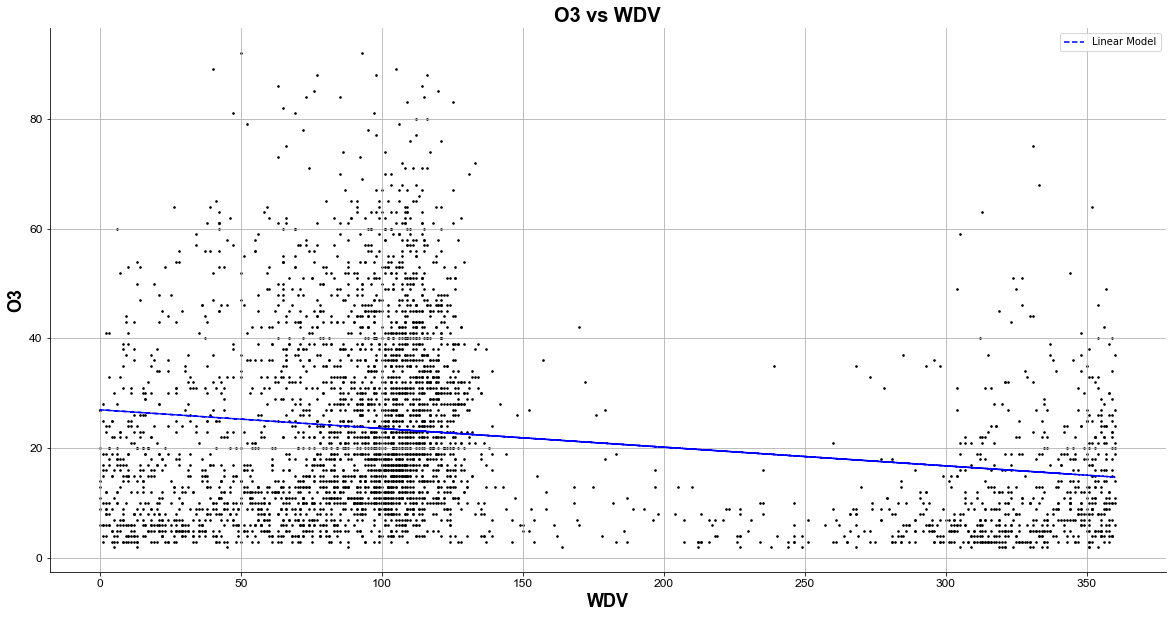

explained_variance:  0.0395
r2:  0.0395
MAE:  12.9517
MSE:  261.7575
RMSE:  16.1789


In [836]:
for i in range(0,len(regression_columnNames)):
    nombre = regression_columnNames[i]
    y = O3.values
    x = df[nombre].values

    # Reshape Values#
    x = x.reshape(-1,1)
    x.shape

    # Reshape Values#
    y = y.reshape(-1,1)
    y.shape

    #Linear model#
    lm = LinearRegression().fit(x,y)
    lmp = lm.predict(x)
    regression_results(y,lmp)

    ## Plots for O3 vs Hour# 
    plt.figure(figsize=(20,10))
    plt.scatter(x,y, marker=".", c = "k" , s = 10)
    plt.plot(x, lmp, 'b--')
    plt.title("O3 vs " + nombre ,**fontT)
    plt.xlabel(nombre,**fontL)
    plt.ylabel("O3",**fontL)
    plt.xticks(fontsize = 12 , family = "Arial")
    plt.yticks(fontsize = 12 , family = "Arial")
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.grid("On")
    plt.legend(['Linear Model'])
    plt.show()

    regression_results(y,lmp)


Polynomial Regression
--

O3 vs Hour
--

explained_variance:  0.0522
r2:  0.0522
MAE:  12.7226
MSE:  258.3135
RMSE:  16.0721
0.5005209891262465
explained_variance:  0.5005
r2:  0.5005
MAE:  8.7186
MSE:  136.122
RMSE:  11.6671


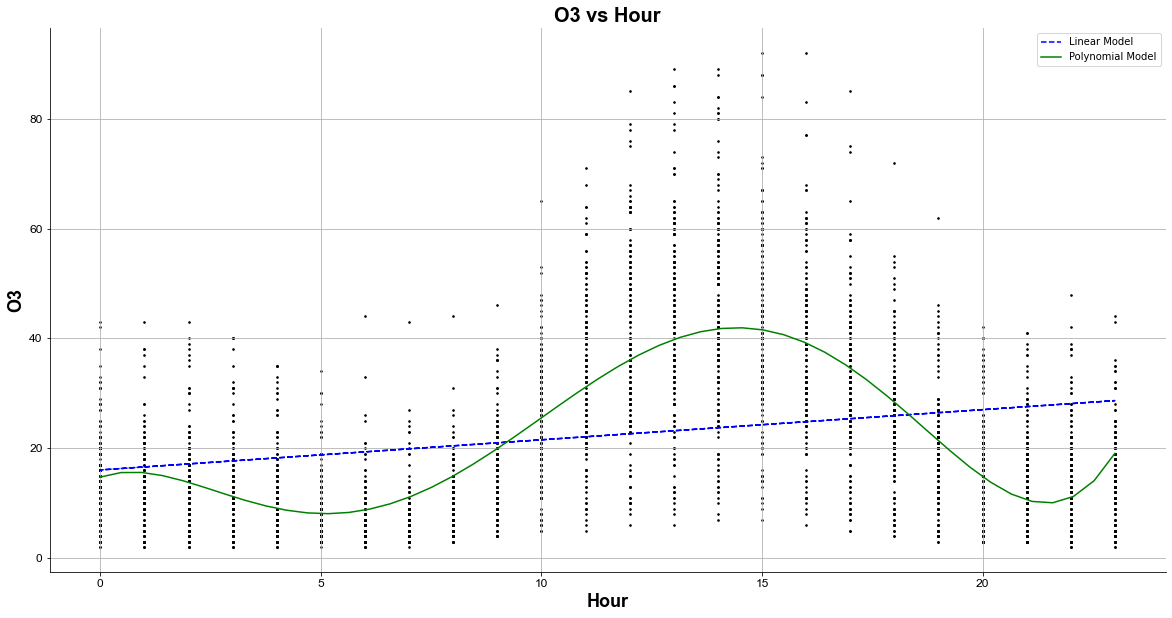

In [837]:
nombre = "Hour" 

deg = 5
y = O3.values
x = df[nombre].values

# Reshape Values#
x = x.reshape(-1,1)
x.shape

# Reshape Values#
y = y.reshape(-1,1)
y.shape

#Linear model#
lm = LinearRegression().fit(x,y)
lmp = lm.predict(x)
regression_results(y,lmp)

## Plots for O3 vs Hour#
plt.figure(figsize=(20,10))
plt.scatter(x,y, marker=".", c = "k" , s = 10)
plt.plot(x, lmp, 'b--')
y = O3
x = df[nombre] 

mymodel = np.poly1d(np.polyfit(x, y, deg))
print(r2_score(y, mymodel(x)))
predicted = mymodel(x)
myline = np.linspace(min(x),max(x))
plt.plot(myline, mymodel(myline),'g-')

plt.title("O3 vs " + nombre ,**fontT)
plt.xlabel(nombre,**fontL)
plt.ylabel("O3",**fontL)
plt.xticks(fontsize = 12 , family = "Arial")
plt.yticks(fontsize = 12 , family = "Arial")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid("On")
plt.legend(['Linear Model','Polynomial Model'])

regression_results(y,predicted)


O3 vs PRS
--

explained_variance:  0.0483
r2:  0.0483
MAE:  12.9606
MSE:  259.3697
RMSE:  16.105
0.07205411530220662
explained_variance:  0.0721
r2:  0.0721
MAE:  12.6928
MSE:  252.8912
RMSE:  15.9026


C:\Python39\lib\site-packages\IPython\core\interactiveshell.py:3441: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


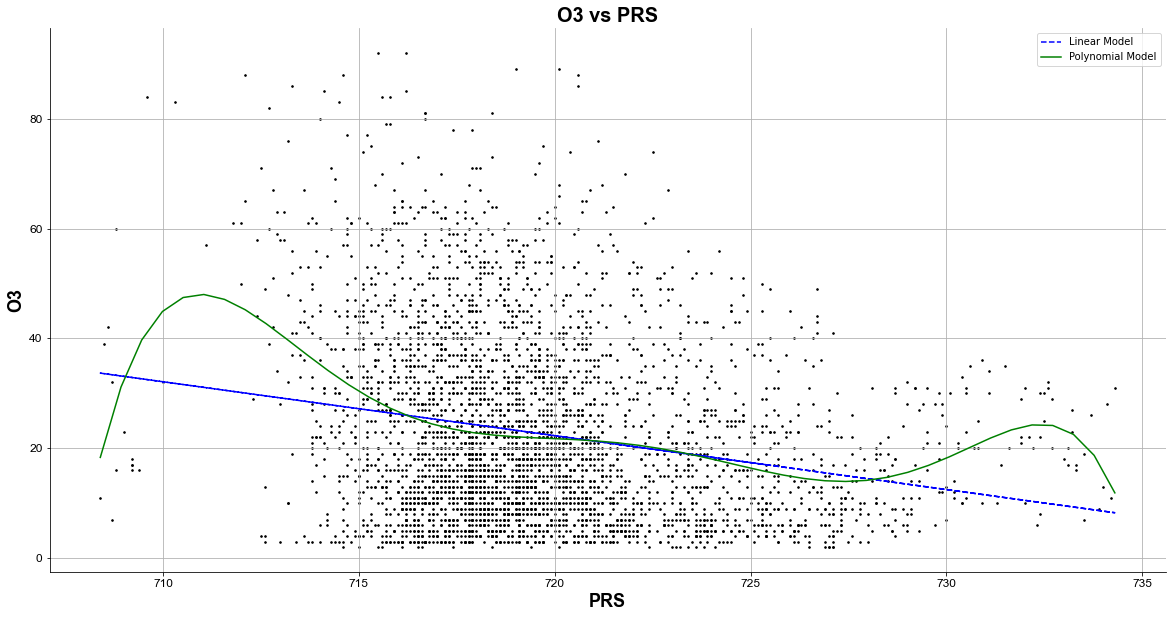

In [838]:
nombre = "PRS" 

deg = 20
y = O3.values
x = df[nombre].values



# Reshape Values#
x = x.reshape(-1,1)
x.shape

# Reshape Values#
y = y.reshape(-1,1)
y.shape

#Linear model#
lm = LinearRegression().fit(x,y)
lmp = lm.predict(x)
regression_results(y,lmp)

## Plots for O3 vs Hour#
plt.figure(figsize=(20,10))
plt.scatter(x,y, marker=".", c = "k" , s = 10)
plt.plot(x, lmp, 'b--')
y = O3
x = df[nombre] 

mymodel = np.poly1d(np.polyfit(x, y, deg))
print(r2_score(y, mymodel(x)))
predicted = mymodel(x)
myline = np.linspace(min(x),max(x))
plt.plot(myline, mymodel(myline),'g-')

plt.title("O3 vs " + nombre ,**fontT)
plt.xlabel(nombre,**fontL)
plt.ylabel("O3",**fontL)
plt.xticks(fontsize = 12 , family = "Arial")
plt.yticks(fontsize = 12 , family = "Arial")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid("On")
plt.legend(['Linear Model','Polynomial Model'])

regression_results(y,predicted)


O3 vs RAINF
--

explained_variance:  0.0009
r2:  0.0009
MAE:  13.2423
MSE:  272.2804
RMSE:  16.5009
0.0009085669235929794
explained_variance:  0.0009
r2:  0.0009
MAE:  13.2423
MSE:  272.2804
RMSE:  16.5009


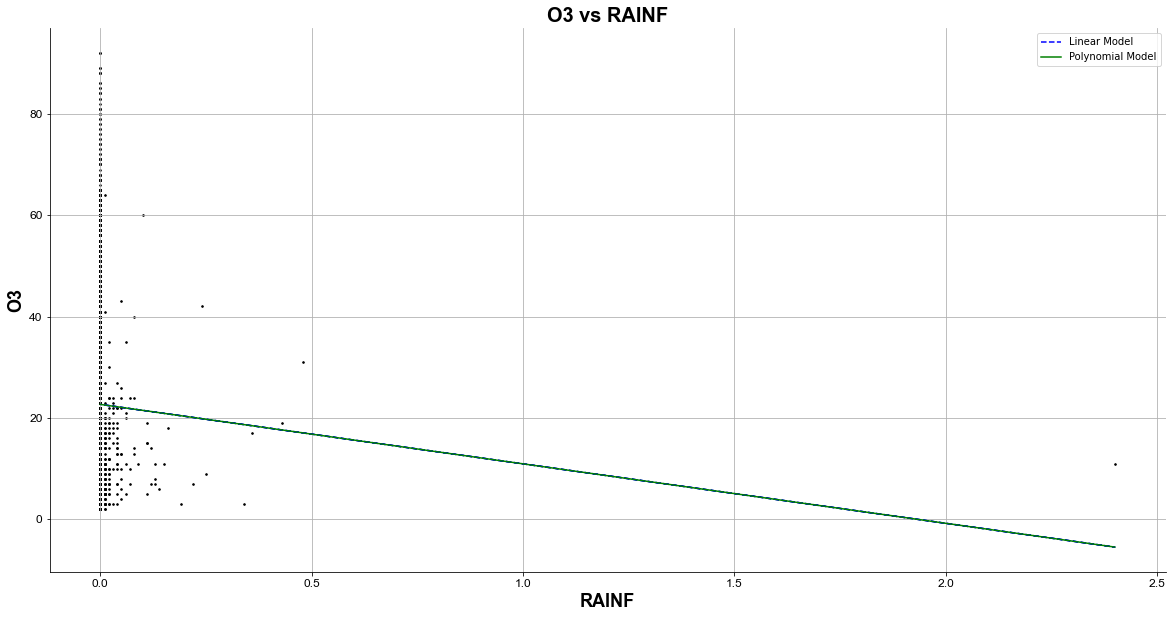

In [839]:
nombre = "RAINF" 

deg = 1
y = O3.values
x = df[nombre].values



# Reshape Values#
x = x.reshape(-1,1)
x.shape

# Reshape Values#
y = y.reshape(-1,1)
y.shape

#Linear model#
lm = LinearRegression().fit(x,y)
lmp = lm.predict(x)
regression_results(y,lmp)

## Plots for O3 vs Hour#
plt.figure(figsize=(20,10))
plt.scatter(x,y, marker=".", c = "k" , s = 10)
plt.plot(x, lmp, 'b--')
y = O3
x = df[nombre] 

mymodel = np.poly1d(np.polyfit(x, y, deg))
print(r2_score(y, mymodel(x)))
predicted = mymodel(x)
myline = np.linspace(min(x),max(x))
plt.plot(myline, mymodel(myline),'g-')

plt.title("O3 vs " + nombre ,**fontT)
plt.xlabel(nombre,**fontL)
plt.ylabel("O3",**fontL)
plt.xticks(fontsize = 12 , family = "Arial")
plt.yticks(fontsize = 12 , family = "Arial")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid("On")
plt.legend(['Linear Model','Polynomial Model'])

regression_results(y,predicted)


O3 vs RH
--

explained_variance:  0.4298
r2:  0.4298
MAE:  9.3624
MSE:  155.3966
RMSE:  12.4658
0.43466429562493647
explained_variance:  0.4347
r2:  0.4347
MAE:  9.2991
MSE:  154.0698
RMSE:  12.4125


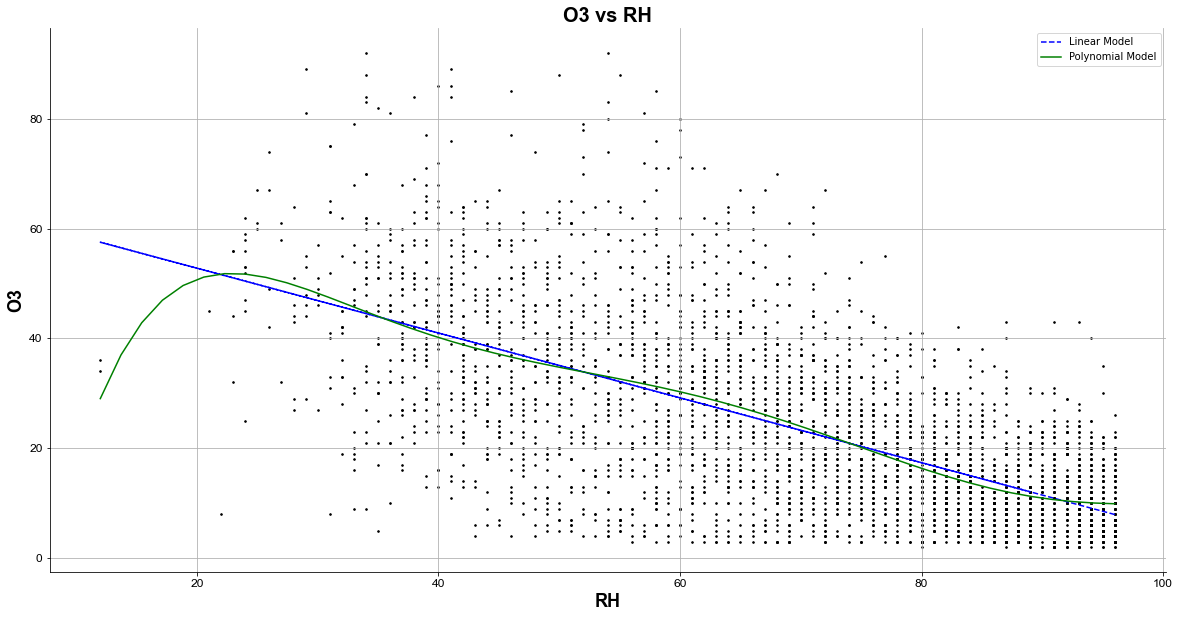

In [840]:
nombre = "RH" 

deg = 6
y = O3.values
x = df[nombre].values



# Reshape Values#
x = x.reshape(-1,1)
x.shape

# Reshape Values#
y = y.reshape(-1,1)
y.shape

#Linear model#
lm = LinearRegression().fit(x,y)
lmp = lm.predict(x)
regression_results(y,lmp)

## Plots for O3 vs Hour#
plt.figure(figsize=(20,10))
plt.scatter(x,y, marker=".", c = "k" , s = 10)
plt.plot(x, lmp, 'b--')
y = O3
x = df[nombre] 

mymodel = np.poly1d(np.polyfit(x, y, deg))
print(r2_score(y, mymodel(x)))
predicted = mymodel(x)
myline = np.linspace(min(x),max(x))
plt.plot(myline, mymodel(myline),'g-')

plt.title("O3 vs " + nombre ,**fontT)
plt.xlabel(nombre,**fontL)
plt.ylabel("O3",**fontL)
plt.xticks(fontsize = 12 , family = "Arial")
plt.yticks(fontsize = 12 , family = "Arial")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid("On")
plt.legend(['Linear Model','Polynomial Model'])

regression_results(y,predicted)


O3 vs SR
--

explained_variance:  0.4788
r2:  0.4788
MAE:  9.2337
MSE:  142.0518
RMSE:  11.9185
0.4800531633289926
explained_variance:  0.4801
r2:  0.4801
MAE:  9.2194
MSE:  141.7001
RMSE:  11.9038


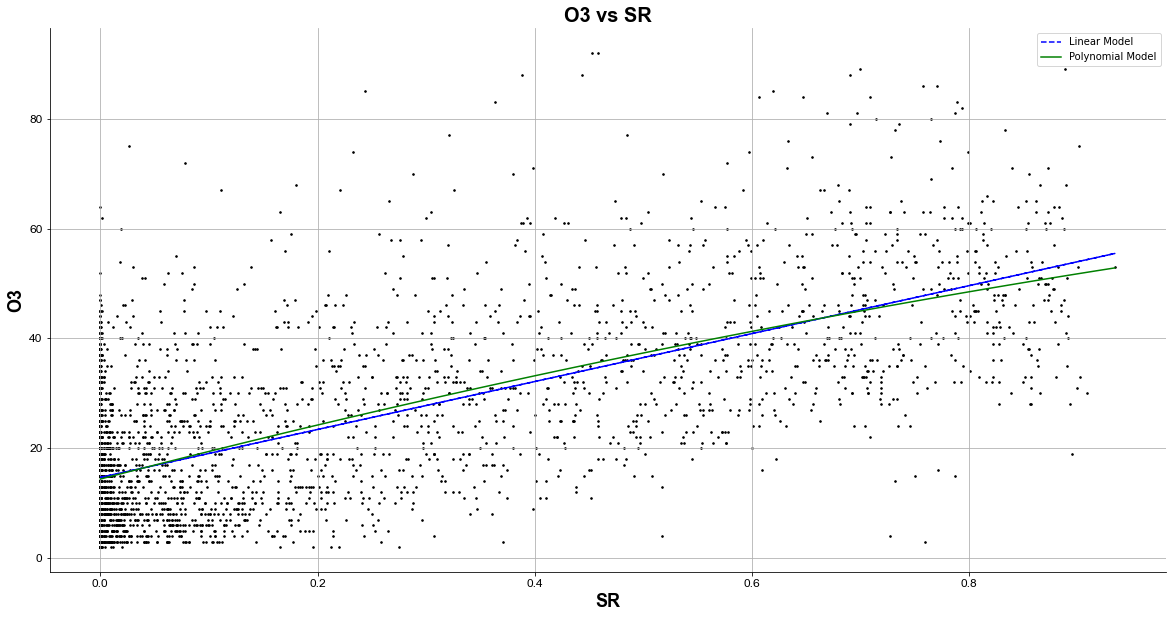

In [841]:
nombre = "SR" 

deg = 2
y = O3.values
x = df[nombre].values



# Reshape Values#
x = x.reshape(-1,1)
x.shape

# Reshape Values#
y = y.reshape(-1,1)
y.shape

#Linear model#
lm = LinearRegression().fit(x,y)
lmp = lm.predict(x)
regression_results(y,lmp)

## Plots for O3 vs Hour#
plt.figure(figsize=(20,10))
plt.scatter(x,y, marker=".", c = "k" , s = 10)
plt.plot(x, lmp, 'b--')
y = O3
x = df[nombre] 

mymodel = np.poly1d(np.polyfit(x, y, deg))
print(r2_score(y, mymodel(x)))
predicted = mymodel(x)
myline = np.linspace(min(x),max(x))
plt.plot(myline, mymodel(myline),'g-')

plt.title("O3 vs " + nombre ,**fontT)
plt.xlabel(nombre,**fontL)
plt.ylabel("O3",**fontL)
plt.xticks(fontsize = 12 , family = "Arial")
plt.yticks(fontsize = 12 , family = "Arial")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid("On")
plt.legend(['Linear Model','Polynomial Model'])

regression_results(y,predicted)

O3 vs TOUT
--

explained_variance:  0.2779
r2:  0.2779
MAE:  11.2832
MSE:  196.7947
RMSE:  14.0284
0.3370828596710743
explained_variance:  0.3371
r2:  0.3371
MAE:  10.676
MSE:  180.6635
RMSE:  13.4411


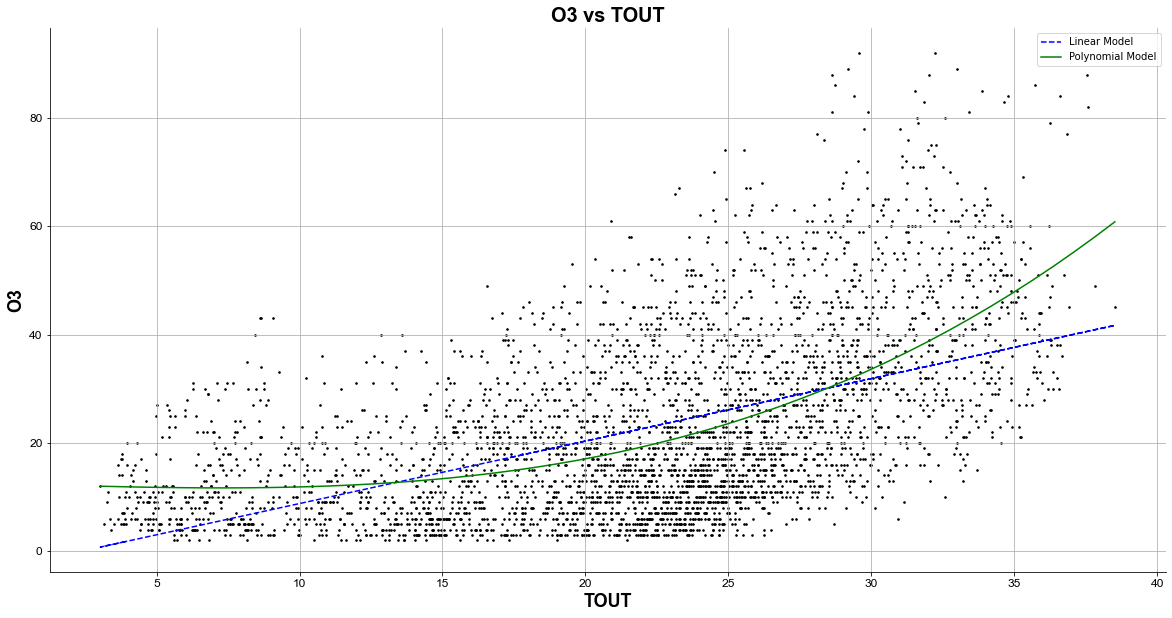

In [842]:
nombre = "TOUT" 

deg = 3
y = O3.values
x = df[nombre].values

# Reshape Values#
x = x.reshape(-1,1)
x.shape

# Reshape Values#
y = y.reshape(-1,1)
y.shape

#Linear model#
lm = LinearRegression().fit(x,y)
lmp = lm.predict(x)
regression_results(y,lmp)

## Plots for O3 vs Hour#
plt.figure(figsize=(20,10))
plt.scatter(x,y, marker=".", c = "k" , s = 10)
plt.plot(x, lmp, 'b--')
y = O3
x = df[nombre] 

mymodel = np.poly1d(np.polyfit(x, y, deg))
print(r2_score(y, mymodel(x)))
predicted = mymodel(x)
myline = np.linspace(min(x),max(x))
plt.plot(myline, mymodel(myline),'g-')

plt.title("O3 vs " + nombre ,**fontT)
plt.xlabel(nombre,**fontL)
plt.ylabel("O3",**fontL)
plt.xticks(fontsize = 12 , family = "Arial")
plt.yticks(fontsize = 12 , family = "Arial")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid("On")
plt.legend(['Linear Model','Polynomial Model'])

regression_results(y,predicted)

O3 vs WSR
--

explained_variance:  0.2174
r2:  0.2174
MAE:  11.1855
MSE:  213.2824
RMSE:  14.6042
0.2708880021393766
explained_variance:  0.2709
r2:  0.2709
MAE:  10.7847
MSE:  198.7034
RMSE:  14.0962


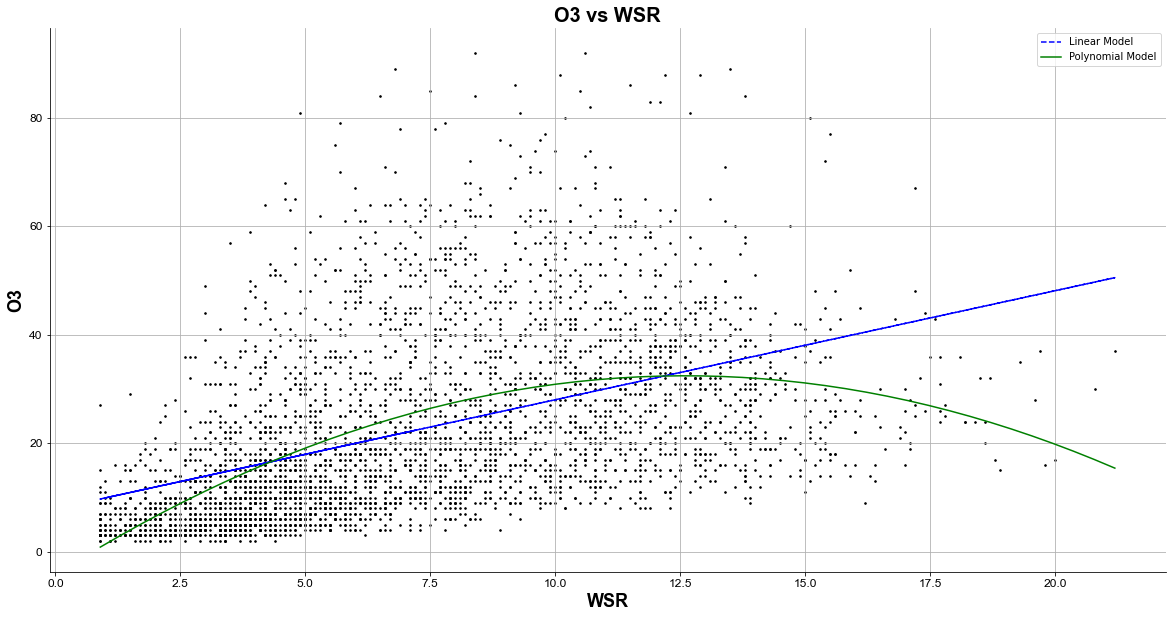

In [843]:
nombre = "WSR" 

deg = 2
y = O3.values
x = df[nombre].values

# Reshape Values#
x = x.reshape(-1,1)
x.shape

# Reshape Values#
y = y.reshape(-1,1)
y.shape

#Linear model#
lm = LinearRegression().fit(x,y)
lmp = lm.predict(x)
regression_results(y,lmp)

## Plots for O3 vs Hour#
plt.figure(figsize=(20,10))
plt.scatter(x,y, marker=".", c = "k" , s = 10)
plt.plot(x, lmp, 'b--')
y = O3
x = df[nombre] 

mymodel = np.poly1d(np.polyfit(x, y, deg))
print(r2_score(y, mymodel(x)))
predicted = mymodel(x)
myline = np.linspace(min(x),max(x))
plt.plot(myline, mymodel(myline),'g-')

plt.title("O3 vs " + nombre ,**fontT)
plt.xlabel(nombre,**fontL)
plt.ylabel("O3",**fontL)
plt.xticks(fontsize = 12 , family = "Arial")
plt.yticks(fontsize = 12 , family = "Arial")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid("On")
plt.legend(['Linear Model','Polynomial Model'])

regression_results(y,predicted)

O3 vs WSR
--

explained_variance:  0.0395
r2:  0.0395
MAE:  12.9517
MSE:  261.7575
RMSE:  16.1789
0.1342854005706544
explained_variance:  0.1343
r2:  0.1343
MAE:  12.0688
MSE:  235.9315
RMSE:  15.3601


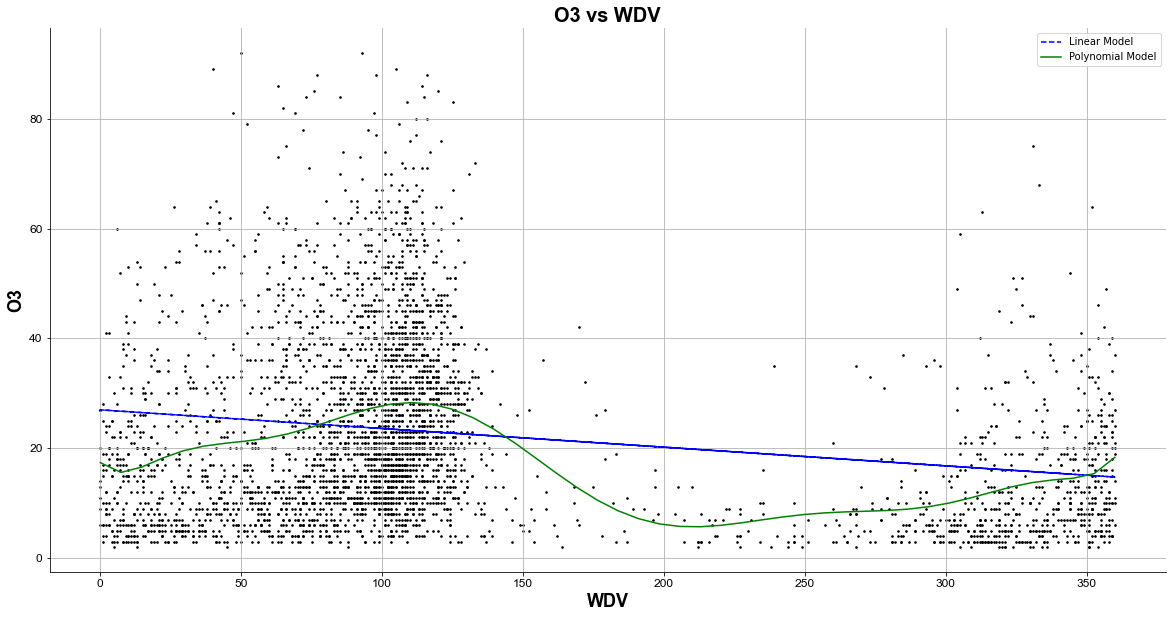

In [844]:
nombre = "WDV" 

deg = 10
y = O3.values
x = df[nombre].values

# Reshape Values#
x = x.reshape(-1,1)
x.shape

# Reshape Values#
y = y.reshape(-1,1)
y.shape

#Linear model#
lm = LinearRegression().fit(x,y)
lmp = lm.predict(x)
regression_results(y,lmp)

## Plots for O3 vs Hour#
plt.figure(figsize=(20,10))
plt.scatter(x,y, marker=".", c = "k" , s = 10)
plt.plot(x, lmp, 'b--')
y = O3
x = df[nombre] 

mymodel = np.poly1d(np.polyfit(x, y, deg))
print(r2_score(y, mymodel(x)))
predicted = mymodel(x)
myline = np.linspace(min(x),max(x))
plt.plot(myline, mymodel(myline),'g-')

plt.title("O3 vs " + nombre ,**fontT)
plt.xlabel(nombre,**fontL)
plt.ylabel("O3",**fontL)
plt.xticks(fontsize = 12 , family = "Arial")
plt.yticks(fontsize = 12 , family = "Arial")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid("On")
plt.legend(['Linear Model','Polynomial Model'])

regression_results(y,predicted)

PM 2.5
--

explained_variance:  0.0003
r2:  0.0003
MAE:  12.8635
MSE:  283.7502
RMSE:  16.8449


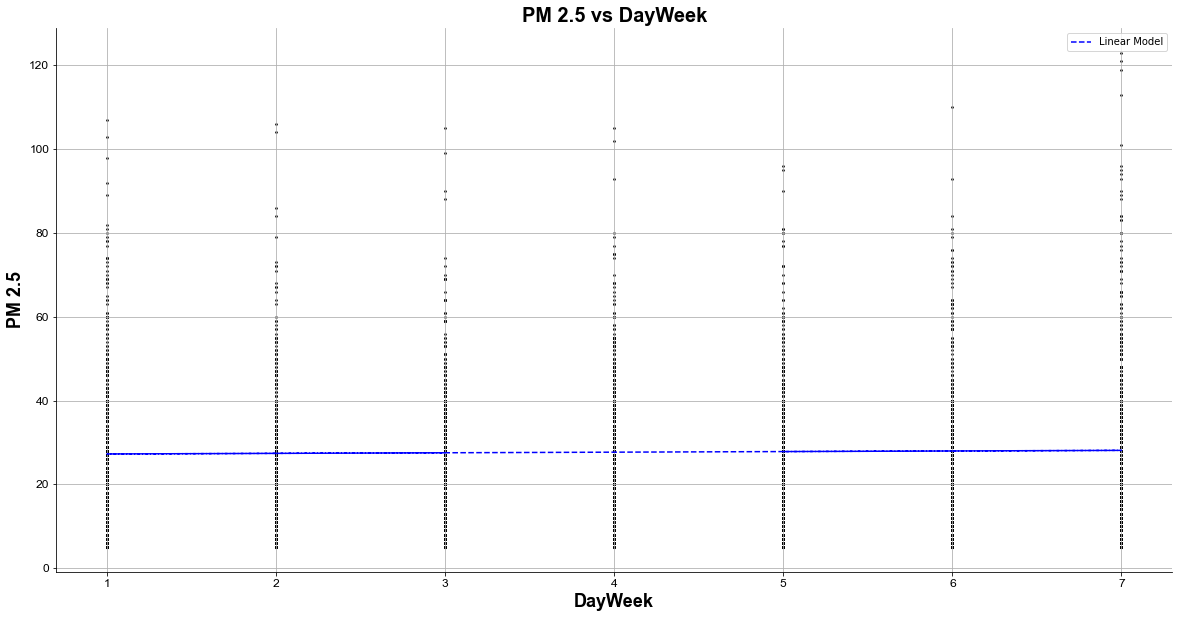

explained_variance:  0.0003
r2:  0.0003
MAE:  12.8635
MSE:  283.7502
RMSE:  16.8449
explained_variance:  0.0096
r2:  0.0096
MAE:  12.8232
MSE:  281.1104
RMSE:  16.7663


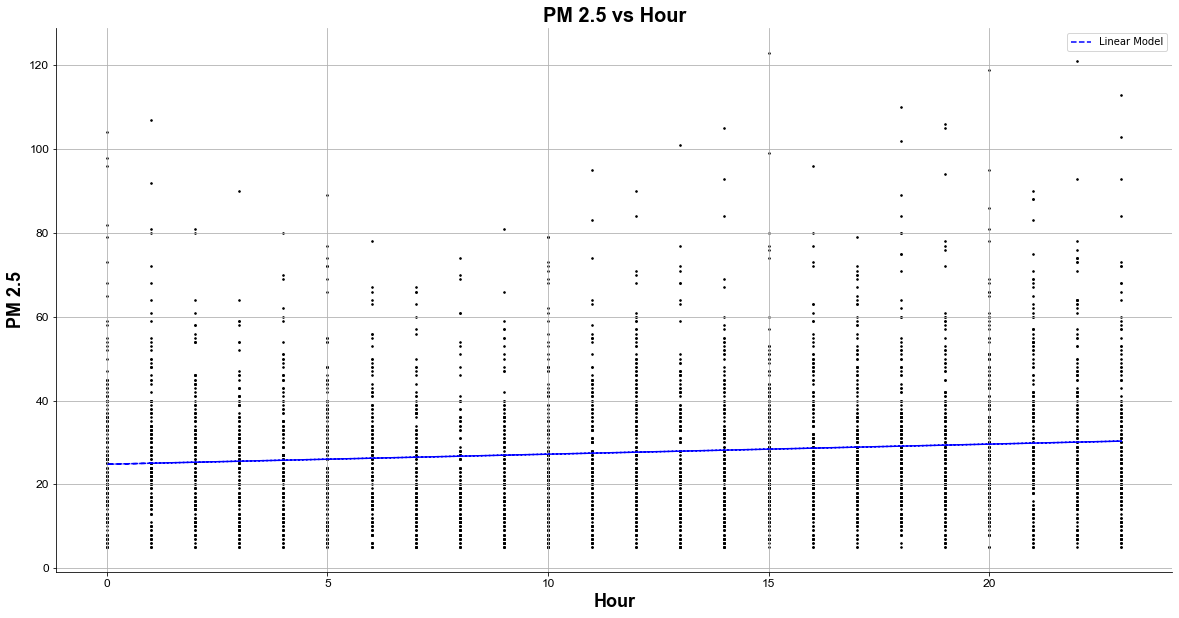

explained_variance:  0.0096
r2:  0.0096
MAE:  12.8232
MSE:  281.1104
RMSE:  16.7663
explained_variance:  0.0317
r2:  0.0317
MAE:  12.5394
MSE:  274.834
RMSE:  16.5781


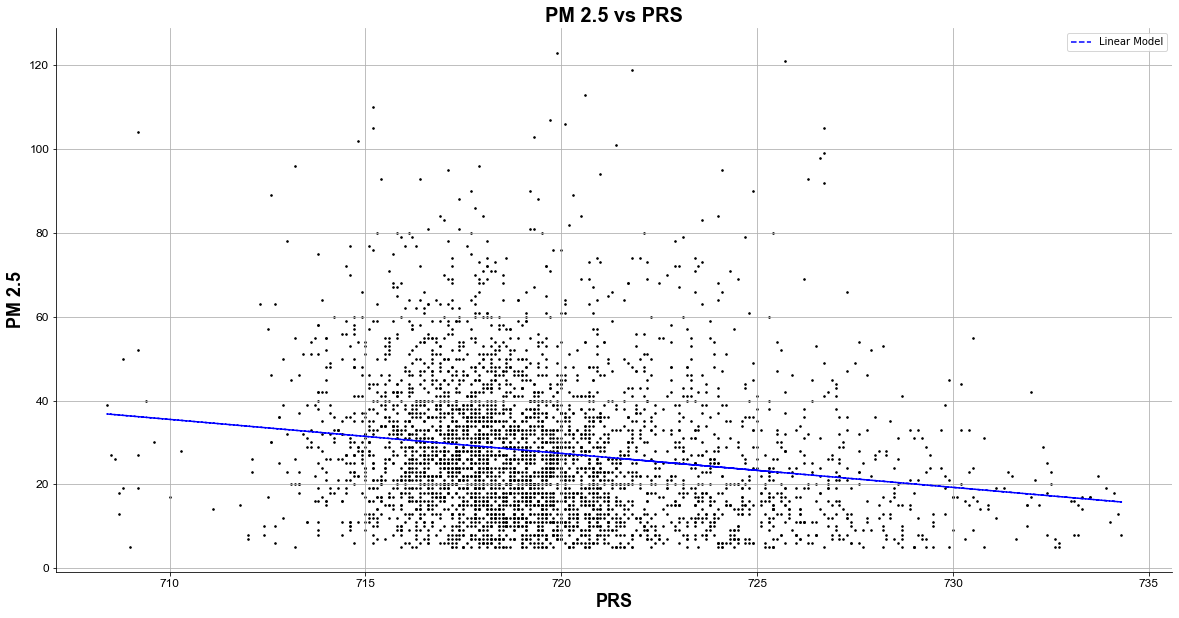

explained_variance:  0.0317
r2:  0.0317
MAE:  12.5394
MSE:  274.834
RMSE:  16.5781
explained_variance:  0.0009
r2:  0.0009
MAE:  12.8564
MSE:  283.5616
RMSE:  16.8393


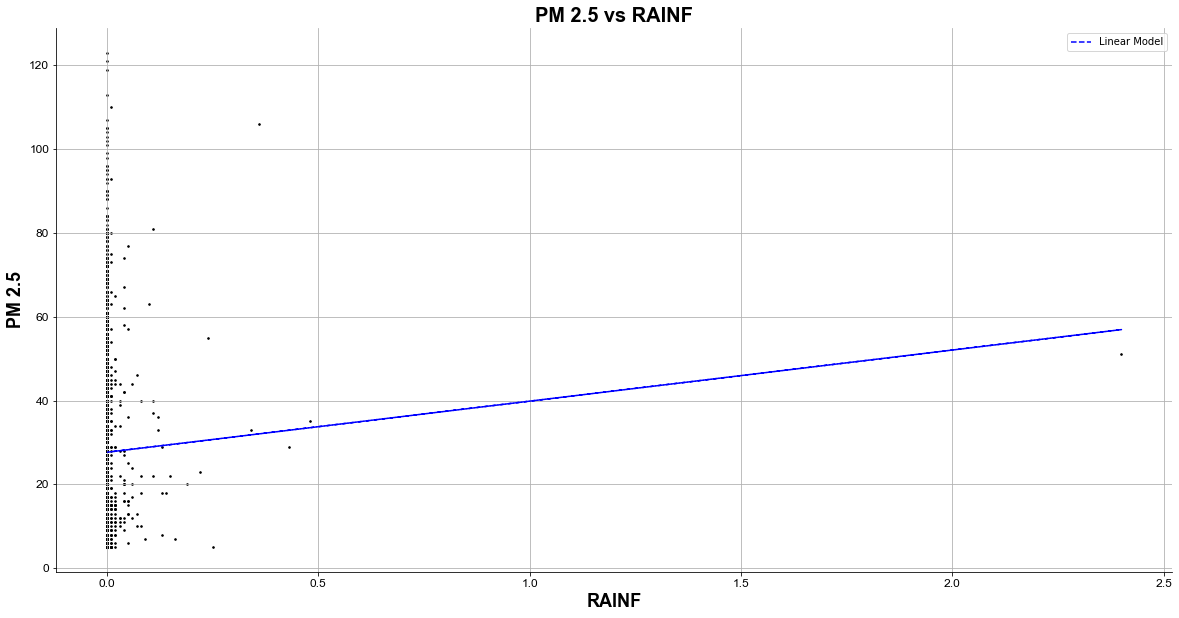

explained_variance:  0.0009
r2:  0.0009
MAE:  12.8564
MSE:  283.5616
RMSE:  16.8393
explained_variance:  0.0013
r2:  0.0013
MAE:  12.8484
MSE:  283.4589
RMSE:  16.8362


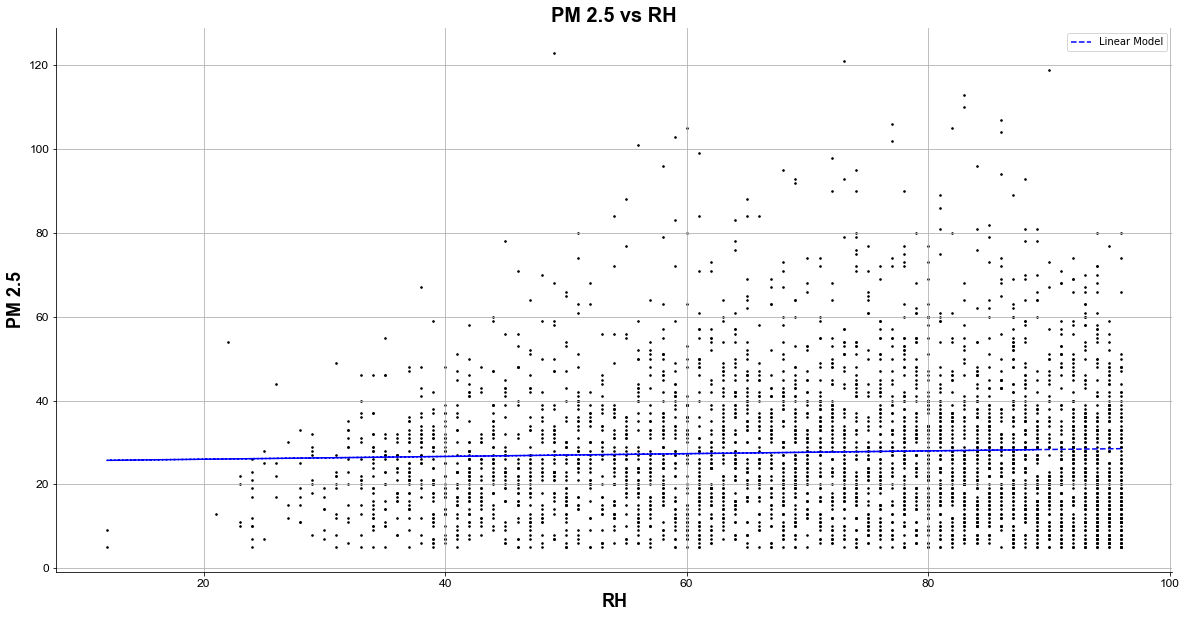

explained_variance:  0.0013
r2:  0.0013
MAE:  12.8484
MSE:  283.4589
RMSE:  16.8362
explained_variance:  0.0014
r2:  0.0014
MAE:  12.851
MSE:  283.4349
RMSE:  16.8355


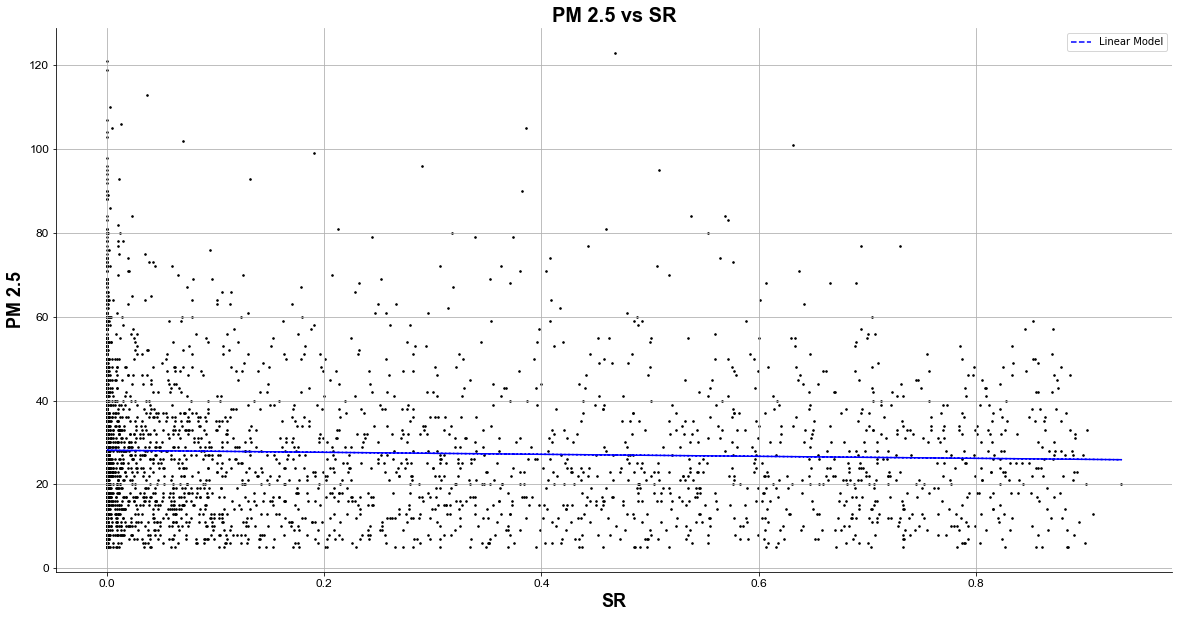

explained_variance:  0.0014
r2:  0.0014
MAE:  12.851
MSE:  283.4349
RMSE:  16.8355
explained_variance:  0.007
r2:  0.007
MAE:  12.7767
MSE:  281.8413
RMSE:  16.7881


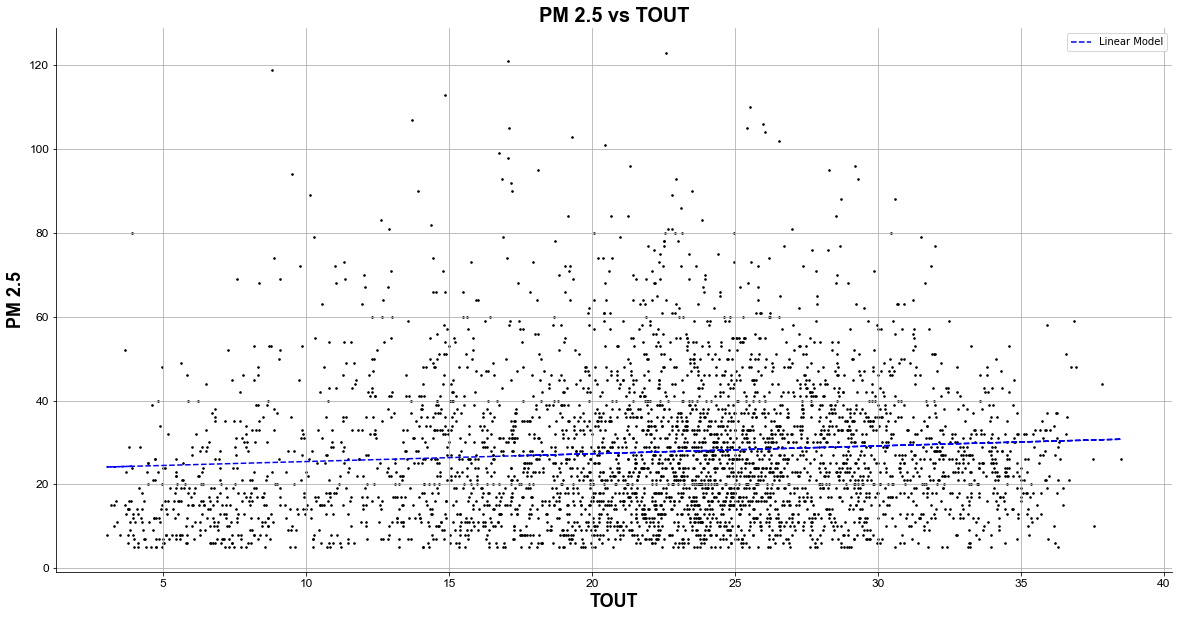

explained_variance:  0.007
r2:  0.007
MAE:  12.7767
MSE:  281.8413
RMSE:  16.7881
explained_variance:  0.0051
r2:  0.0051
MAE:  12.8504
MSE:  282.3919
RMSE:  16.8045


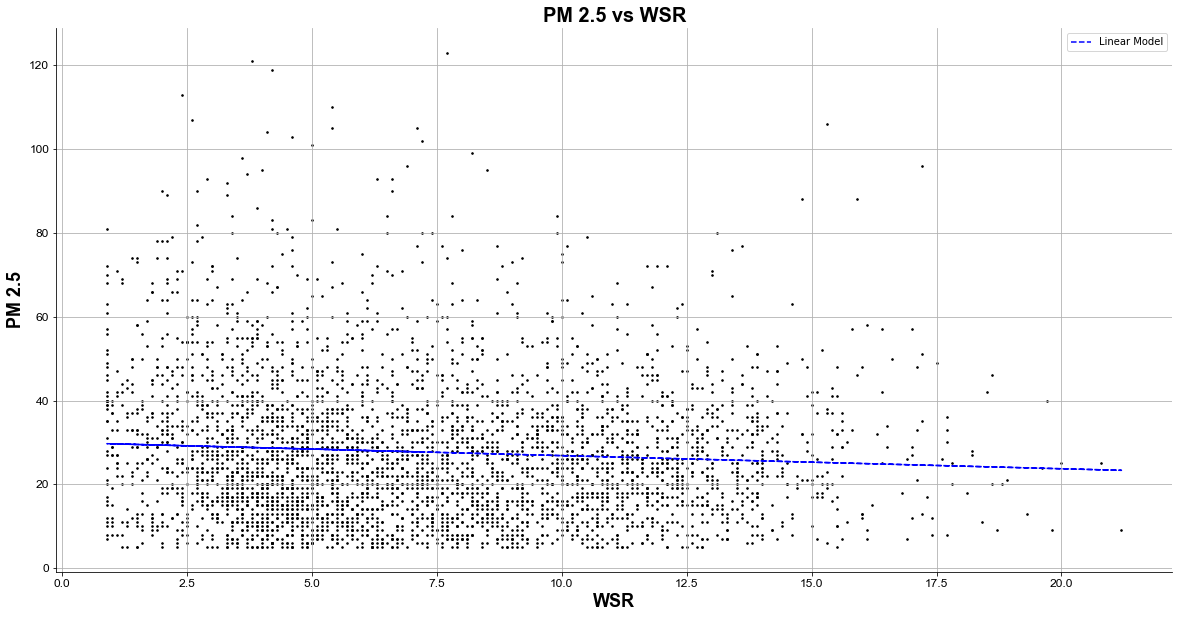

explained_variance:  0.0051
r2:  0.0051
MAE:  12.8504
MSE:  282.3919
RMSE:  16.8045
explained_variance:  0.001
r2:  0.001
MAE:  12.8522
MSE:  283.5324
RMSE:  16.8384


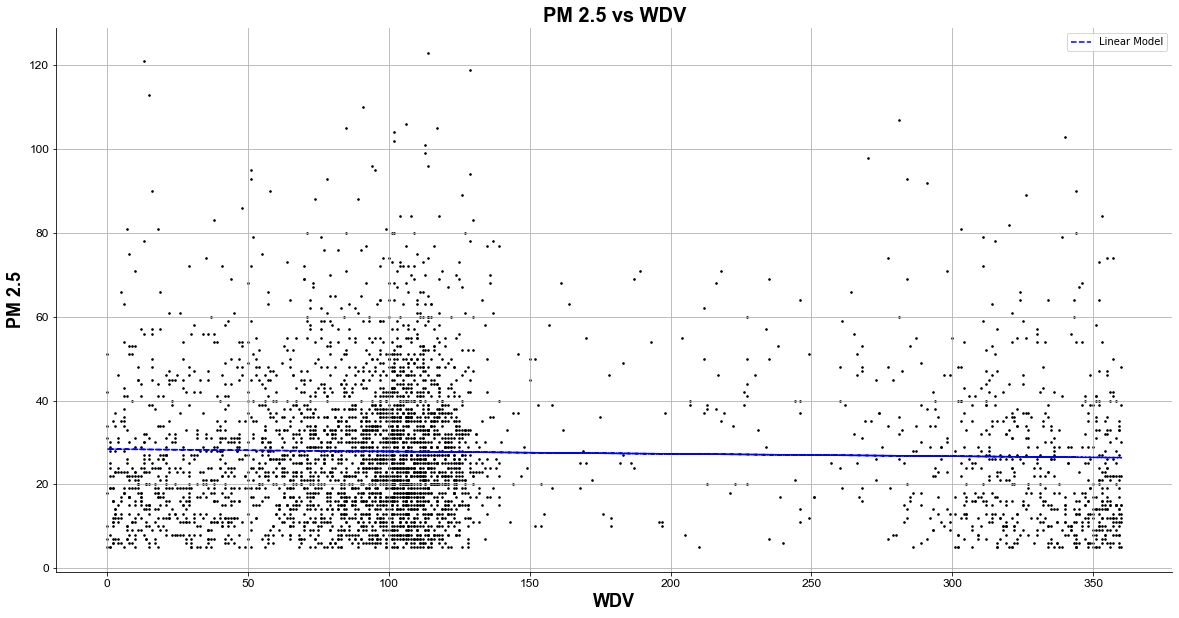

explained_variance:  0.001
r2:  0.001
MAE:  12.8522
MSE:  283.5324
RMSE:  16.8384


In [845]:
for i in range(0,len(regression_columnNames)):
    nombre = regression_columnNames[i]
    y = PM_25.values
    x = df[nombre].values

    # Reshape Values#
    x = x.reshape(-1,1)
    x.shape

    # Reshape Values#
    y = y.reshape(-1,1)
    y.shape

    #Linear model#
    lm = LinearRegression().fit(x,y)
    lmp = lm.predict(x)
    regression_results(y,lmp)

    ## Plots for O3 vs Hour"
    plt.figure(figsize=(20,10))
    plt.scatter(x,y, marker=".", c = "k" , s = 10)
    plt.plot(x, lmp, 'b--')
    plt.title("PM 2.5 vs " + nombre ,**fontT)
    plt.xlabel(nombre,**fontL)
    plt.ylabel("PM 2.5",**fontL)
    plt.xticks(fontsize = 12 , family = "Arial")
    plt.yticks(fontsize = 12 , family = "Arial")
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.grid("On")
    plt.legend(['Linear Model'])
    plt.show()

    regression_results(y,lmp)

PM 2.5  vs Hour
--

explained_variance:  0.0096
r2:  0.0096
MAE:  12.8232
MSE:  281.1104
RMSE:  16.7663
0.019180298052115963
explained_variance:  0.0192
r2:  0.0192
MAE:  12.7589
MSE:  278.3859
RMSE:  16.6849


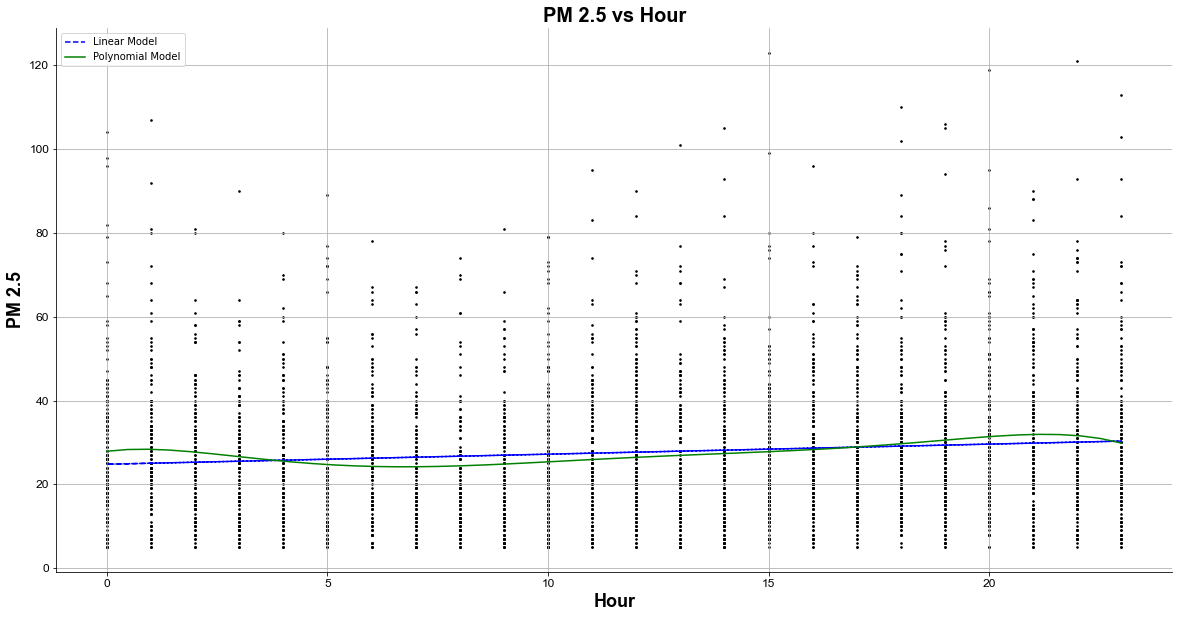

In [846]:
nombre = "Hour" 

deg = 6
y = PM_25.values
x = df[nombre].values

# Reshape Values#
x = x.reshape(-1,1)
x.shape

# Reshape Values#
y = y.reshape(-1,1)
y.shape

#Linear model#
lm = LinearRegression().fit(x,y)
lmp = lm.predict(x)
regression_results(y,lmp)

## Plots for PM_25 vs Hour#
plt.figure(figsize=(20,10))
plt.scatter(x,y, marker=".", c = "k" , s = 10)
plt.plot(x, lmp, 'b--')
y = PM_25
x = df[nombre] 

mymodel = np.poly1d(np.polyfit(x, y, deg))
print(r2_score(y, mymodel(x)))
predicted = mymodel(x)
myline = np.linspace(min(x),max(x))
plt.plot(myline, mymodel(myline),'g-')

plt.title("PM 2.5 vs " + nombre ,**fontT)
plt.xlabel(nombre,**fontL)
plt.ylabel("PM 2.5",**fontL)
plt.xticks(fontsize = 12 , family = "Arial")
plt.yticks(fontsize = 12 , family = "Arial")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid("On")
plt.legend(['Linear Model','Polynomial Model'])

regression_results(y,predicted)


PM 2.5  vs PRS
--

explained_variance:  0.0317
r2:  0.0317
MAE:  12.5394
MSE:  274.834
RMSE:  16.5781
0.034641081600879975
explained_variance:  0.0346
r2:  0.0346
MAE:  12.53
MSE:  273.9977
RMSE:  16.5529


C:\Python39\lib\site-packages\IPython\core\interactiveshell.py:3441: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


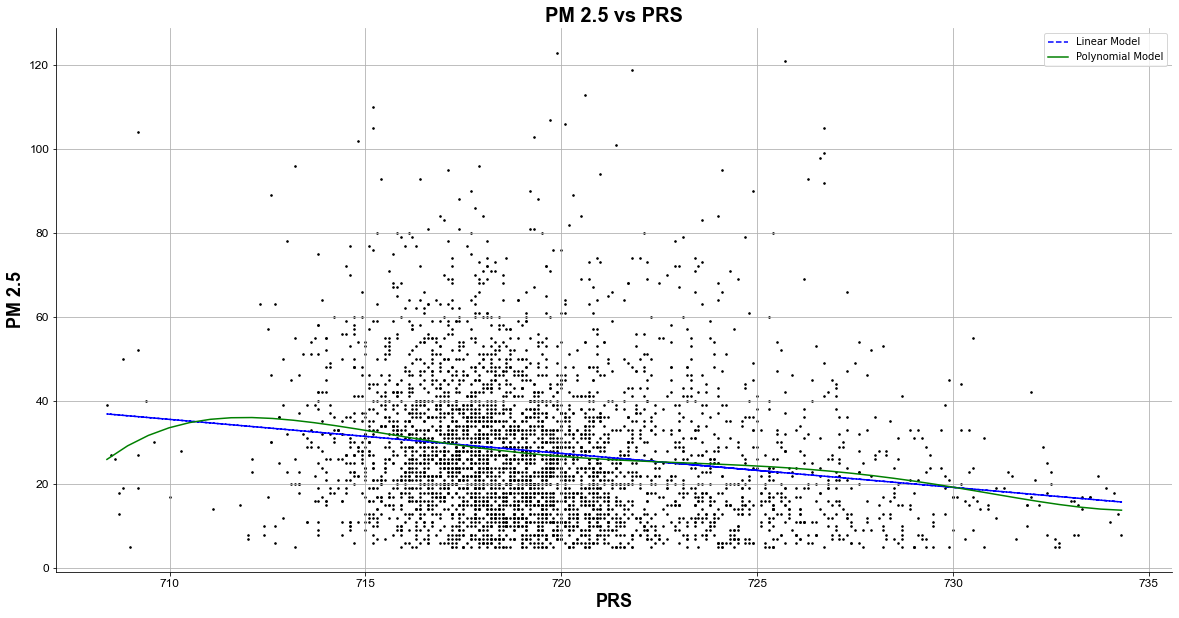

In [847]:
nombre = "PRS" 

deg = 6
y = PM_25.values
x = df[nombre].values

# Reshape Values#
x = x.reshape(-1,1)
x.shape

# Reshape Values#
y = y.reshape(-1,1)
y.shape

#Linear model#
lm = LinearRegression().fit(x,y)
lmp = lm.predict(x)
regression_results(y,lmp)

## Plots for PM_25 vs Hour#
plt.figure(figsize=(20,10))
plt.scatter(x,y, marker=".", c = "k" , s = 10)
plt.plot(x, lmp, 'b--')
y = PM_25
x = df[nombre] 

mymodel = np.poly1d(np.polyfit(x, y, deg))
print(r2_score(y, mymodel(x)))
predicted = mymodel(x)
myline = np.linspace(min(x),max(x))
plt.plot(myline, mymodel(myline),'g-')

plt.title("PM 2.5 vs " + nombre ,**fontT)
plt.xlabel(nombre,**fontL)
plt.ylabel("PM 2.5",**fontL)
plt.xticks(fontsize = 12 , family = "Arial")
plt.yticks(fontsize = 12 , family = "Arial")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid("On")
plt.legend(['Linear Model','Polynomial Model'])

regression_results(y,predicted)


PM 2.5  vs RAINF
--

explained_variance:  0.0009
r2:  0.0009
MAE:  12.8564
MSE:  283.5616
RMSE:  16.8393
0.0009453057974132539
explained_variance:  0.0009
r2:  0.0009
MAE:  12.8564
MSE:  283.5616
RMSE:  16.8393


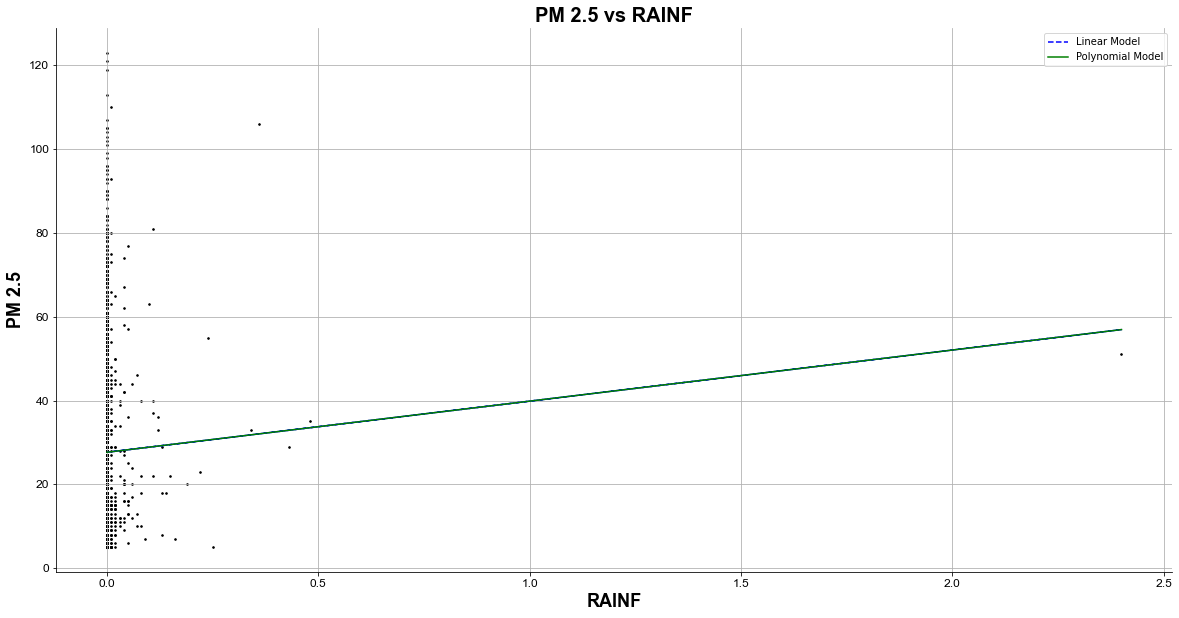

In [848]:
nombre = "RAINF" 

deg = 1
y = PM_25.values
x = df[nombre].values

# Reshape Values#
x = x.reshape(-1,1)
x.shape

# Reshape Values#
y = y.reshape(-1,1)
y.shape

#Linear model#
lm = LinearRegression().fit(x,y)
lmp = lm.predict(x)
regression_results(y,lmp)

## Plots for PM_25 vs Hour#
plt.figure(figsize=(20,10))
plt.scatter(x,y, marker=".", c = "k" , s = 10)
plt.plot(x, lmp, 'b--')
y = PM_25
x = df[nombre] 

mymodel = np.poly1d(np.polyfit(x, y, deg))
print(r2_score(y, mymodel(x)))
predicted = mymodel(x)
myline = np.linspace(min(x),max(x))
plt.plot(myline, mymodel(myline),'g-')

plt.title("PM 2.5 vs " + nombre ,**fontT)
plt.xlabel(nombre,**fontL)
plt.ylabel("PM 2.5",**fontL)
plt.xticks(fontsize = 12 , family = "Arial")
plt.yticks(fontsize = 12 , family = "Arial")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid("On")
plt.legend(['Linear Model','Polynomial Model'])

regression_results(y,predicted)


PM 2.5  vs RH
--

explained_variance:  0.0013
r2:  0.0013
MAE:  12.8484
MSE:  283.4589
RMSE:  16.8362
0.020915777966912907
explained_variance:  0.0209
r2:  0.0209
MAE:  12.7254
MSE:  277.8933
RMSE:  16.6701


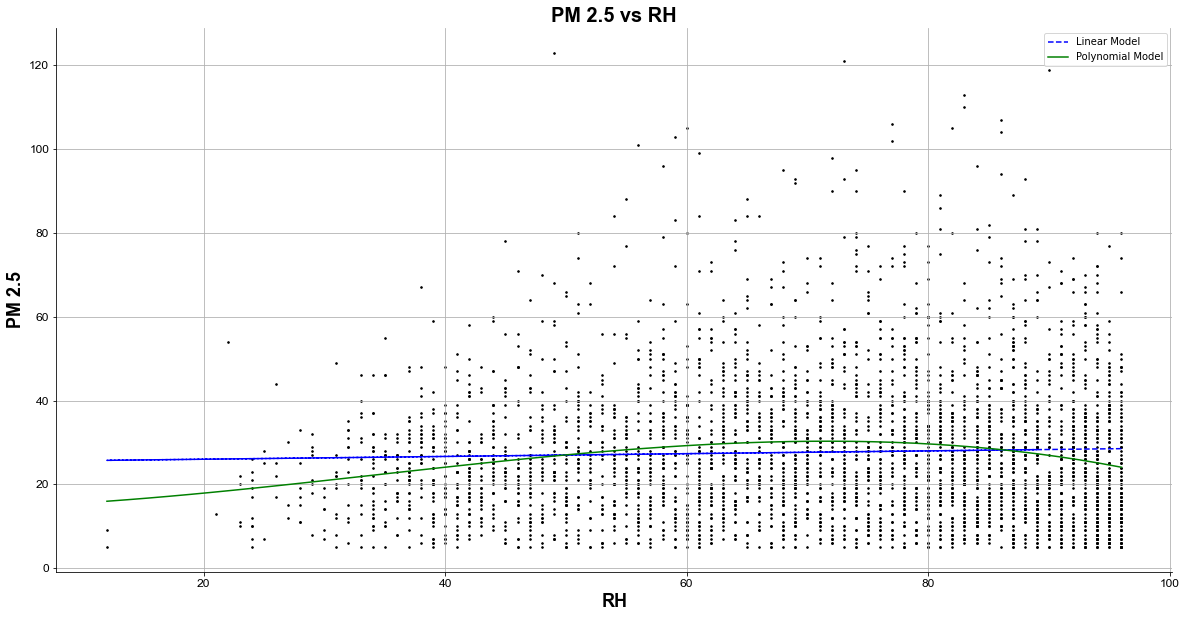

In [849]:
nombre = "RH" 

deg = 3
y = PM_25.values
x = df[nombre].values

# Reshape Values#
x = x.reshape(-1,1)
x.shape

# Reshape Values#
y = y.reshape(-1,1)
y.shape

#Linear model#
lm = LinearRegression().fit(x,y)
lmp = lm.predict(x)
regression_results(y,lmp)

## Plots for PM_25 vs Hour#
plt.figure(figsize=(20,10))
plt.scatter(x,y, marker=".", c = "k" , s = 10)
plt.plot(x, lmp, 'b--')
y = PM_25
x = df[nombre] 

mymodel = np.poly1d(np.polyfit(x, y, deg))
print(r2_score(y, mymodel(x)))
predicted = mymodel(x)
myline = np.linspace(min(x),max(x))
plt.plot(myline, mymodel(myline),'g-')

plt.title("PM 2.5 vs " + nombre ,**fontT)
plt.xlabel(nombre,**fontL)
plt.ylabel("PM 2.5",**fontL)
plt.xticks(fontsize = 12 , family = "Arial")
plt.yticks(fontsize = 12 , family = "Arial")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid("On")
plt.legend(['Linear Model','Polynomial Model'])

regression_results(y,predicted)


PM 2.5  vs SR
--

explained_variance:  0.0014
r2:  0.0014
MAE:  12.851
MSE:  283.4349
RMSE:  16.8355
0.003660187921473823
explained_variance:  0.0037
r2:  0.0037
MAE:  12.84
MSE:  282.791
RMSE:  16.8164


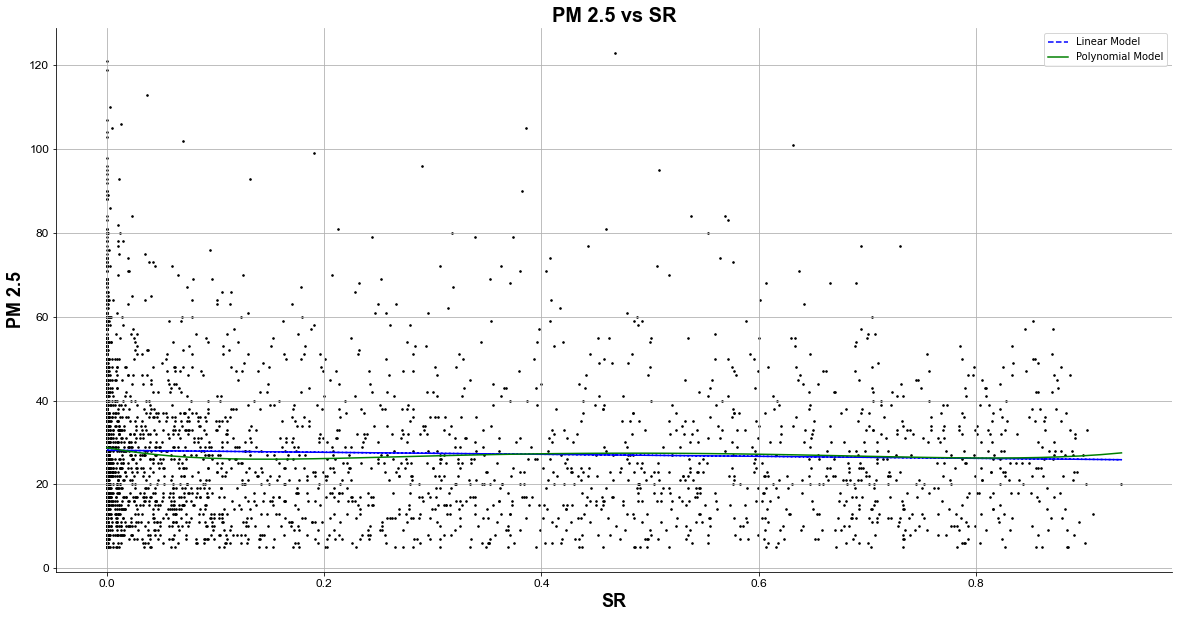

In [850]:
nombre = "SR" 

deg = 6
y = PM_25.values
x = df[nombre].values

# Reshape Values#
x = x.reshape(-1,1)
x.shape

# Reshape Values#
y = y.reshape(-1,1)
y.shape

#Linear model#
lm = LinearRegression().fit(x,y)
lmp = lm.predict(x)
regression_results(y,lmp)

## Plots for PM_25 vs Hour#
plt.figure(figsize=(20,10))
plt.scatter(x,y, marker=".", c = "k" , s = 10)
plt.plot(x, lmp, 'b--')
y = PM_25
x = df[nombre] 

mymodel = np.poly1d(np.polyfit(x, y, deg))
print(r2_score(y, mymodel(x)))
predicted = mymodel(x)
myline = np.linspace(min(x),max(x))
plt.plot(myline, mymodel(myline),'g-')

plt.title("PM 2.5 vs " + nombre ,**fontT)
plt.xlabel(nombre,**fontL)
plt.ylabel("PM 2.5",**fontL)
plt.xticks(fontsize = 12 , family = "Arial")
plt.yticks(fontsize = 12 , family = "Arial")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid("On")
plt.legend(['Linear Model','Polynomial Model'])

regression_results(y,predicted)


PM 2.5  vs TOU
--

explained_variance:  0.007
r2:  0.007
MAE:  12.7767
MSE:  281.8413
RMSE:  16.7881
0.028606063368382673
explained_variance:  0.0286
r2:  0.0286
MAE:  12.5804
MSE:  275.7106
RMSE:  16.6045


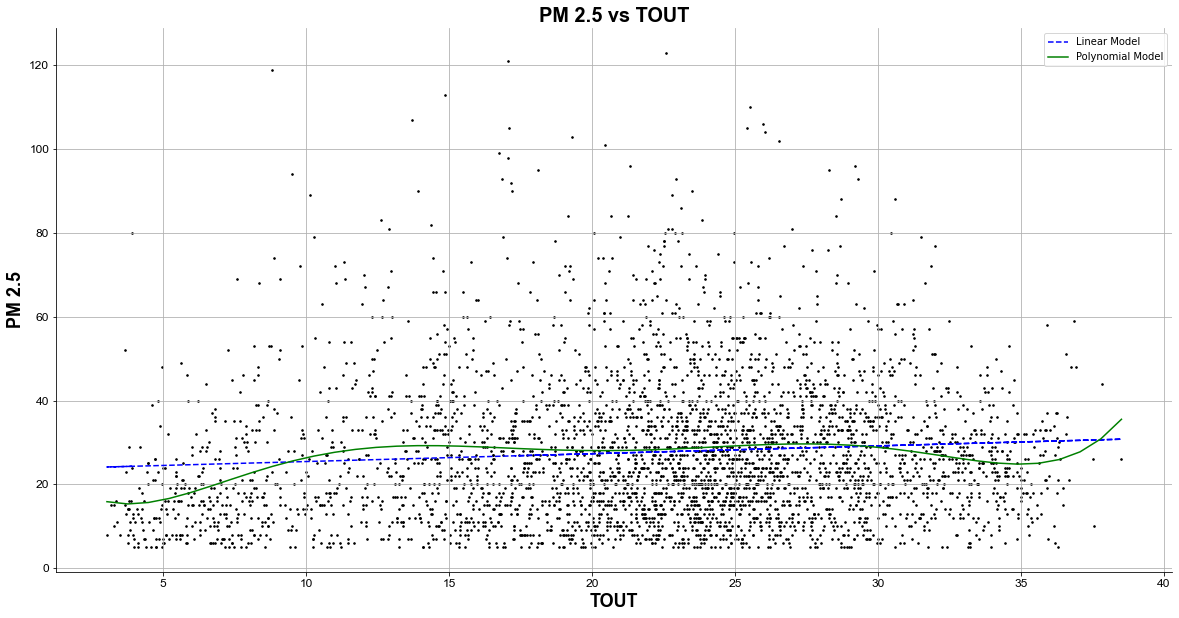

In [851]:
nombre = "TOUT" 

deg = 6
y = PM_25.values
x = df[nombre].values

# Reshape Values#
x = x.reshape(-1,1)
x.shape

# Reshape Values#
y = y.reshape(-1,1)
y.shape

#Linear model#
lm = LinearRegression().fit(x,y)
lmp = lm.predict(x)
regression_results(y,lmp)

## Plots for PM_25 vs Hour#
plt.figure(figsize=(20,10))
plt.scatter(x,y, marker=".", c = "k" , s = 10)
plt.plot(x, lmp, 'b--')
y = PM_25
x = df[nombre] 

mymodel = np.poly1d(np.polyfit(x, y, deg))
print(r2_score(y, mymodel(x)))
predicted = mymodel(x)
myline = np.linspace(min(x),max(x))
plt.plot(myline, mymodel(myline),'g-')

plt.title("PM 2.5 vs " + nombre ,**fontT)
plt.xlabel(nombre,**fontL)
plt.ylabel("PM 2.5",**fontL)
plt.xticks(fontsize = 12 , family = "Arial")
plt.yticks(fontsize = 12 , family = "Arial")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid("On")
plt.legend(['Linear Model','Polynomial Model'])

regression_results(y,predicted)


PM 2.5  vs WSR
--

explained_variance:  0.0051
r2:  0.0051
MAE:  12.8504
MSE:  282.3919
RMSE:  16.8045
0.017639224785839458
explained_variance:  0.0176
r2:  0.0176
MAE:  12.735
MSE:  278.8233
RMSE:  16.698


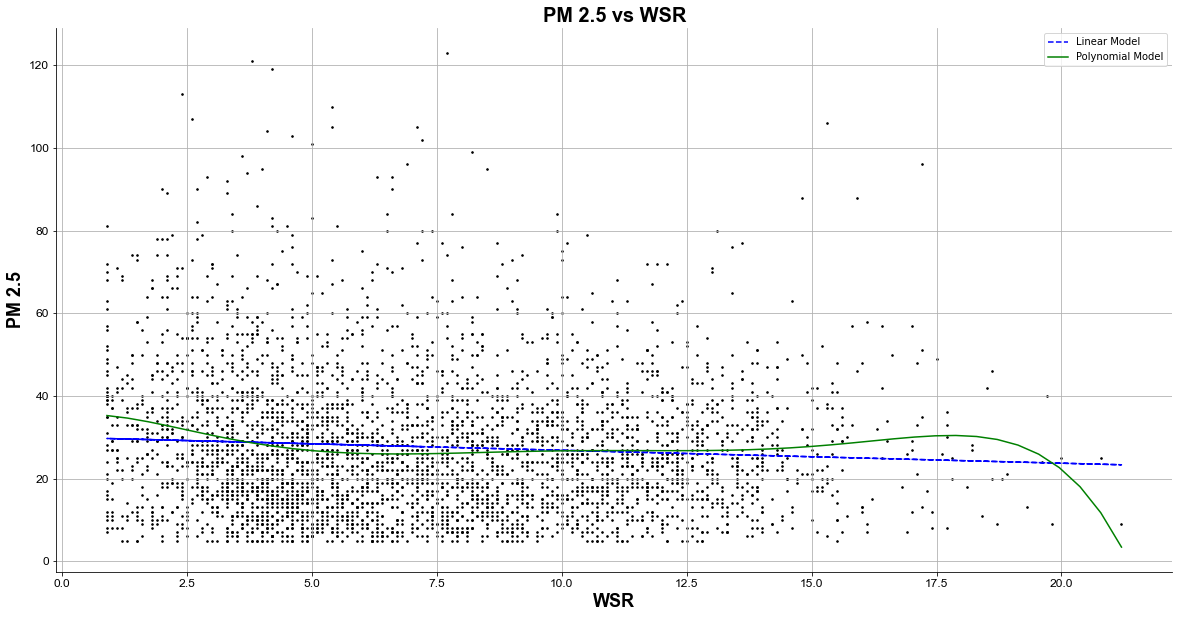

In [852]:
nombre = "WSR" 

deg = 6
y = PM_25.values
x = df[nombre].values

# Reshape Values#
x = x.reshape(-1,1)
x.shape

# Reshape Values#
y = y.reshape(-1,1)
y.shape

#Linear model#
lm = LinearRegression().fit(x,y)
lmp = lm.predict(x)
regression_results(y,lmp)

## Plots for PM_25 vs Hour#
plt.figure(figsize=(20,10))
plt.scatter(x,y, marker=".", c = "k" , s = 10)
plt.plot(x, lmp, 'b--')
y = PM_25
x = df[nombre] 

mymodel = np.poly1d(np.polyfit(x, y, deg))
print(r2_score(y, mymodel(x)))
predicted = mymodel(x)
myline = np.linspace(min(x),max(x))
plt.plot(myline, mymodel(myline),'g-')

plt.title("PM 2.5 vs " + nombre ,**fontT)
plt.xlabel(nombre,**fontL)
plt.ylabel("PM 2.5",**fontL)
plt.xticks(fontsize = 12 , family = "Arial")
plt.yticks(fontsize = 12 , family = "Arial")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid("On")
plt.legend(['Linear Model','Polynomial Model'])

regression_results(y,predicted)


PM 2.5  vs WDV
--

explained_variance:  0.001
r2:  0.001
MAE:  12.8522
MSE:  283.5324
RMSE:  16.8384
0.02193911346519728
explained_variance:  0.0219
r2:  0.0219
MAE:  12.6311
MSE:  277.6029
RMSE:  16.6614


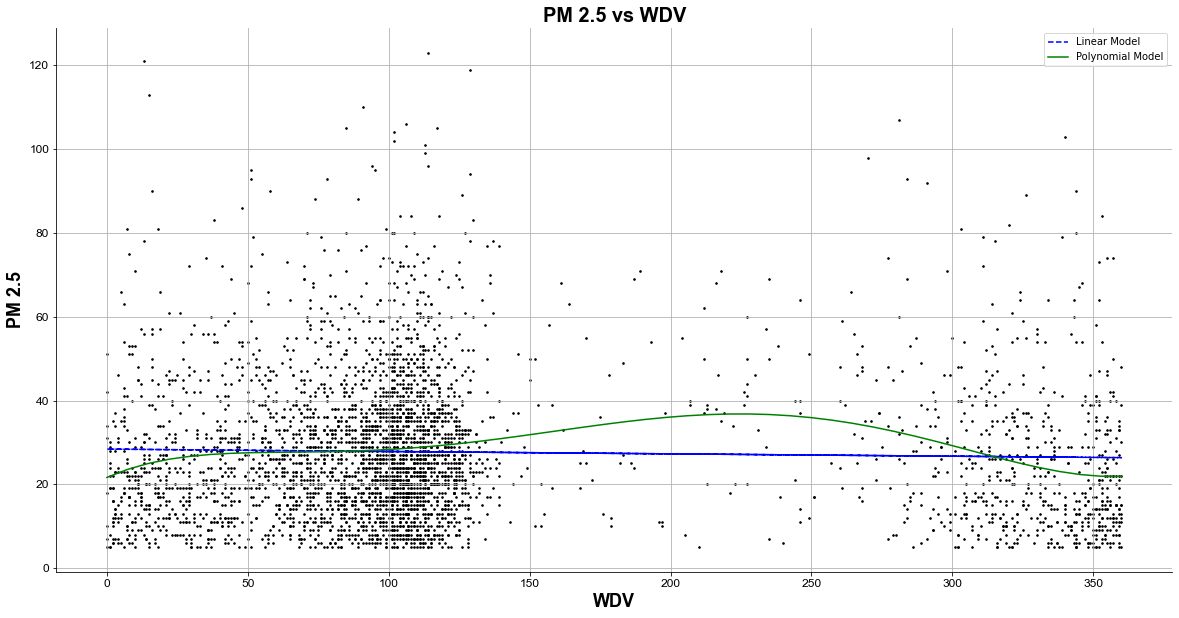

In [853]:
nombre = "WDV" 

deg = 6
y = PM_25.values
x = df[nombre].values

# Reshape Values#
x = x.reshape(-1,1)
x.shape

# Reshape Values#
y = y.reshape(-1,1)
y.shape

#Linear model#
lm = LinearRegression().fit(x,y)
lmp = lm.predict(x)
regression_results(y,lmp)

## Plots for PM_25 vs Hour#
plt.figure(figsize=(20,10))
plt.scatter(x,y, marker=".", c = "k" , s = 10)
plt.plot(x, lmp, 'b--')
y = PM_25
x = df[nombre] 

mymodel = np.poly1d(np.polyfit(x, y, deg))
print(r2_score(y, mymodel(x)))
predicted = mymodel(x)
myline = np.linspace(min(x),max(x))
plt.plot(myline, mymodel(myline),'g-')

plt.title("PM 2.5 vs " + nombre ,**fontT)
plt.xlabel(nombre,**fontL)
plt.ylabel("PM 2.5",**fontL)
plt.xticks(fontsize = 12 , family = "Arial")
plt.yticks(fontsize = 12 , family = "Arial")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid("On")
plt.legend(['Linear Model','Polynomial Model'])

regression_results(y,predicted)


Multilinear
--

O3 Linear Regression

In [854]:
## We get back the data that we are analyzing ##
regression_columnNames = column_names.drop(['CONT'])

## Predicting Variable ##
x  = df[regression_columnNames]


## Y model of O3 ##
y = O3.values


In [855]:
#Reshape the Values#
y = y.reshape(-1,1)
y.shape

(3859, 1)

In [856]:
lm = sk.linear_model.LinearRegression().fit(x,y)
lmp = lm.predict(x)
regression_results(y,lmp)

explained_variance:  0.6833
r2:  0.6833
MAE:  6.956
MSE:  86.3181
RMSE:  9.2908


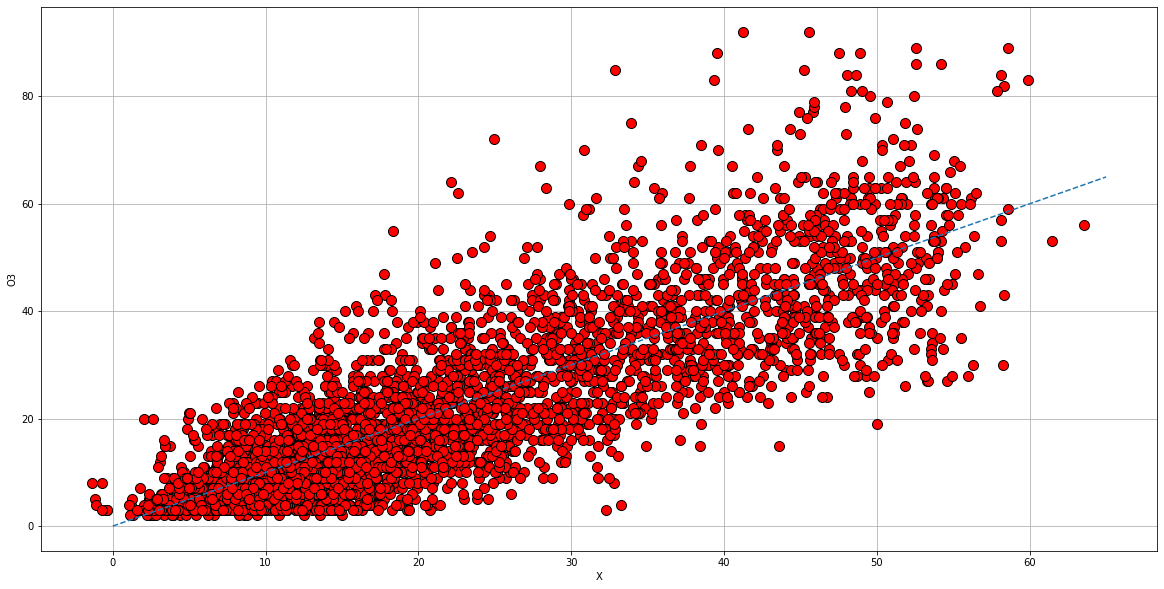

In [857]:
plt.figure(figsize=(20,10))

plt.plot(lmp,y,"ok",markersize =10, linewidth = 4 , markerfacecolor = 'red')
plt.plot([0,65],[0,65],"--")
plt.ylabel("O3")
plt.xlabel("X")
plt.grid(True)

Scaling the dataset

In [858]:
## We get back the data that we are analyzing ##
regression_columnNames = column_names.drop(['CONT'])

## Predicting Variable ##
x  = df[regression_columnNames]


## Y model of O3 ##
y = O3.values


In [859]:
#Reshape the Values#
y = y.reshape(-1,1)
y.shape

(3859, 1)

In [860]:
## Scales ##
scaling_procedure_1 = sk.preprocessing.MinMaxScaler(feature_range= (0,1))
scaling_procedure_2 = sk.preprocessing.MinMaxScaler(feature_range= (0,1))

In [861]:
#Datos ya escalados#
x_scaled = scaling_procedure_1.fit_transform(x)
y_scaled = scaling_procedure_1.fit_transform(y)

In [862]:
##Datos de separados##

##Dividio los datos Entrenamiento##
x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(x_scaled,y_scaled,test_size= 0.2, random_state = 42)


In [863]:
print("Size of the full data set: ",x_scaled.shape)
print("Size of the training data set: ",x_train.shape)
print("Size of the test data set: ",x_test.shape)

Size of the full data set:  (3859, 9)
Size of the training data set:  (3087, 9)
Size of the test data set:  (772, 9)


In [864]:
#Linear Model#
LR = LinearRegression()

In [865]:
#Fit the training data#
LR.fit(x_train,y_train)

LinearRegression()

In [866]:
y_prediction =  LR.predict(x_test)
regression_results(y_test,y_prediction)

explained_variance:  0.6803
r2:  0.6795
MAE:  0.0791
MSE:  0.0116
RMSE:  0.1075


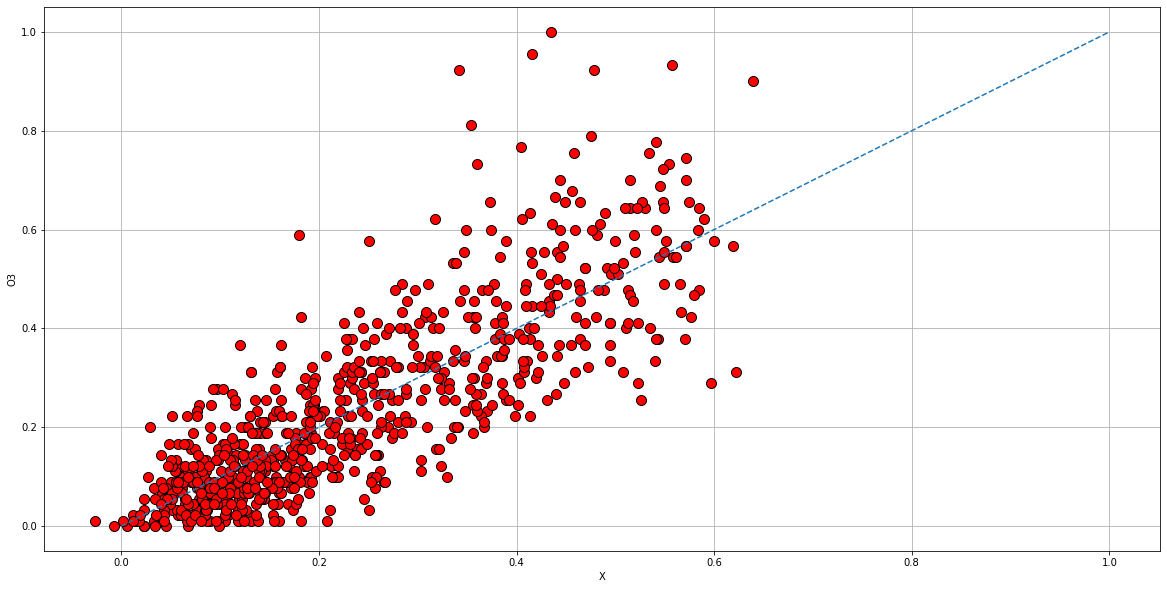

In [867]:
plt.figure(figsize=(20,10))

plt.plot(y_prediction,y_test,"ok",markersize =10, linewidth = 4 , markerfacecolor = 'red')
plt.plot([0,1],[0,1],"--")
plt.ylabel("O3")
plt.xlabel("X")
plt.grid(True)

PM_25 Linear Regression
--

In [868]:
df = pd.read_csv("Monterrey Pollution Data 2.csv")
df.head()

df = df.drop(["PM2.5Diff"],axis=1)

PM_25 = df["PM2.5"]

column_names = df.columns
column_names = column_names.drop(["O3","PM2.5","PM10"])

In [869]:
## We get back the data that we are analyzing ##
regression_columnNames = column_names.drop(['CONT'])

## Predicting Variable ##
x  = df[regression_columnNames]


## Y model of O3 ##
y = PM_25.values


In [870]:
#Reshape the Values#
y = y.reshape(-1,1)
y.shape

(3859, 1)

In [871]:
lm = sk.linear_model.LinearRegression().fit(x,y)
lmp = lm.predict(x)
regression_results(y,lmp)

explained_variance:  0.0728
r2:  0.0728
MAE:  12.2903
MSE:  263.1581
RMSE:  16.2221


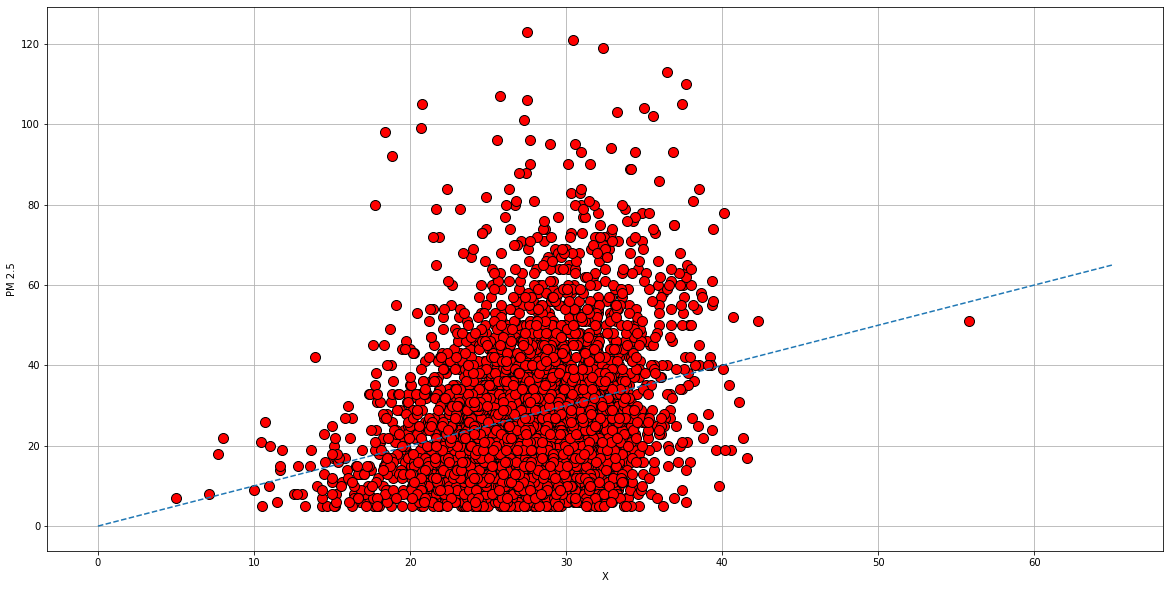

In [872]:
plt.figure(figsize=(20,10))

plt.plot(lmp,y,"ok",markersize =10, linewidth = 4 , markerfacecolor = 'red')
plt.plot([0,65],[0,65],"--")
plt.ylabel("PM 2.5")
plt.xlabel("X")
plt.grid(True)

Scaling the dataset

In [873]:
df = pd.read_csv("Monterrey Pollution Data 2.csv")
df.head()

df = df.drop(["PM2.5Diff"],axis=1)

PM_25 = df["PM2.5"]

column_names = df.columns
column_names = column_names.drop(["O3","PM2.5","PM10"])

In [874]:
## We get back the data that we are analyzing ##
regression_columnNames = column_names.drop(['CONT'])

## Predicting Variable ##
x  = df[regression_columnNames]

## Y model of O3 ##
y = PM_25.values

In [875]:
#Reshape the Values#
y = y.reshape(-1,1)
y.shape

(3859, 1)

In [876]:
## Scales ##
scaling_procedure_1 = sk.preprocessing.MinMaxScaler(feature_range= (0,1))
scaling_procedure_2 = sk.preprocessing.MinMaxScaler(feature_range= (0,1))

In [877]:
#Datos ya escalados#
x_scaled = scaling_procedure_1.fit_transform(x)
y_scaled = scaling_procedure_1.fit_transform(y)

In [878]:
##Datos de separados##

##Dividio los datos Entrenamiento##
x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(x_scaled,y_scaled,test_size= 0.2, random_state = 42)

In [879]:
print("Size of the full data set: ",x_scaled.shape)
print("Size of the training data set: ",x_train.shape)
print("Size of the test data set: ",x_test.shape)

Size of the full data set:  (3859, 9)
Size of the training data set:  (3087, 9)
Size of the test data set:  (772, 9)


In [880]:
#Linear Model#
LR = LinearRegression()

In [881]:
#Fit the training data#
LR.fit(x_train,y_train)

LinearRegression()

In [882]:
y_prediction =  LR.predict(x_test)
regression_results(y_test,y_prediction)

explained_variance:  0.0615
r2:  0.0572
MAE:  0.1073
MSE:  0.0206
RMSE:  0.1436


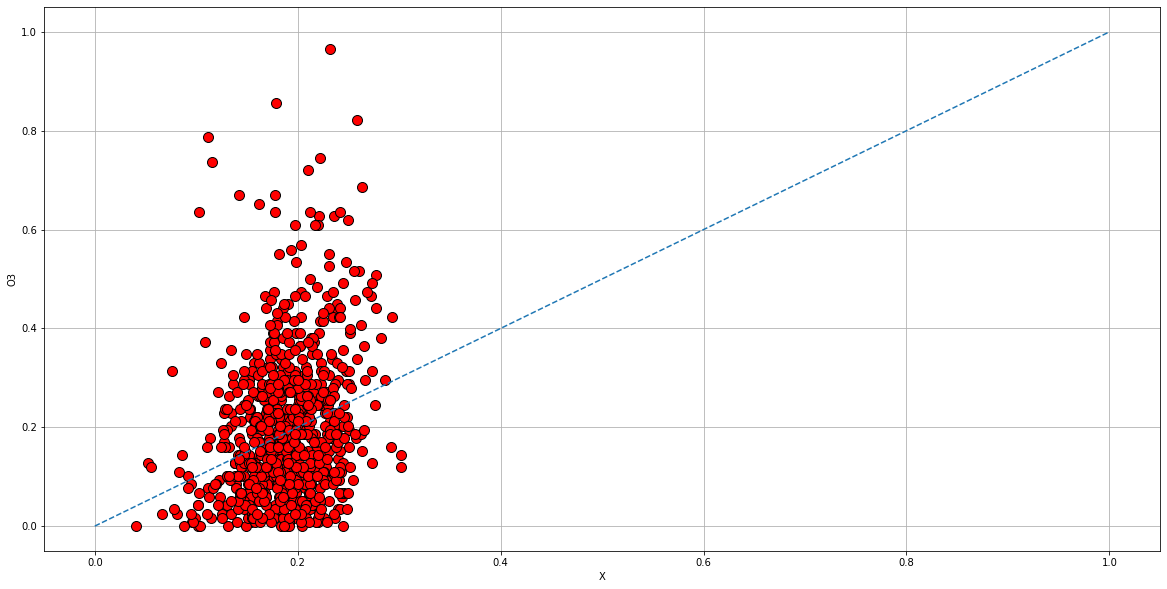

In [883]:
plt.figure(figsize=(20,10))

plt.plot(y_prediction,y_test,"ok",markersize =10, linewidth = 4 , markerfacecolor = 'red')
plt.plot([0,1],[0,1],"--")
plt.ylabel("O3")
plt.xlabel("X")
plt.grid(True)

Machine Learning
--

As we can see the model for PM 2.5 isn't the best fitted for the analysis so we will make a classification model for the PM 2.5

In [884]:
#Read data
df = pd.read_csv('Monterrey Pollution Data 3.csv')
df.head()


df = df.drop(["PM2.5Diff"],axis=1)

O3 = df ["O3"]
PM_25 = df["PM2.5"]
PM_10 = df["PM10"]
CONT  = df["CONT"]

column_names = df.columns
column_names = column_names.drop(["O3","PM2.5","PM10","CONT"])

x  = df[column_names]

In [885]:
#Dependant
x = x
#Independant#
y = CONT

In [886]:
#Separate train and test data 
x_train,x_test,y_train,y_test = sk.model_selection.train_test_split(x,y,train_size=0.20,random_state=0)

#Standarize data. Subtract mean and devide by standard deviation
sc = sk.preprocessing.StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [887]:
from sklearn.naive_bayes import GaussianNB
#Fit classifier with train data
NB = GaussianNB()
NB.fit(x_train,y_train)

GaussianNB()

In [888]:
#Predict test data
y_pred=NB.predict(x_test)

In [889]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
print(cm)
tn, fp, fn, tp = cm.ravel()

[[1123   85]
 [ 455   99]]


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

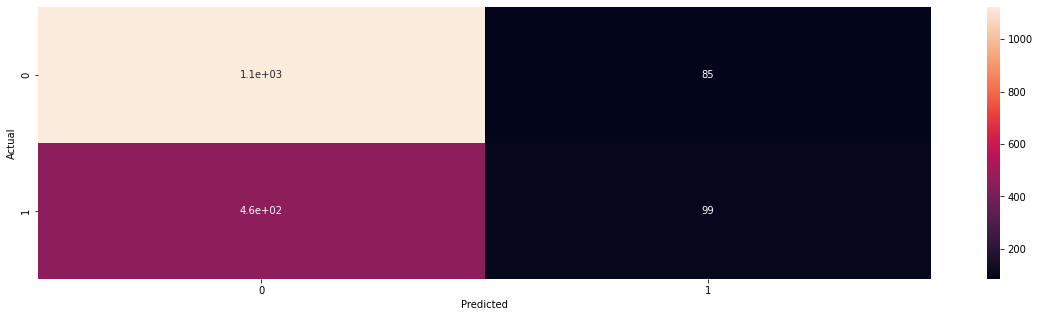

In [890]:
cm2 = pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])
sns.heatmap(cm2,annot=True)

In [891]:
#Get performance measures
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.71      0.93      0.81      1208
           1       0.54      0.18      0.27       554

    accuracy                           0.69      1762
   macro avg       0.62      0.55      0.54      1762
weighted avg       0.66      0.69      0.64      1762



In [892]:
recall=tp/(tp+fn)
print("Likelihood Ratio",recall/(1-recall))
print("Accuracy=",(tp+tn)/(tp+tn+fp+fn))


Likelihood Ratio 0.2175824175824176
Accuracy= 0.6935300794551645


Logistic Regresion
--


In [893]:
#Read data
df = pd.read_csv('Monterrey Pollution Data 3.csv')
df.head()


df = df.drop(["PM2.5Diff"],axis=1)


column_names = df.columns
column_names = column_names.drop(["CONT"])

x  = df[column_names]

In [894]:

## Predicting Variable ##
x  = x.values


## Y model of O3 ##
y = df['CONT']


In [895]:
## Escalas ##
scaling_procedure_1 = sk.preprocessing.MinMaxScaler(feature_range= (0,1))

In [896]:
#Datos ya escalados#
x_scaled = scaling_procedure_1.fit_transform(x)
y_scaled = y

In [897]:
##Divididr la base de datos##

##Entrenamiento##

train_ratio = 0.7
validation_ratio = 0.15
test_ratio = 0.15

In [898]:
##Datos de separados##

##Dividio los datos Entrenamiento##
x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(x_scaled,y_scaled,test_size=1-train_ratio)

In [899]:
##Dividio los datos Validacion y prueba ##
x_val,x_test,y_val,y_test = sk.model_selection.train_test_split(x_test,y_test,test_size= test_ratio/(test_ratio+validation_ratio))

In [900]:
print("Size of the full data set: ",x_scaled.shape)
print("Size of the training data set: ",x_train.shape)
print("Size of the validation data set: ",x_val.shape)
print("Size of the test data set: ",x_test.shape)

Size of the full data set:  (2202, 12)
Size of the training data set:  (1541, 12)
Size of the validation data set:  (330, 12)
Size of the test data set:  (331, 12)


In [901]:
polution_model = tf.keras.models.Sequential()
##Capa de entrada##
polution_model.add(tf.keras.layers.Dense(20,input_dim = 12, activation = "relu"))
polution_model.add(tf.keras.layers.Dense(10, activation = "relu"))
## Salida ##
polution_model.add(tf.keras.layers.Dense(1, activation = "sigmoid"))

In [902]:
##Problemas de una sola salida ##
polution_model.compile(loss="binary_crossentropy", optimizer="adam" , metrics="accuracy")

In [903]:
polution_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 20)                260       
_________________________________________________________________
dense_16 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 11        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


In [904]:
history = polution_model.fit(x_train,y_train,epochs= 150, batch_size= 16,validation_data=(x_val,y_val))

Epoch 1/150
97/97 [==============================] - 1s 2ms/step - loss: 0.6567 - accuracy: 0.6347 - val_loss: 0.6352 - val_accuracy: 0.6394
Epoch 2/150
97/97 [==============================] - 0s 1ms/step - loss: 0.5725 - accuracy: 0.6866 - val_loss: 0.5843 - val_accuracy: 0.6394
Epoch 3/150
97/97 [==============================] - 0s 1ms/step - loss: 0.5030 - accuracy: 0.7430 - val_loss: 0.5039 - val_accuracy: 0.7273
Epoch 4/150
97/97 [==============================] - 0s 1ms/step - loss: 0.4078 - accuracy: 0.8287 - val_loss: 0.3962 - val_accuracy: 0.8394
Epoch 5/150
97/97 [==============================] - 0s 1ms/step - loss: 0.3163 - accuracy: 0.8923 - val_loss: 0.3091 - val_accuracy: 0.8788
Epoch 6/150
97/97 [==============================] - 0s 1ms/step - loss: 0.2461 - accuracy: 0.9182 - val_loss: 0.2470 - val_accuracy: 0.9121
Epoch 7/150
97/97 [==============================] - 0s 999us/step - loss: 0.2030 - accuracy: 0.9422 - val_loss: 0.2153 - val_accuracy: 0.9030
Epoch 8/150

In [905]:
_,accuracy  = polution_model.evaluate(x_train,y_train)
print("Acuracy: %2f " % (accuracy*100))

49/49 [==============================] - 0s 644us/step - loss: 0.0115 - accuracy: 0.9981
Acuracy: 99.805319 


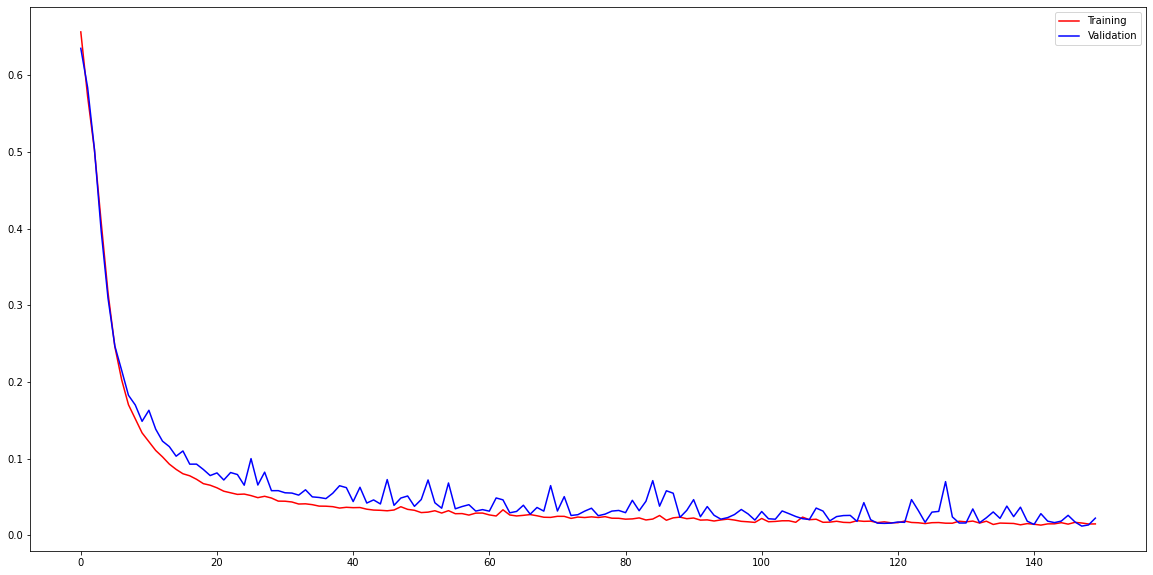

In [906]:
plt.figure(figsize=(20,10))

plt.plot(history.history['loss'], c="r", label ="Training")

plt.plot(history.history['val_loss'], c="b", label ="Validation")

plt.legend()

In [907]:
predictions = polution_model.predict(x_test)


In [908]:
for i in range(330):
    print("%s => %d (expected %d)" % (x[i].tolist(),predictions[i],y[i]))

[42.0, 46.0, 20.0, 7.0, 16.0, 722.7, 0.0, 56.0, 0.163, 26.85, 9.8, 60.0] => 0 (expected 0)
[17.0, 90.0, 32.0, 3.0, 23.0, 718.3, 0.0, 76.0, 0.0, 22.05, 8.4, 126.0] => 0 (expected 0)
[33.0, 184.0, 18.0, 2.0, 18.0, 719.0, 0.0, 49.0, 0.002, 21.82, 9.3, 132.0] => 0 (expected 0)
[12.0, 133.0, 39.0, 6.0, 0.0, 716.8, 0.0, 80.0, 0.0, 24.32, 4.2, 43.0] => 0 (expected 0)
[35.0, 114.0, 17.0, 4.0, 18.0, 715.0, 0.06, 74.0, 0.001, 25.64, 15.0, 239.0] => 0 (expected 0)
[8.0, 80.0, 35.0, 4.0, 4.0, 719.0, 0.0, 93.0, 0.0, 17.78, 4.4, 354.0] => 0 (expected 0)
[64.0, 61.0, 25.0, 2.0, 13.0, 716.6, 0.0, 44.0, 0.79, 34.04, 10.5, 99.0] => 0 (expected 0)
[36.0, 105.0, 21.0, 3.0, 17.0, 726.8, 0.0, 66.0, 0.036, 15.98, 6.7, 105.0] => 1 (expected 0)
[13.0, 79.0, 34.0, 3.0, 1.0, 719.3, 0.0, 82.0, 0.0, 23.69, 5.4, 65.0] => 0 (expected 0)
[30.0, 51.0, 17.0, 6.0, 22.0, 730.1, 0.0, 50.0, 0.0, 8.48, 7.5, 119.0] => 0 (expected 0)
[28.0, 40.0, 15.0, 1.0, 0.0, 718.6, 0.0, 86.0, 0.0, 19.93, 10.1, 84.0] => 0 (expected 0)
[6.0

Reclassifying the data with min and max values
--

In [909]:
set_printoptions(precision=6,suppress=True)

# define a matrix
df_2 = pd.read_csv('Monterrey Pollution Data w Days.csv',sep=",",encoding = 'unicode_escape')

header_row=df_2.columns.values



In [910]:
## Group data by date##
pm25_max=df_2.groupby(by='Date')['PRS','RAINF','RH','SR','TOUT','WSR','WDV','PM2.5'].max()


C:\Users\Usuario\AppData\Local\Temp/ipykernel_46288/2376389202.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pm25_max=df_2.groupby(by='Date')['PRS','RAINF','RH','SR','TOUT','WSR','WDV','PM2.5'].max()


In [911]:
pm25_max=pm25_max.rename(columns={'PRS':'PRS_max','RAINF':'RAINF_max',\
                         'RH':'RH_max','SR':'SR_max','TOUT':'TOUT_max','WSR':'WSR_max',\
                         'WDV':'WDV_max','PM2.5':'PM2.5_max'})

In [912]:
pm25_max.head()

PRS_max  RAINF_max  RH_max  SR_max  TOUT_max  WSR_max  WDV_max  \
Date                                                                        
01-abr-15    718.1       0.00      94   0.641     26.04     14.5      352   
01-ene-15    725.4       0.02      96   0.175      7.43      8.2      354   
01-feb-15    722.0       0.01      95   0.277     24.59      5.8      357   
01-jul-15    720.4       0.03      92   0.413     26.59     14.2      125   
01-mar-15    725.1       0.01      96   0.214     12.85      7.6      284   

           PM2.5_max  
Date                  
01-abr-15         68  
01-ene-15         80  
01-feb-15         56  
01-jul-15         40  
01-mar-15         70

In [913]:
pm25_min=df_2.groupby(by='Date')['PRS','RAINF','RH','SR','TOUT','WSR','WDV'].min()

C:\Users\Usuario\AppData\Local\Temp/ipykernel_46288/3024540620.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pm25_min=df_2.groupby(by='Date')['PRS','RAINF','RH','SR','TOUT','WSR','WDV'].min()


In [914]:
pm25_min=pm25_min.rename(columns={'PRS':'PRS_min','RAINF':'RAINF_min',\
                         'RH':'RH_min','SR':'SR_min','TOUT':'TOUT_min','WSR':'WSR_min',\
                         'WDV':'WDV_min'})

In [915]:
pm25_min.head()

PRS_min  RAINF_min  RH_min  SR_min  TOUT_min  WSR_min  WDV_min
Date                                                                     
01-abr-15    715.7        0.0      67     0.0     18.92      1.2       21
01-ene-15    720.6        0.0      93     0.0      3.79      2.9        2
01-feb-15    716.9        0.0      55     0.0     13.84      1.4       27
01-jul-15    718.8        0.0      71     0.0     21.35      5.0       31
01-mar-15    722.3        0.0      87     0.0      8.03      1.2       26

In [916]:
pm25 = pm25_max.join(pm25_min)
pm25.head()

PRS_max  RAINF_max  RH_max  SR_max  TOUT_max  WSR_max  WDV_max  \
Date                                                                        
01-abr-15    718.1       0.00      94   0.641     26.04     14.5      352   
01-ene-15    725.4       0.02      96   0.175      7.43      8.2      354   
01-feb-15    722.0       0.01      95   0.277     24.59      5.8      357   
01-jul-15    720.4       0.03      92   0.413     26.59     14.2      125   
01-mar-15    725.1       0.01      96   0.214     12.85      7.6      284   

           PM2.5_max  PRS_min  RAINF_min  RH_min  SR_min  TOUT_min  WSR_min  \
Date                                                                          
01-abr-15         68    715.7        0.0      67     0.0     18.92      1.2   
01-ene-15         80    720.6        0.0      93     0.0      3.79      2.9   
01-feb-15         56    716.9        0.0      55     0.0     13.84      1.4   
01-jul-15         40    718.8        0.0      71     0.0     21.35      5.0   
01-mar-15         70    722.3        0.0      87     0.0      8.03      1.2   

           WDV_min  
Date                
01-abr-15       21  
01-ene-15        2  
01-feb-15       27  
01-jul-15       31  
01-mar-15       26

In [917]:
pm25_avg=df_2.groupby(by='Date')['PRS','RAINF','RH','SR','TOUT','WSR','WDV'].mean()

C:\Users\Usuario\AppData\Local\Temp/ipykernel_46288/2988305909.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pm25_avg=df_2.groupby(by='Date')['PRS','RAINF','RH','SR','TOUT','WSR','WDV'].mean()


In [918]:
pm25_avg=pm25_avg.rename(columns={'PRS':'PRS_avg','RAINF':'RAINF_avg',\
                         'RH':'RH_avg','SR':'SR_avg','TOUT':'TOUT_avg','WSR':'WSR_avg',\
                         'WDV':'WDV_avg'})

In [919]:
pm25 = pm25.join(pm25_avg)
pm25.head()

PRS_max  RAINF_max  RH_max  SR_max  TOUT_max  WSR_max  WDV_max  \
Date                                                                        
01-abr-15    718.1       0.00      94   0.641     26.04     14.5      352   
01-ene-15    725.4       0.02      96   0.175      7.43      8.2      354   
01-feb-15    722.0       0.01      95   0.277     24.59      5.8      357   
01-jul-15    720.4       0.03      92   0.413     26.59     14.2      125   
01-mar-15    725.1       0.01      96   0.214     12.85      7.6      284   

           PM2.5_max  PRS_min  RAINF_min  ...  TOUT_min  WSR_min  WDV_min  \
Date                                      ...                               
01-abr-15         68    715.7        0.0  ...     18.92      1.2       21   
01-ene-15         80    720.6        0.0  ...      3.79      2.9        2   
01-feb-15         56    716.9        0.0  ...     13.84      1.4       27   
01-jul-15         40    718.8        0.0  ...     21.35      5.0       31   
01-mar-15         70    722.3        0.0  ...      8.03      1.2       26   

              PRS_avg  RAINF_avg     RH_avg    SR_avg   TOUT_avg   WSR_avg  \
Date                                                                         
01-abr-15  716.900000   0.000000  77.850000  0.172650  22.892500  8.030000   
01-ene-15  722.458824   0.002353  94.764706  0.044176   5.553529  5.300000   
01-feb-15  718.369565   0.001739  82.478261  0.070435  17.874348  3.691304   
01-jul-15  719.717647   0.001765  82.176471  0.118941  23.507647  8.705882   
01-mar-15  723.317647   0.000588  91.352941  0.051824  10.544706  4.082353   

              WDV_avg  
Date                   
01-abr-15   99.900000  
01-ene-15  145.705882  
01-feb-15  263.000000  
01-jul-15   92.294118  
01-mar-15  105.294118  

[5 rows x 22 columns]

In [920]:
pm25['CONT']=(pm25['PM2.5_max']>40.4)*1

pm25.head()


PRS_max  RAINF_max  RH_max  SR_max  TOUT_max  WSR_max  WDV_max  \
Date                                                                        
01-abr-15    718.1       0.00      94   0.641     26.04     14.5      352   
01-ene-15    725.4       0.02      96   0.175      7.43      8.2      354   
01-feb-15    722.0       0.01      95   0.277     24.59      5.8      357   
01-jul-15    720.4       0.03      92   0.413     26.59     14.2      125   
01-mar-15    725.1       0.01      96   0.214     12.85      7.6      284   

           PM2.5_max  PRS_min  RAINF_min  ...  WSR_min  WDV_min     PRS_avg  \
Date                                      ...                                 
01-abr-15         68    715.7        0.0  ...      1.2       21  716.900000   
01-ene-15         80    720.6        0.0  ...      2.9        2  722.458824   
01-feb-15         56    716.9        0.0  ...      1.4       27  718.369565   
01-jul-15         40    718.8        0.0  ...      5.0       31  719.717647   
01-mar-15         70    722.3        0.0  ...      1.2       26  723.317647   

           RAINF_avg     RH_avg    SR_avg   TOUT_avg   WSR_avg     WDV_avg  \
Date                                                                         
01-abr-15   0.000000  77.850000  0.172650  22.892500  8.030000   99.900000   
01-ene-15   0.002353  94.764706  0.044176   5.553529  5.300000  145.705882   
01-feb-15   0.001739  82.478261  0.070435  17.874348  3.691304  263.000000   
01-jul-15   0.001765  82.176471  0.118941  23.507647  8.705882   92.294118   
01-mar-15   0.000588  91.352941  0.051824  10.544706  4.082353  105.294118   

           CONT  
Date             
01-abr-15     1  
01-ene-15     1  
01-feb-15     1  
01-jul-15     0  
01-mar-15     1  

[5 rows x 23 columns]

Now that the data is limited to the minimum maximum and average we will do another classification model

In [921]:
column_names = pm25.columns
column_names = column_names.drop(["CONT"])

x  = pm25[column_names]

In [922]:
#Dependant
x = x
x.head()

PRS_max  RAINF_max  RH_max  SR_max  TOUT_max  WSR_max  WDV_max  \
Date                                                                        
01-abr-15    718.1       0.00      94   0.641     26.04     14.5      352   
01-ene-15    725.4       0.02      96   0.175      7.43      8.2      354   
01-feb-15    722.0       0.01      95   0.277     24.59      5.8      357   
01-jul-15    720.4       0.03      92   0.413     26.59     14.2      125   
01-mar-15    725.1       0.01      96   0.214     12.85      7.6      284   

           PM2.5_max  PRS_min  RAINF_min  ...  TOUT_min  WSR_min  WDV_min  \
Date                                      ...                               
01-abr-15         68    715.7        0.0  ...     18.92      1.2       21   
01-ene-15         80    720.6        0.0  ...      3.79      2.9        2   
01-feb-15         56    716.9        0.0  ...     13.84      1.4       27   
01-jul-15         40    718.8        0.0  ...     21.35      5.0       31   
01-mar-15         70    722.3        0.0  ...      8.03      1.2       26   

              PRS_avg  RAINF_avg     RH_avg    SR_avg   TOUT_avg   WSR_avg  \
Date                                                                         
01-abr-15  716.900000   0.000000  77.850000  0.172650  22.892500  8.030000   
01-ene-15  722.458824   0.002353  94.764706  0.044176   5.553529  5.300000   
01-feb-15  718.369565   0.001739  82.478261  0.070435  17.874348  3.691304   
01-jul-15  719.717647   0.001765  82.176471  0.118941  23.507647  8.705882   
01-mar-15  723.317647   0.000588  91.352941  0.051824  10.544706  4.082353   

              WDV_avg  
Date                   
01-abr-15   99.900000  
01-ene-15  145.705882  
01-feb-15  263.000000  
01-jul-15   92.294118  
01-mar-15  105.294118  

[5 rows x 22 columns]

In [923]:
#Independant#
y = pm25['CONT']
y.head()


Date
01-abr-15    1
01-ene-15    1
01-feb-15    1
01-jul-15    0
01-mar-15    1
Name: CONT, dtype: int32

In [924]:
#Separate train and test data 
x_train,x_test,y_train,y_test = sk.model_selection.train_test_split(x,y,train_size=0.20,random_state=0)

#Standarize data. Subtract mean and devide by standard deviation
sc = sk.preprocessing.StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [925]:
from sklearn.naive_bayes import GaussianNB
#Fit classifier with train data
NB = GaussianNB()
NB.fit(x_train,y_train)

GaussianNB()

In [926]:
#Predict test data
y_pred=NB.predict(x_test)

In [927]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
print(cm)
tn, fp, fn, tp = cm.ravel()

[[ 24  27]
 [ 12 121]]


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

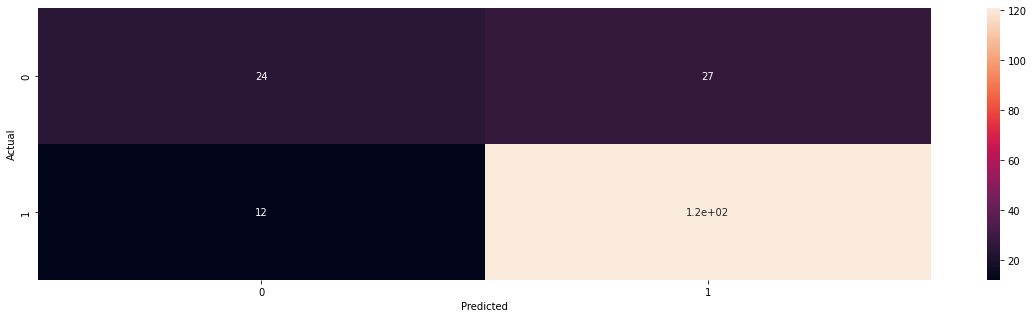

In [928]:
cm2 = pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])
sns.heatmap(cm2,annot=True)

In [929]:
#Get performance measures
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.67      0.47      0.55        51
           1       0.82      0.91      0.86       133

    accuracy                           0.79       184
   macro avg       0.74      0.69      0.71       184
weighted avg       0.78      0.79      0.78       184



In [930]:
recall=tp/(tp+fn)
print("Likelihood Ratio",recall/(1-recall))
print("Accuracy=",(tp+tn)/(tp+tn+fp+fn))

Likelihood Ratio 10.083333333333334
Accuracy= 0.7880434782608695


Datos Sima
==
In this case we will repeat the steps from above but from a new dataset

In [931]:
df = pd.read_csv("Datos SIMA 2015-Noroeste.csv",sep=",",encoding = 'unicode_escape')
column_names = df.columns
df = df.drop(['Date'],axis=1)
df.head()

O3  PM10  PM2.5    PRS  RAINF  RH   SR  TOUT  WSR  WDV
0   4   199    169  717.9    0.0  91  0.0  5.17  3.1  247
1   4   107     60  717.6    0.0  92  0.0  4.93  2.2  220
2   4    51     26  717.0    0.0  92  0.0  4.73  2.7  255
3   4    33     17  716.7    0.0  92  0.0  4.73  3.7  260
4   4    30     17  716.7    0.0  92  0.0  4.41  5.5  277

In [932]:
## Describing the data ##
df.describe()

O3         PM10        PM2.5          PRS        RAINF  \
count  4568.000000  4568.000000  4568.000000  4568.000000  4568.000000   
mean     21.918126    78.512478    26.525394   713.659173     0.001627   
std      19.799716    56.266545    17.691460     3.865896     0.018431   
min       1.000000     5.000000     5.000000   701.200000     0.000000   
25%       5.000000    42.000000    15.000000   711.200000     0.000000   
50%      16.000000    63.000000    23.000000   713.000000     0.000000   
75%      33.000000    97.000000    33.000000   716.100000     0.000000   
max     118.000000   593.000000   263.000000   726.900000     0.600000   

                RH           SR         TOUT          WSR          WDV  
count  4568.000000  4568.000000  4568.000000  4568.000000  4568.000000  
mean     66.011602     0.169129    21.012585     8.282903   177.051664  
std      18.935894     0.252062     7.698031     5.418112    84.824669  
min       3.000000     0.000000     3.460000     0.900000     2.000000  
25%      52.000000     0.000000    15.180000     4.200000   108.000000  
50%      68.000000     0.011000    21.750000     6.700000   142.000000  
75%      82.000000     0.272250    26.672500    11.500000   264.000000  
max      97.000000     0.918000    36.960000    33.200000   358.000000

In [933]:
O3 = df ["O3"]
PM_25 = df["PM2.5"]
PM_10 = df["PM10"]

column_names = df.columns
column_names = column_names.drop(["O3","PM2.5","PM10"])

x  = df[column_names]
x.head()

PRS  RAINF  RH   SR  TOUT  WSR  WDV
0  717.9    0.0  91  0.0  5.17  3.1  247
1  717.6    0.0  92  0.0  4.93  2.2  220
2  717.0    0.0  92  0.0  4.73  2.7  255
3  716.7    0.0  92  0.0  4.73  3.7  260
4  716.7    0.0  92  0.0  4.41  5.5  277

In [934]:
#Only O3 Dataframe
O3_df = df.drop(["PM10","PM2.5"],axis=1)
header_row=O3_df.columns.values

y=O3_df["O3"]
y.head()

0    4
1    4
2    4
3    4
4    4
Name: O3, dtype: int64

In [935]:
M = mean(O3_df.T, axis=1)
print(M)

#Std Deviation
st = std(O3_df.T, axis=1,ddof=1)

#Normalize data
Xdat = (O3_df - M)/st

print(st)
print(Xdat)

O3        21.918126
PRS      713.659173
RAINF      0.001627
RH        66.011602
SR         0.169129
TOUT      21.012585
WSR        8.282903
WDV      177.051664
dtype: float64
O3       19.799716
PRS       3.865896
RAINF     0.018431
RH       18.935894
SR        0.252062
TOUT      7.698031
WSR       5.418112
WDV      84.824669
dtype: float64
            O3       PRS    RAINF        RH        SR      TOUT       WSR  \
0    -0.904969  1.096984 -0.08825  1.319631 -0.670983 -2.058005 -0.956588   
1    -0.904969  1.019383 -0.08825  1.372441 -0.670983 -2.089182 -1.122698   
2    -0.904969  0.864179 -0.08825  1.372441 -0.670983 -2.115162 -1.030415   
3    -0.904969  0.786578 -0.08825  1.372441 -0.670983 -2.115162 -0.845849   
4    -0.904969  0.786578 -0.08825  1.372441 -0.670983 -2.156731 -0.513630   
...        ...       ...      ...       ...       ...       ...       ...   
4563 -0.955475  1.045250 -0.08825  1.319631 -0.670983 -1.195447 -0.365977   
4564 -0.955475  1.148719 -0.08825  1.26682

In [936]:
# create the PCA instance
pca = PCA()

# fit on data
pca = pca.fit(Xdat)

#Q eigenvectors
Q=pca.components_.T

#Explained deviations
s=sqrt(pca.explained_variance_)

In [937]:
# transform data obtain sample scores
F = pca.transform(Xdat)
print("Sample scores")

## Sample Scores ##
sample_scores = pd.DataFrame(F)
print(sample_scores)

Sample scores
             0         1         2         3         4         5         6  \
0    -2.973015  0.781343 -0.293940  0.160697 -0.191583 -0.256636  0.616214   
1    -2.947366  0.863312 -0.243964  0.105630 -0.382404  0.037552  0.653964   
2    -3.017666  0.574807 -0.308435  0.217721 -0.261207 -0.227693  0.760024   
3    -2.949296  0.502979 -0.269612  0.143098 -0.222600 -0.368434  0.829817   
4    -2.909534  0.452585 -0.236762  0.056849 -0.087086 -0.704797  0.918991   
...        ...       ...       ...       ...       ...       ...       ...   
4563 -2.356444  0.518253 -0.074877 -0.218139 -0.226226 -0.611123  0.037623   
4564 -2.250028  0.807271  0.007142 -0.376510 -0.290801 -0.369273  0.039238   
4565 -2.353204  0.712971 -0.098954 -0.239667 -0.005931 -0.698476  0.048795   
4566 -2.361532  0.790199 -0.259546 -0.031618  0.435557 -1.033298 -0.033373   
4567 -2.601029  0.775102 -0.334546  0.175355  0.205479 -0.873953  0.067749   

             7  
0     0.091657  
1     0.054221 

In [938]:
# Obtain Factor Loadings
L = zeros(shape=(Q.shape))
for col in range(0,len(s)-1):
    L[:,col] = Q[:,col] * s[col]
print("Factor Loadings")

columms_factorLoading = []

for i in range(0,8):
    nombre =  "F" + str(i)
    columms_factorLoading.append(nombre)


## Factor Loadings Dataframe ##
factor_loadings = pd.DataFrame(L, columns= columms_factorLoading)
print(factor_loadings)

Factor Loadings
         F0        F1        F2        F3        F4        F5        F6   F7
0  0.876645  0.228066 -0.052062  0.229569 -0.074257 -0.028589  0.125902  0.0
1 -0.470489  0.814261 -0.088344  0.058841  0.161716 -0.135678 -0.241693  0.0
2 -0.090534  0.009189  0.898894  0.415382  0.104035  0.013251 -0.009485  0.0
3 -0.729911 -0.003111  0.176729 -0.114974 -0.609708 -0.214445 -0.014950  0.0
4  0.697085  0.208586 -0.211437  0.540917 -0.242148 -0.149118  0.042334  0.0
5  0.829793 -0.370418  0.047870 -0.027931 -0.099460 -0.019873 -0.399342  0.0
6  0.691044  0.081325  0.253585 -0.490102  0.147691 -0.422401  0.087850  0.0
7 -0.599970 -0.479186 -0.244812  0.391830  0.241952 -0.363747 -0.008827  0.0


In [939]:
#Obtain squared cosines
COS2=L**2
print("Square Cosines")

## COS2  Dataframe ##
COS2_DF = pd.DataFrame(COS2)
print(COS2_DF)

Square Cosines
          0         1         2         3         4         5         6    7
0  0.768507  0.052014  0.002710  0.052702  0.005514  0.000817  0.015851  0.0
1  0.221360  0.663021  0.007805  0.003462  0.026152  0.018408  0.058416  0.0
2  0.008196  0.000084  0.808010  0.172542  0.010823  0.000176  0.000090  0.0
3  0.532770  0.000010  0.031233  0.013219  0.371744  0.045987  0.000224  0.0
4  0.485927  0.043508  0.044706  0.292592  0.058635  0.022236  0.001792  0.0
5  0.688557  0.137209  0.002292  0.000780  0.009892  0.000395  0.159474  0.0
6  0.477542  0.006614  0.064306  0.240200  0.021813  0.178422  0.007718  0.0
7  0.359964  0.229620  0.059933  0.153531  0.058541  0.132312  0.000078  0.0


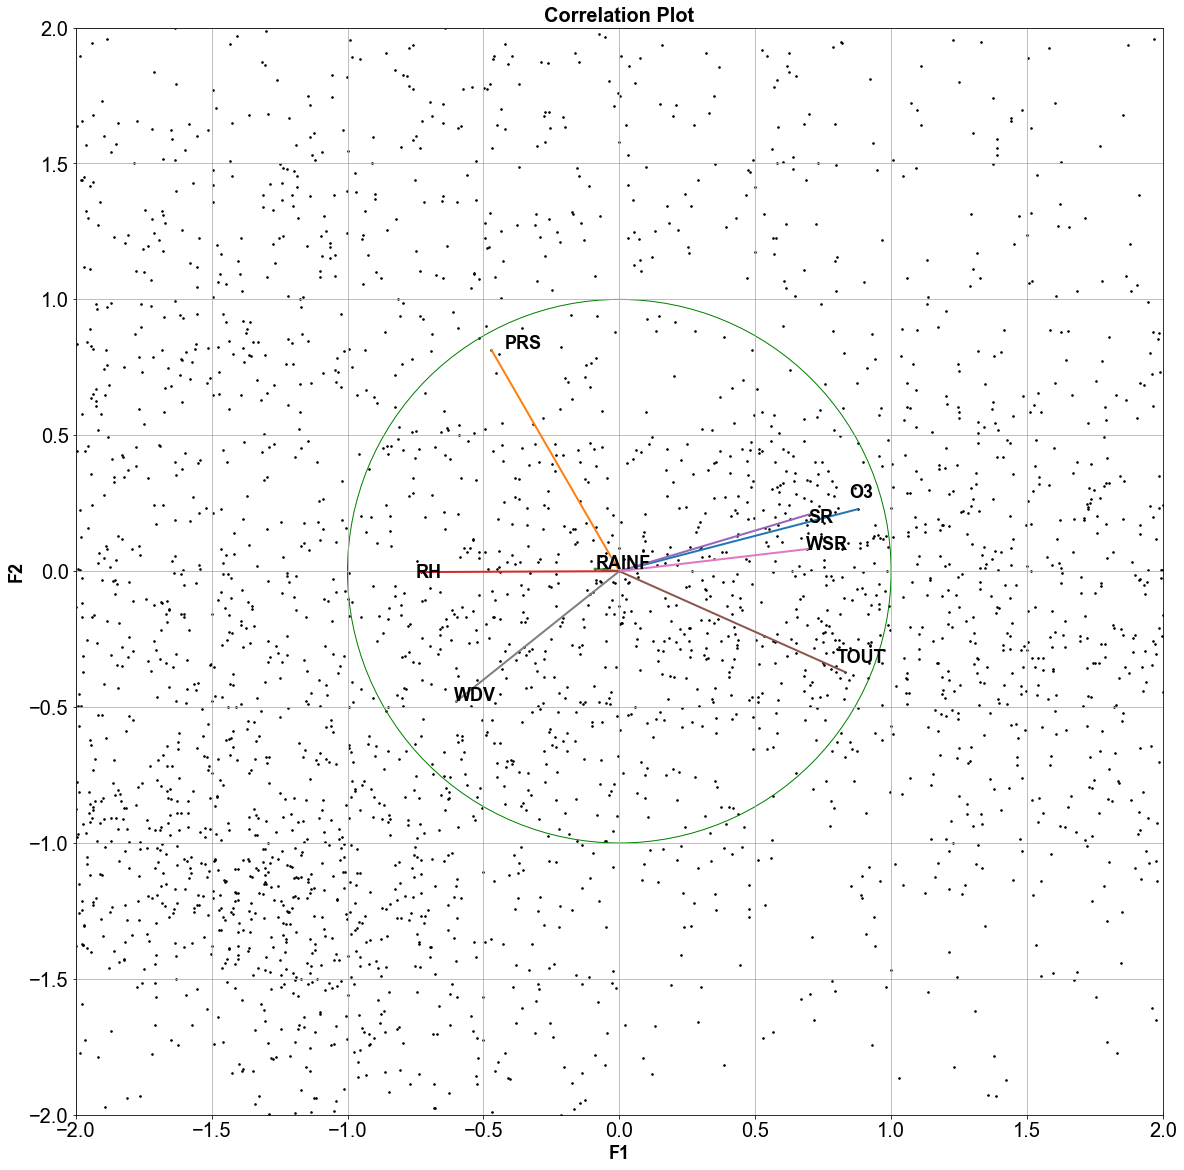

In [940]:
import random

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.grid()

circ=plt.Circle((0,0), radius=1, color='g', fill=False)
ax.add_patch(circ)
ax.set_aspect('equal')

plt.scatter(L[:,0],L[:,1],marker=".", c = "k" , s = 10)
plt.scatter(F[:,0],F[:,1],marker=".", c = "k" , s = 10)


for row in range(0,len(s)):
    plt.plot([0, L[row,0]], [0,L[row,1]], linewidth=2,label='X1')

for row in range(0,len(s)):
    #ax.annotate('X'+str(row+1), (L[row,0]+0.01,L[row,1]+0.01))
    ax.annotate(header_row[row], (L[row,0]+random.uniform(-0.05,0.05),L[row,1]+random.uniform(-0.05,0.05)),**fontL)

plt.ylabel('F2',**fontL)
plt.xlabel('F1',**fontL)

plt.xlim(-2,2)
plt.ylim(-2,2)

plt.xticks(fontsize = 20 , family = "Arial")
plt.yticks(fontsize = 20 , family = "Arial")

plt.title('Correlation Plot',**fontT)
fig.set_size_inches(30, 20)
fig.savefig('PCA_Correlation_Plot.jpg', dpi=300)
plt.show()

PCA PM 2.5
--

In [941]:
#Only O3 Dataframe
PM25_df = df.drop(["PM10","O3"],axis=1)
header_row=PM25_df.columns.values

y= PM25_df.values

In [942]:
M = mean(PM25_df.T, axis=1)
print(M)

#Std Deviation
st = std(PM25_df.T, axis=1,ddof=1)

#Normalize data
Xdat = (PM25_df - M)/st

print(st)
print(Xdat)

PM2.5     26.525394
PRS      713.659173
RAINF      0.001627
RH        66.011602
SR         0.169129
TOUT      21.012585
WSR        8.282903
WDV      177.051664
dtype: float64
PM2.5    17.691460
PRS       3.865896
RAINF     0.018431
RH       18.935894
SR        0.252062
TOUT      7.698031
WSR       5.418112
WDV      84.824669
dtype: float64
         PM2.5       PRS    RAINF        RH        SR      TOUT       WSR  \
0     8.053298  1.096984 -0.08825  1.319631 -0.670983 -2.058005 -0.956588   
1     1.892134  1.019383 -0.08825  1.372441 -0.670983 -2.089182 -1.122698   
2    -0.029698  0.864179 -0.08825  1.372441 -0.670983 -2.115162 -1.030415   
3    -0.538418  0.786578 -0.08825  1.372441 -0.670983 -2.115162 -0.845849   
4    -0.538418  0.786578 -0.08825  1.372441 -0.670983 -2.156731 -0.513630   
...        ...       ...      ...       ...       ...       ...       ...   
4563  0.705120  1.045250 -0.08825  1.319631 -0.670983 -1.195447 -0.365977   
4564  0.592071  1.148719 -0.08825  1.26682

In [943]:
# create the PCA instance
pca = PCA()

# fit on data
pca = pca.fit(Xdat)

#Q eigenvectors
Q=pca.components_.T

#Explained deviations
s=sqrt(pca.explained_variance_)

In [944]:
# transform data obtain sample scores
F = pca.transform(Xdat)
print("Sample scores")

## Sample Scores ##
sample_scores = pd.DataFrame(F)
print(sample_scores)

Sample scores
             0         1         2         3         4         5         6  \
0    -3.793897  4.328294 -0.250655 -0.740379  6.313149  0.584714 -0.389229   
1    -3.082075  0.498428 -0.246843 -0.186918  1.659648 -0.155361  0.019025   
2    -2.939054 -0.428130 -0.276161  0.049092 -0.031072 -0.200549 -0.200446   
3    -2.799625 -0.700463 -0.244835  0.017998 -0.453126 -0.200655 -0.329797   
4    -2.748384 -0.683990 -0.219661 -0.071032 -0.487353 -0.054267 -0.662582   
...        ...       ...       ...       ...       ...       ...       ...   
4563 -2.233655 -0.075080 -0.116989 -0.328899  0.609671 -0.127597 -0.616764   
4564 -2.107943 -0.400250 -0.087583 -0.405623  0.746632 -0.202909 -0.381046   
4565 -2.387128  0.592431 -0.156800 -0.424936  1.759240  0.211144 -0.732067   
4566 -2.633073  1.407441 -0.284039 -0.343463  2.755407  0.774203 -1.083386   
4567 -2.885175  1.075522 -0.319104 -0.167207  2.169503  0.498747 -0.901421   

             7  
0    -0.029261  
1     0.469025 

In [945]:
# Obtain Factor Loadings
L = zeros(shape=(Q.shape))
for col in range(0,len(s)-1):
    L[:,col] = Q[:,col] * s[col]
print("Factor Loadings")

columms_factorLoading = []

for i in range(0,8):
    nombre =  "F" + str(i)
    columms_factorLoading.append(nombre)


## Factor Loadings Dataframe ##
factor_loadings = pd.DataFrame(L, columns= columms_factorLoading)
print(factor_loadings)

Factor Loadings
         F0        F1        F2        F3        F4        F5        F6   F7
0 -0.188521  0.684693  0.005049 -0.090498  0.693997  0.066472 -0.012062  0.0
1 -0.526756 -0.668908 -0.147707  0.189740  0.342684  0.146409 -0.142325  0.0
2 -0.103958 -0.023820  0.940739  0.307685  0.026740  0.089939  0.011519  0.0
3 -0.727287 -0.000886  0.178880 -0.257531 -0.021261 -0.572132 -0.209374  0.0
4  0.620298 -0.024450 -0.170263  0.638050  0.202806 -0.301640 -0.173132  0.0
5  0.862262  0.259744  0.061238 -0.006900 -0.151343 -0.128836 -0.026845  0.0
6  0.729885 -0.202157  0.166902 -0.411817  0.111837  0.168534 -0.422587  0.0
7 -0.597825  0.481148 -0.137216  0.270445 -0.370895  0.237384 -0.352375  0.0


In [946]:
#Obtain squared cosines
COS2=L**2
print("Square Cosines")

## COS2  Dataframe ##
COS2_DF = pd.DataFrame(COS2)
print(COS2_DF)

Square Cosines
          0             1         2         3         4         5         6  \
0  0.035540  4.688044e-01  0.000025  0.008190  0.481632  0.004418  0.000145   
1  0.277471  4.474384e-01  0.021817  0.036001  0.117432  0.021436  0.020257   
2  0.010807  5.673756e-04  0.884990  0.094670  0.000715  0.008089  0.000133   
3  0.528946  7.842724e-07  0.031998  0.066322  0.000452  0.327335  0.043837   
4  0.384769  5.978092e-04  0.028989  0.407107  0.041130  0.090987  0.029975   
5  0.743497  6.746679e-02  0.003750  0.000048  0.022905  0.016599  0.000721   
6  0.532732  4.086745e-02  0.027856  0.169594  0.012508  0.028404  0.178580   
7  0.357395  2.315029e-01  0.018828  0.073140  0.137563  0.056351  0.124168   

     7  
0  0.0  
1  0.0  
2  0.0  
3  0.0  
4  0.0  
5  0.0  
6  0.0  
7  0.0  


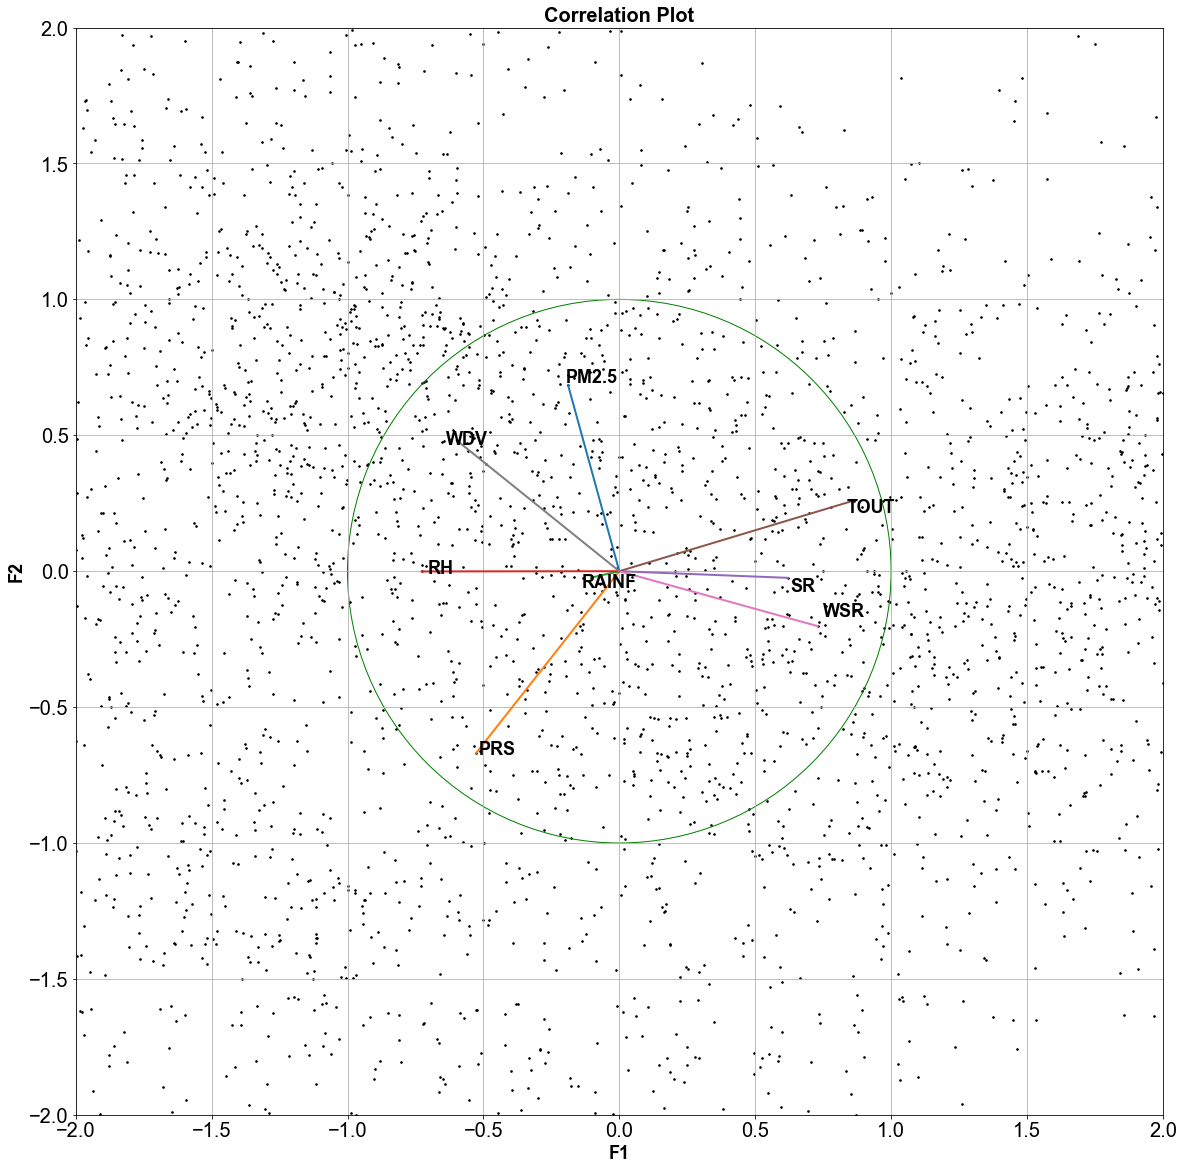

In [947]:
import random

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.grid()

circ=plt.Circle((0,0), radius=1, color='g', fill=False)
ax.add_patch(circ)
ax.set_aspect('equal')

plt.scatter(L[:,0],L[:,1],marker=".", c = "k" , s = 10)
plt.scatter(F[:,0],F[:,1],marker=".", c = "k" , s = 10)


for row in range(0,len(s)):
    plt.plot([0, L[row,0]], [0,L[row,1]], linewidth=2,label='X1')

for row in range(0,len(s)):
    #ax.annotate('X'+str(row+1), (L[row,0]+0.01,L[row,1]+0.01))
    ax.annotate(header_row[row], (L[row,0]+random.uniform(-0.05,0.05),L[row,1]+random.uniform(-0.05,0.05)),**fontL)

plt.ylabel('F2',**fontL)
plt.xlabel('F1',**fontL)

plt.xlim(-2,2)
plt.ylim(-2,2)

plt.xticks(fontsize = 20 , family = "Arial")
plt.yticks(fontsize = 20 , family = "Arial")

plt.title('Correlation Plot',**fontT)
fig.set_size_inches(30, 20)
fig.savefig('PCA_Correlation_Plot.jpg', dpi=300)
plt.show()

Regression Models
--

In [948]:
df = pd.read_csv("Datos SIMA 2015-Noroeste.csv",sep=",",encoding = 'unicode_escape')
column_names = df.columns
df = df.drop(['Date'],axis=1)
df.head()

O3  PM10  PM2.5    PRS  RAINF  RH   SR  TOUT  WSR  WDV
0   4   199    169  717.9    0.0  91  0.0  5.17  3.1  247
1   4   107     60  717.6    0.0  92  0.0  4.93  2.2  220
2   4    51     26  717.0    0.0  92  0.0  4.73  2.7  255
3   4    33     17  716.7    0.0  92  0.0  4.73  3.7  260
4   4    30     17  716.7    0.0  92  0.0  4.41  5.5  277

In [949]:
O3 = df ["O3"]
PM_25 = df["PM2.5"]
PM_10 = df["PM10"]

column_names = df.columns
column_names = column_names.drop(["O3","PM2.5","PM10"])

x  = df[column_names]
x.head()

PRS  RAINF  RH   SR  TOUT  WSR  WDV
0  717.9    0.0  91  0.0  5.17  3.1  247
1  717.6    0.0  92  0.0  4.93  2.2  220
2  717.0    0.0  92  0.0  4.73  2.7  255
3  716.7    0.0  92  0.0  4.73  3.7  260
4  716.7    0.0  92  0.0  4.41  5.5  277

O3 Model
--

Linear Regresion

In [950]:
## Predicting Variable ##
x  = df[column_names]

## Y model of O3 ##
y = O3.values

In [951]:
#Reshape the Values#
y = y.reshape(-1,1)
y.shape

(4568, 1)

In [952]:
lm = sk.linear_model.LinearRegression().fit(x,y)
lmp = lm.predict(x)
regression_results(y,lmp)

explained_variance:  0.7499
r2:  0.7499
MAE:  7.1157
MSE:  98.0229
RMSE:  9.9007


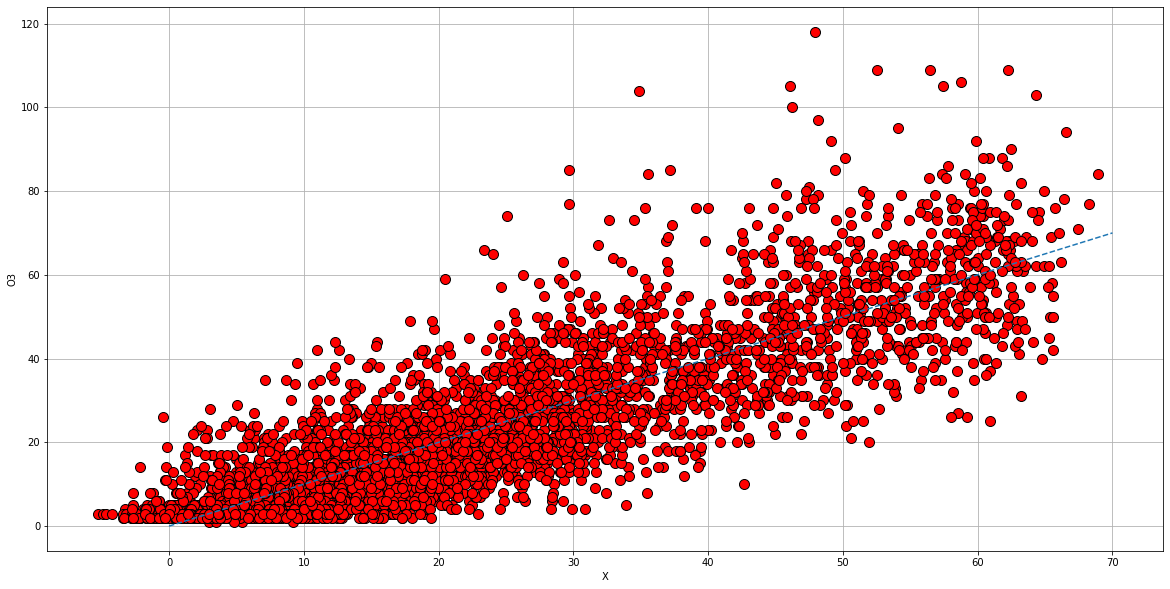

In [953]:
plt.figure(figsize=(20,10))

plt.plot(lmp,y,"ok",markersize =10, linewidth = 4 , markerfacecolor = 'red')
plt.plot([0,70],[0,70],"--")
plt.ylabel("O3")
plt.xlabel("X")
plt.grid(True)

PM 2.5 Model
--

In [954]:
## Predicting Variable ##
x  = df[column_names]

## Y model of O3 ##
y = PM_25.values

In [955]:
y = y.reshape(-1,1)
y.shape

(4568, 1)

In [956]:
lm = sk.linear_model.LinearRegression().fit(x,y)
lmp = lm.predict(x)
regression_results(y,lmp)

explained_variance:  0.0713
r2:  0.0713
MAE:  11.7951
MSE:  290.6145
RMSE:  17.0474


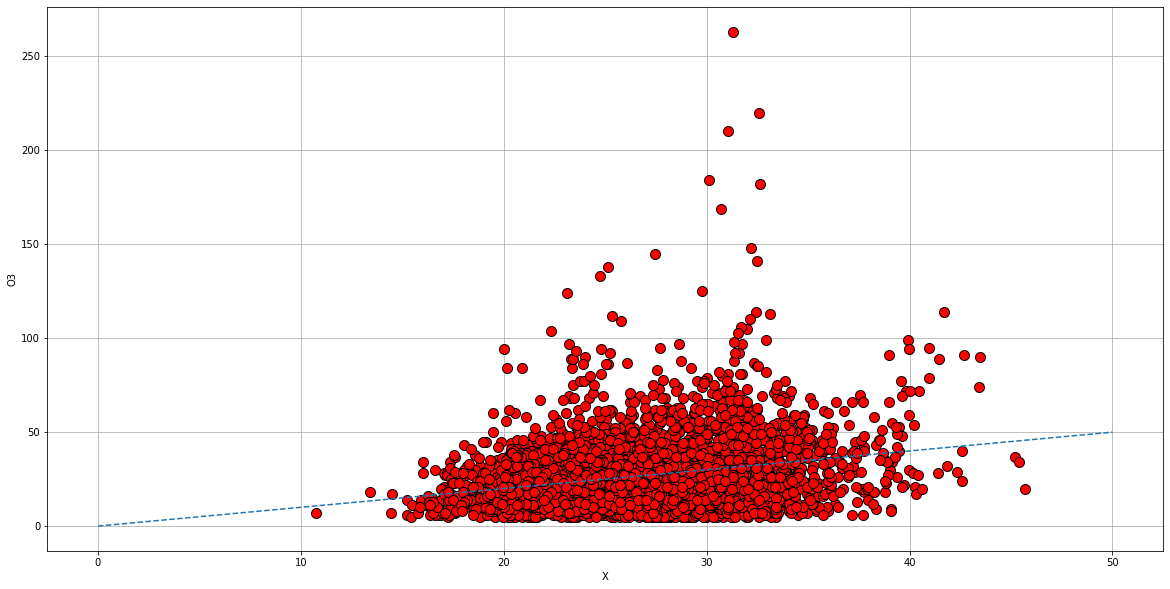

In [957]:
plt.figure(figsize=(20,10))

plt.plot(lmp,y,"ok",markersize =10, linewidth = 4 , markerfacecolor = 'red')
plt.plot([0,50],[0,50],"--")
plt.ylabel("O3")
plt.xlabel("X")
plt.grid(True)

Classification Model
--

In [958]:
df['CONT']=(df['PM2.5']>40.4)*1

df.head()

O3  PM10  PM2.5    PRS  RAINF  RH   SR  TOUT  WSR  WDV  CONT
0   4   199    169  717.9    0.0  91  0.0  5.17  3.1  247     1
1   4   107     60  717.6    0.0  92  0.0  4.93  2.2  220     1
2   4    51     26  717.0    0.0  92  0.0  4.73  2.7  255     0
3   4    33     17  716.7    0.0  92  0.0  4.73  3.7  260     0
4   4    30     17  716.7    0.0  92  0.0  4.41  5.5  277     0

In [959]:
## Predicting Variable ##
x  = df[column_names]
x.head()

PRS  RAINF  RH   SR  TOUT  WSR  WDV
0  717.9    0.0  91  0.0  5.17  3.1  247
1  717.6    0.0  92  0.0  4.93  2.2  220
2  717.0    0.0  92  0.0  4.73  2.7  255
3  716.7    0.0  92  0.0  4.73  3.7  260
4  716.7    0.0  92  0.0  4.41  5.5  277

In [960]:
#Independant#
y = df['CONT']
y.head()

0    1
1    1
2    0
3    0
4    0
Name: CONT, dtype: int32

In [961]:
#Separate train and test data 
x_train,x_test,y_train,y_test = sk.model_selection.train_test_split(x,y,train_size=0.20,random_state=0)

#Standarize data. Subtract mean and devide by standard deviation
sc = sk.preprocessing.StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [962]:
from sklearn.naive_bayes import GaussianNB
#Fit classifier with train data
NB = GaussianNB()
NB.fit(x_train,y_train)

GaussianNB()

In [963]:
#Predict test data
y_pred=NB.predict(x_test)

In [964]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
print(cm)
tn, fp, fn, tp = cm.ravel()

[[3067   38]
 [ 538   12]]


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

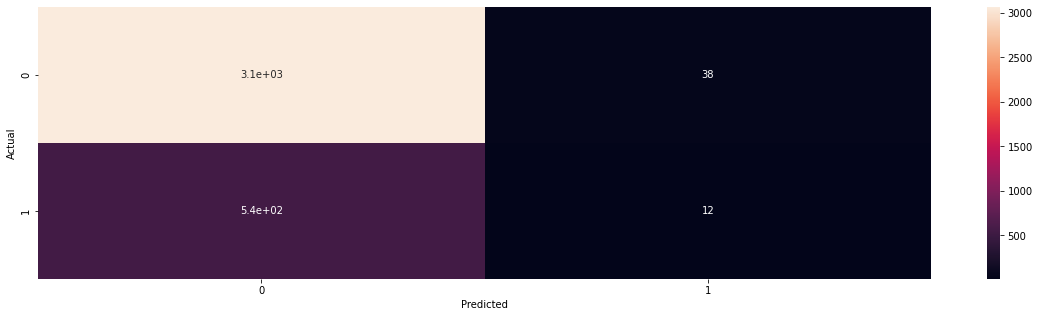

In [965]:
cm2 = pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])
sns.heatmap(cm2,annot=True)

In [966]:
#Get performance measures
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      3105
           1       0.24      0.02      0.04       550

    accuracy                           0.84      3655
   macro avg       0.55      0.50      0.48      3655
weighted avg       0.76      0.84      0.78      3655



In [967]:
recall=tp/(tp+fn)
print("Likelihood Ratio",recall/(1-recall))
print("Accuracy=",(tp+tn)/(tp+tn+fp+fn))

Likelihood Ratio 0.02230483271375465
Accuracy= 0.8424076607387141


Adjusting the data set
--

In [968]:
df = pd.read_csv("Datos SIMA 2015-Noroeste.csv",sep=",")


O3 = df ["O3"]
PM_25 = df["PM2.5"]
PM_10 = df["PM10"]

column_names = df.columns
column_names = column_names.drop(["O3","PM10","PM2.5"])

df_2  = df[column_names]

df.head()


Date  O3  PM10  PM2.5    PRS  RAINF  RH   SR  TOUT  WSR  WDV
0  01-ene-15   4   199    169  717.9    0.0  91  0.0  5.17  3.1  247
1  01-ene-15   4   107     60  717.6    0.0  92  0.0  4.93  2.2  220
2  01-ene-15   4    51     26  717.0    0.0  92  0.0  4.73  2.7  255
3  01-ene-15   4    33     17  716.7    0.0  92  0.0  4.73  3.7  260
4  01-ene-15   4    30     17  716.7    0.0  92  0.0  4.41  5.5  277

In [969]:
## Group data by date##
pm25_max=df.groupby(by='Date')['PRS','RAINF','RH','SR','TOUT','WSR','WDV','PM2.5'].max()


pm25_max=pm25_max.rename(columns={'PRS':'PRS_max','RAINF':'RAINF_max',\
                         'RH':'RH_max','SR':'SR_max','TOUT':'TOUT_max','WSR':'WSR_max',\
                         'WDV':'WDV_max','PM2.5':'PM2.5_max'})

pm25_max.head()

C:\Users\Usuario\AppData\Local\Temp/ipykernel_46288/4100089267.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pm25_max=df.groupby(by='Date')['PRS','RAINF','RH','SR','TOUT','WSR','WDV','PM2.5'].max()


PRS_max  RAINF_max  RH_max  SR_max  TOUT_max  WSR_max  WDV_max  \
Date                                                                        
01-dic-15    713.7       0.00      92   0.291     17.65      7.6      324   
01-ene-15    717.9       0.00      94   0.121      7.91      9.7      294   
01-feb-15    715.9       0.02      82   0.001     17.52     10.2      291   
01-jul-15    713.7       0.10      89   0.257     25.70     18.4      305   
01-nov-15    713.8       0.00      87   0.051     24.45      8.2      340   

           PM2.5_max  
Date                  
01-dic-15         80  
01-ene-15        169  
01-feb-15         20  
01-jul-15         33  
01-nov-15         41

In [970]:
pm25_min=df.groupby(by='Date')['PRS','RAINF','RH','SR','TOUT','WSR','WDV'].min()

pm25_min=pm25_min.rename(columns={'PRS':'PRS_min','RAINF':'RAINF_min',\
                         'RH':'RH_min','SR':'SR_min','TOUT':'TOUT_min','WSR':'WSR_min',\
                         'WDV':'WDV_min'})
pm25_min.head()                        

C:\Users\Usuario\AppData\Local\Temp/ipykernel_46288/942626340.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pm25_min=df.groupby(by='Date')['PRS','RAINF','RH','SR','TOUT','WSR','WDV'].min()


PRS_min  RAINF_min  RH_min  SR_min  TOUT_min  WSR_min  WDV_min
Date                                                                     
01-dic-15    711.3        0.0      70     0.0     12.68      2.8      121
01-ene-15    713.3        0.0      85     0.0      4.31      2.0      111
01-feb-15    713.9        0.0      72     0.0     16.60      5.0      138
01-jul-15    712.1        0.0      69     0.0     21.31      4.1      102
01-nov-15    712.8        0.0      39     0.0     16.47      2.0      102

In [971]:
pm25 = pm25_max.join(pm25_min)
pm25.head()

PRS_max  RAINF_max  RH_max  SR_max  TOUT_max  WSR_max  WDV_max  \
Date                                                                        
01-dic-15    713.7       0.00      92   0.291     17.65      7.6      324   
01-ene-15    717.9       0.00      94   0.121      7.91      9.7      294   
01-feb-15    715.9       0.02      82   0.001     17.52     10.2      291   
01-jul-15    713.7       0.10      89   0.257     25.70     18.4      305   
01-nov-15    713.8       0.00      87   0.051     24.45      8.2      340   

           PM2.5_max  PRS_min  RAINF_min  RH_min  SR_min  TOUT_min  WSR_min  \
Date                                                                          
01-dic-15         80    711.3        0.0      70     0.0     12.68      2.8   
01-ene-15        169    713.3        0.0      85     0.0      4.31      2.0   
01-feb-15         20    713.9        0.0      72     0.0     16.60      5.0   
01-jul-15         33    712.1        0.0      69     0.0     21.31      4.1   
01-nov-15         41    712.8        0.0      39     0.0     16.47      2.0   

           WDV_min  
Date                
01-dic-15      121  
01-ene-15      111  
01-feb-15      138  
01-jul-15      102  
01-nov-15      102

In [972]:
pm25_avg=df.groupby(by='Date')[column_names].mean()
pm25_avg=pm25_avg.rename(columns={'PRS':'PRS_avg','RAINF':'RAINF_avg',\
                         'RH':'RH_avg','SR':'SR_avg','TOUT':'TOUT_avg','WSR':'WSR_avg',\
                         'WDV':'WDV_avg'})                        


In [973]:
pm25 = pm25.join(pm25_avg)
pm25.head()

PRS_max  RAINF_max  RH_max  SR_max  TOUT_max  WSR_max  WDV_max  \
Date                                                                        
01-dic-15    713.7       0.00      92   0.291     17.65      7.6      324   
01-ene-15    717.9       0.00      94   0.121      7.91      9.7      294   
01-feb-15    715.9       0.02      82   0.001     17.52     10.2      291   
01-jul-15    713.7       0.10      89   0.257     25.70     18.4      305   
01-nov-15    713.8       0.00      87   0.051     24.45      8.2      340   

           PM2.5_max  PRS_min  RAINF_min  ...  TOUT_min  WSR_min  WDV_min  \
Date                                      ...                               
01-dic-15         80    711.3        0.0  ...     12.68      2.8      121   
01-ene-15        169    713.3        0.0  ...      4.31      2.0      111   
01-feb-15         20    713.9        0.0  ...     16.60      5.0      138   
01-jul-15         33    712.1        0.0  ...     21.31      4.1      102   
01-nov-15         41    712.8        0.0  ...     16.47      2.0      102   

              PRS_avg  RAINF_avg  RH_avg    SR_avg   TOUT_avg    WSR_avg  \
Date                                                                       
01-dic-15  712.553333      0.000   82.20  0.080333  14.784667   5.146667   
01-ene-15  715.252381      0.000   90.00  0.032095   6.140000   4.423810   
01-feb-15  714.840000      0.006   79.00  0.000200  17.192000   7.160000   
01-jul-15  713.037500      0.020   78.25  0.122750  23.637500  11.275000   
01-nov-15  713.190000      0.000   72.30  0.005200  18.995000   4.840000   

              WDV_avg  
Date                   
01-dic-15  195.600000  
01-ene-15  193.095238  
01-feb-15  216.600000  
01-jul-15  150.375000  
01-nov-15  234.800000  

[5 rows x 22 columns]

In [974]:
pm25['CONT']=(pm25['PM2.5_max']>40.4)*1

pm25.head()

PRS_max  RAINF_max  RH_max  SR_max  TOUT_max  WSR_max  WDV_max  \
Date                                                                        
01-dic-15    713.7       0.00      92   0.291     17.65      7.6      324   
01-ene-15    717.9       0.00      94   0.121      7.91      9.7      294   
01-feb-15    715.9       0.02      82   0.001     17.52     10.2      291   
01-jul-15    713.7       0.10      89   0.257     25.70     18.4      305   
01-nov-15    713.8       0.00      87   0.051     24.45      8.2      340   

           PM2.5_max  PRS_min  RAINF_min  ...  WSR_min  WDV_min     PRS_avg  \
Date                                      ...                                 
01-dic-15         80    711.3        0.0  ...      2.8      121  712.553333   
01-ene-15        169    713.3        0.0  ...      2.0      111  715.252381   
01-feb-15         20    713.9        0.0  ...      5.0      138  714.840000   
01-jul-15         33    712.1        0.0  ...      4.1      102  713.037500   
01-nov-15         41    712.8        0.0  ...      2.0      102  713.190000   

           RAINF_avg  RH_avg    SR_avg   TOUT_avg    WSR_avg     WDV_avg  CONT  
Date                                                                            
01-dic-15      0.000   82.20  0.080333  14.784667   5.146667  195.600000     1  
01-ene-15      0.000   90.00  0.032095   6.140000   4.423810  193.095238     1  
01-feb-15      0.006   79.00  0.000200  17.192000   7.160000  216.600000     0  
01-jul-15      0.020   78.25  0.122750  23.637500  11.275000  150.375000     0  
01-nov-15      0.000   72.30  0.005200  18.995000   4.840000  234.800000     1  

[5 rows x 23 columns]

In [975]:
column_names = pm25.columns
column_names = column_names.drop(["CONT"])

x  = pm25[column_names]

In [976]:
#Dependant
x = x
x.head()

PRS_max  RAINF_max  RH_max  SR_max  TOUT_max  WSR_max  WDV_max  \
Date                                                                        
01-dic-15    713.7       0.00      92   0.291     17.65      7.6      324   
01-ene-15    717.9       0.00      94   0.121      7.91      9.7      294   
01-feb-15    715.9       0.02      82   0.001     17.52     10.2      291   
01-jul-15    713.7       0.10      89   0.257     25.70     18.4      305   
01-nov-15    713.8       0.00      87   0.051     24.45      8.2      340   

           PM2.5_max  PRS_min  RAINF_min  ...  TOUT_min  WSR_min  WDV_min  \
Date                                      ...                               
01-dic-15         80    711.3        0.0  ...     12.68      2.8      121   
01-ene-15        169    713.3        0.0  ...      4.31      2.0      111   
01-feb-15         20    713.9        0.0  ...     16.60      5.0      138   
01-jul-15         33    712.1        0.0  ...     21.31      4.1      102   
01-nov-15         41    712.8        0.0  ...     16.47      2.0      102   

              PRS_avg  RAINF_avg  RH_avg    SR_avg   TOUT_avg    WSR_avg  \
Date                                                                       
01-dic-15  712.553333      0.000   82.20  0.080333  14.784667   5.146667   
01-ene-15  715.252381      0.000   90.00  0.032095   6.140000   4.423810   
01-feb-15  714.840000      0.006   79.00  0.000200  17.192000   7.160000   
01-jul-15  713.037500      0.020   78.25  0.122750  23.637500  11.275000   
01-nov-15  713.190000      0.000   72.30  0.005200  18.995000   4.840000   

              WDV_avg  
Date                   
01-dic-15  195.600000  
01-ene-15  193.095238  
01-feb-15  216.600000  
01-jul-15  150.375000  
01-nov-15  234.800000  

[5 rows x 22 columns]

In [977]:
#Independant#
y = pm25['CONT']
y.head()


Date
01-dic-15    1
01-ene-15    1
01-feb-15    0
01-jul-15    0
01-nov-15    1
Name: CONT, dtype: int32

In [978]:
#Separate train and test data 
x_train,x_test,y_train,y_test = sk.model_selection.train_test_split(x,y,train_size=0.20,random_state=0)

#Standarize data. Subtract mean and devide by standard deviation
sc = sk.preprocessing.StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [979]:
from sklearn.naive_bayes import GaussianNB
#Fit classifier with train data
NB = GaussianNB()
NB.fit(x_train,y_train)

GaussianNB()

In [980]:
#Predict test data
y_pred=NB.predict(x_test)

In [981]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
print(cm)
tn, fp, fn, tp = cm.ravel()

[[ 60  18]
 [ 21 116]]


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

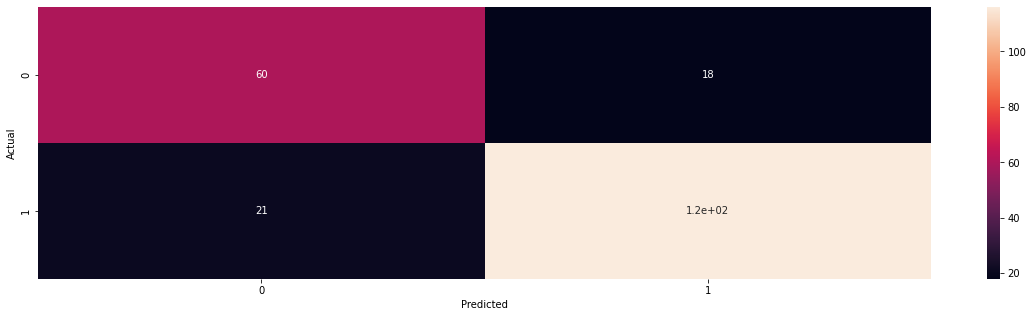

In [982]:
cm2 = pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])
sns.heatmap(cm2,annot=True)

In [983]:
#Get performance measures
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75        78
           1       0.87      0.85      0.86       137

    accuracy                           0.82       215
   macro avg       0.80      0.81      0.81       215
weighted avg       0.82      0.82      0.82       215



In [984]:
recall=tp/(tp+fn)
print("Likelihood Ratio",recall/(1-recall))
print("Accuracy=",(tp+tn)/(tp+tn+fp+fn))

Likelihood Ratio 5.523809523809522
Accuracy= 0.8186046511627907
